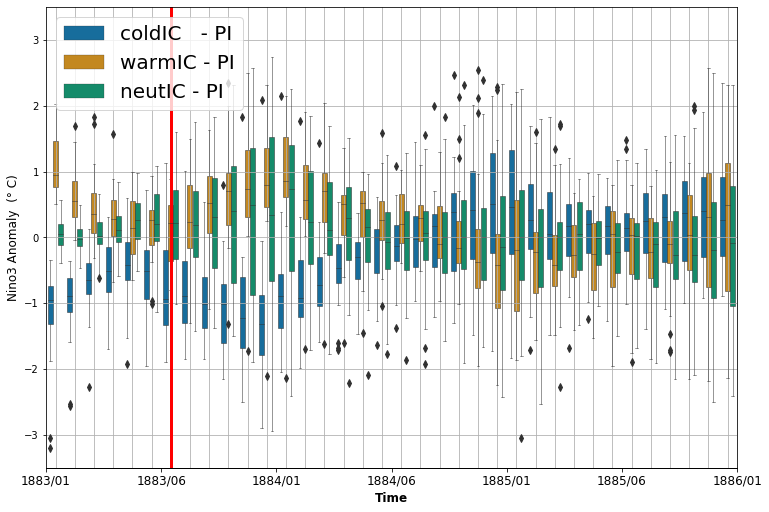

In [1]:
from load_data_state_of_system_review_pi import *
import seaborn as sns
fig = plt.figure(figsize=(12.0,8.0))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
###############################
df_pi = pd.DataFrame(columns=['Nino3 (\N{DEGREE SIGN} C)', 'time', 'type'])

count = 0

for i in range(c_sst.shape[0]):
    for j in range(c_sst.shape[1]):
        df_pi.loc[count] = [c_sst[i,j], j, 'coldIC   - PI']
        count = count + 1
        
for i in range(w_sst.shape[0]):
    for j in range(w_sst.shape[1]):
        df_pi.loc[count] = [w_sst[i,j], j, 'warmIC - PI']
        count = count + 1

for i in range(n_sst.shape[0]):
    for j in range(n_sst.shape[1]):
        df_pi.loc[count] = [n_sst[i,j], j, 'neutIC - PI']
        count = count + 1


b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', 
                 data=df_pi, 
                 palette="colorblind",
                 hue='type', ax=ax1, linewidth=0.5)
ax1.xaxis.set_ticklabels([])
for ax in [ax_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax1.xaxis.set_ticks_position('none') 
ax1.set_xlabel('')
#ax1.set(ylim=(0.0, 0.25))
#ax1_.set_xlabel('')
for ax in [ax1]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.yaxis.grid(True) 
    ax.xaxis.grid(True)
    #ax.legend(loc='lower left')
    ax.set(ylim=(-3.5, 3.5))
    ax.set_ylabel('Nino3 Anomaly  (\N{DEGREE SIGN} C)', fontsize=12)
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))

# ax1.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# ax1.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax1.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
# ax1.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

# ax1.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')

ax1.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')
#ax1.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')

#ax1.text(12,-3.3,'Krakatoa \n volcanic eruption', color='r', fontsize=14,horizontalalignment='center')
ax1.legend(loc='upper left', fontsize=20)
#plt.savefig('pi_control.png')

In [2]:
#df_pi = df

In [3]:
import xarray as xr
#data_dir = "/iitm1/cccr/msingh/state_of_system/data/sst_ocean_1951_2125_mon_reg_anom.nc"
#data_dir = "/iitm1/cccr/msingh/state_of_system/data/sst_ocean_1951_2299_mon_reg_anom.nc"
data_dir = "/iitm1/cccr/msingh/state_of_system/data/sst_ocean_1951_2299_mon_reg_anom.nc"
#ds_sst
ds_sst = xr.open_dataset(data_dir)

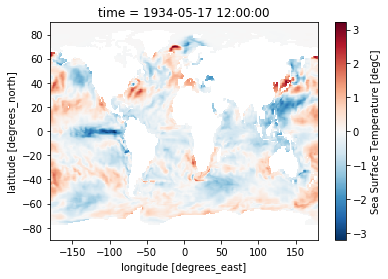

In [4]:
ds_sst.sst.isel(time=100).plot()

In [5]:
ds_sst.time

<xarray.DataArray 'time' (time: 4523)>
array([cftime.DatetimeGregorian(1926-01-17 12:00:00),
       cftime.DatetimeGregorian(1926-02-16 00:00:00),
       cftime.DatetimeGregorian(1926-03-17 12:00:00), ...,
       cftime.DatetimeGregorian(2299-10-31 12:00:00),
       cftime.DatetimeGregorian(2299-11-30 12:00:00),
       cftime.DatetimeGregorian(2299-12-31 12:00:00)], dtype=object)
Coordinates:
  * time     (time) object 1926-01-17 12:00:00 ... 2299-12-31 12:00:00
Attributes:
    standard_name:  time
    long_name:      time
    bounds:         time_bnds

In [6]:
sst_nino3 = ds_sst.sst.sel(lon=slice(-150,-90), lat=slice(-5,5))

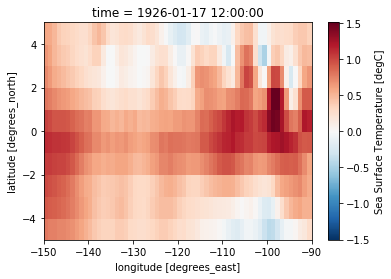

In [7]:
sst_nino3.isel(time=0).plot()

In [8]:
sst_nino3_tim_mon = sst_nino3.mean(dim='lon').mean(dim='lat')

In [9]:
#for yy in warm_years:
#    print(yy, " ", sst_nino3_tim_mon.sel(time=str(yy)+'-01').values[0])
nino3_jan_anom = []
years = np.arange(1926,2300)
for yy in years:
    #print(yy, " ", sst_nino3_tim_mon.sel(time=str(yy)+'-01').values[0])
    nino3_jan_anom.append(sst_nino3_tim_mon.sel(time=str(yy)+'-01').values[0])

In [10]:
nino3_jan_anom = np.asarray(nino3_jan_anom)
print(np.mean(nino3_jan_anom))
print(np.std(nino3_jan_anom))

0.087649755
1.0805085


In [11]:
import matplotlib.pyplot as plt
sst_ser = sst_nino3_tim_mon.values.flatten()[:]
sst_time = sst_nino3_tim_mon.time.values.flatten()[:]
#plt.plot(sst_time, sst_ser)

In [12]:
sst_nino3_yearmean = sst_nino3_tim_mon.groupby('time.year').mean('time')

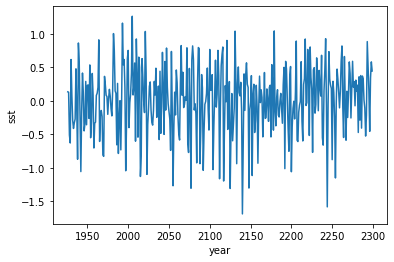

In [13]:
sst_nino3_yearmean.plot()

In [14]:
cold_years = [1958,1969,1988,1997,2001,2015,2023,2055,2112,2117,2122,2125,2133,2140,2148,2152,2156,2159,2170,2171,2214,2244,2253,1964,1977,1982,1995,2013,2021,2025,2026,2042,2080,2110,2136,2193,2198,2211,2218,2220,2224,2246,1968,1979,2051,2061,2062,2073,2104,2128]
warm_years = [1993,2004,2017,2079,2142,2145,2256,2261,2293,1971,1999,2005,2010,2031,2032,2034,2059,2067,2094,2097,2100,2115,2131,2135,2146,2150,2166,2176,2216,2217,2227,2228,2231,2242,1959,1974,1991,2040,2050,2063,2077,2105,2129,2164,2172,2201,2239,2240,2267,2286]

In [15]:
for yy in warm_years:
    print(yy, " ", sst_nino3_yearmean.sel(year=yy).values)

1993   1.1631129
2004   0.41656062
2017   0.6322468
2079   0.8220708
2142   0.4034108
2145   0.56861067
2256   0.47559503
2261   0.586904
2293   0.8869497
1971   0.3665335
1999   0.62971205
2005   1.2660261
2010   0.9261256
2031   -0.1448304
2032   0.29142174
2034   0.4887096
2059   0.46201226
2067   0.4283202
2094   -0.051228892
2097   0.49123764
2100   0.7690702
2115   0.69190174
2131   1.0429897
2135   0.50735873
2146   0.24787979
2150   -0.018431539
2166   -0.15045042
2176   0.5418444
2216   0.33359566
2217   0.9254659
2227   0.46449184
2228   0.49668846
2231   0.6431183
2242   0.9303977
1959   -0.3348445
1974   0.06429314
1991   -0.73298436
2040   -0.48535308
2050   -0.16056179
2063   -0.5857317
2077   -1.307104
2105   -0.377798
2129   -0.36515805
2164   0.05093653
2172   -0.3064244
2201   -0.38645586
2239   -0.66201824
2240   0.15159877
2267   -0.5886388
2286   -0.40771174


In [16]:
for yy in cold_years:
    print(yy, " ",sst_nino3_yearmean.sel(year=yy).values)

1958   -0.7053109
1969   -0.8099356
1988   -0.7866323
1997   -1.045729
2001   -0.40040126
2015   -1.1309451
2023   -1.099374
2055   -1.2701699
2112   -1.1651202
2117   -1.1990787
2122   -0.4270707
2125   -1.3105394
2133   -0.9396932
2140   -1.6910896
2148   -1.3042773
2152   -1.1169543
2156   -0.29429564
2159   -0.93286633
2170   0.17860901
2171   0.014052599
2214   -0.59971195
2244   -1.585832
2253   -0.24324922
1964   0.9126615
1977   0.17251213
1982   1.0066355
1995   0.61893433
2013   0.65440184
2021   1.0385468
2025   -0.10439079
2026   0.21630971
2042   0.7254979
2080   0.61808074
2110   0.75540876
2136   0.12449125
2193   0.5912551
2198   0.36746252
2211   -0.008225441
2218   -0.06941695
2220   0.7698355
2224   0.35279158
2246   0.7360323
1968   -0.23284347
1979   -0.11660553
2051   -0.27056006
2061   -0.22937578
2062   -0.4958652
2073   -0.6271348
2104   -1.0281183
2128   -0.59703016


In [17]:
for yy in warm_years:
    print(yy, " ", sst_nino3_tim_mon.sel(time=str(yy)+'-01').values[0])

1993   0.736754
2004   0.21818063
2017   -0.014562964
2079   1.7049503
2142   0.23431215
2145   -0.04636104
2256   -0.65463537
2261   0.13385728
2293   0.8720175
1971   0.006782265
1999   -0.35442847
2005   0.30704293
2010   -0.02630052
2031   0.45528775
2032   0.6242186
2034   0.058844913
2059   -0.008439901
2067   0.44827443
2094   0.80597436
2097   0.7664703
2100   0.9696366
2115   0.029513419
2131   0.27994737
2135   1.8594462
2146   0.7661244
2150   0.5040353
2166   0.33353895
2176   0.71617925
2216   2.0175707
2217   0.4746974
2227   0.547367
2228   0.17639653
2231   1.2783424
2242   1.6058283
1959   -0.110234186
1974   -0.0016294807
1991   -0.4053072
2040   -0.1735051
2050   -0.9623372
2063   -1.0524563
2077   -1.4458841
2105   -1.1898605
2129   -0.8865839
2164   -0.3381014
2172   0.025331784
2201   -0.7310387
2239   -1.6838839
2240   -0.253627
2267   -0.33959043
2286   0.05562817


In [18]:
for yy in cold_years:
    print(yy, " ", sst_nino3_tim_mon.sel(time=str(yy)+'-01').values[0])

1958   -0.9379231
1969   -1.1064901
1988   -0.92840195
1997   -3.1515994
2001   -0.16680542
2015   -1.0932119
2023   -1.2068487
2055   -1.9778591
2112   -1.0460366
2117   -0.6800202
2122   0.6381528
2125   -1.0906572
2133   -0.71125394
2140   -3.1995919
2148   -1.4228944
2152   -1.1667596
2156   -0.07648699
2159   -1.3051885
2170   0.015663357
2171   -0.3691973
2214   -0.5338398
2244   -1.3786354
2253   0.3362725
1964   0.05115757
1977   0.370991
1982   1.568421
1995   -0.16889267
2013   -0.28211945
2021   1.3010541
2025   0.20437424
2026   0.9046537
2042   -0.073532686
2080   0.6773316
2110   -0.32007855
2136   0.5169841
2193   -0.1131582
2198   -0.122588895
2211   0.43437117
2218   0.9647988
2220   1.0665545
2224   0.04818536
2246   1.63604
1968   -0.45676693
1979   -0.2417514
2051   0.111436486
2061   -0.52797496
2062   -0.37782377
2073   -0.48823947
2104   -1.0424833
2128   -0.722669


In [19]:
for yy in warm_years:
    print(yy, " ", sst_nino3_tim_mon.sel(time=str(yy)+'-06').values[0])

1993   0.9771638
2004   0.725003
2017   0.79337454
2079   -0.951369
2142   0.17222583
2145   0.65521795
2256   0.71347815
2261   0.79673076
2293   0.602165
1971   0.25499633
1999   0.8485006
2005   1.0515971
2010   0.5646445
2031   -0.8137725
2032   0.49971795
2034   0.16775267
2059   0.56768805
2067   -0.3126822
2094   -0.91310513
2097   0.39736292
2100   0.4095033
2115   1.0588539
2131   0.81465167
2135   -0.36976188
2146   -0.29565844
2150   -0.043048885
2166   -0.49907857
2176   0.3304331
2216   -0.105241574
2217   -0.15858692
2227   0.84236324
2228   0.7352372
2231   0.56269324
2242   -0.13194962
1959   0.4027404
1974   0.86693686
1991   -1.074104
2040   -0.41336328
2050   0.7391864
2063   -0.252509
2077   -1.4871099
2105   -0.23783357
2129   0.27385193
2164   0.48460382
2172   -0.8426281
2201   0.057203174
2239   -0.1954075
2240   0.6067161
2267   -0.10870932
2286   -0.13160665


In [20]:
for yy in cold_years:
    print(yy, " ", sst_nino3_tim_mon.sel(time=str(yy)+'-06').values[0])

1958   -0.58884466
1969   -0.4438962
1988   -0.1278458
1997   -0.5545918
2001   -0.29733557
2015   -0.32928663
2023   -1.9033921
2055   -0.8109207
2112   -1.2061882
2117   -0.40928906
2122   0.2989641
2125   -0.9731015
2133   -1.2054092
2140   -1.7777169
2148   -0.50400007
2152   -0.9342848
2156   0.09760236
2159   -0.68451655
2170   0.43894234
2171   0.17229052
2214   -0.6872633
2244   -1.7594588
2253   0.50927985
1964   1.12871
1977   -0.10951247
1982   0.053496636
1995   0.76200294
2013   0.24055186
2021   0.12847549
2025   0.21973026
2026   -0.13994047
2042   0.11926447
2080   0.4630421
2110   0.67114925
2136   0.29374462
2193   0.94597256
2198   0.111281015
2211   -0.78934175
2218   0.22924605
2220   0.58716244
2224   0.25179806
2246   0.26489878
1968   0.31891245
1979   0.10238471
2051   0.23893528
2061   0.43820924
2062   0.16484126
2073   0.26114562
2104   -0.40324426
2128   -0.7335628


In [21]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
warnings.filterwarnings('ignore')
# dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/state_of_system/data/warm_phase/"
# ds_ens = xr.open_dataset(dir_+'fldmean_nino3_anom_mon_sst_1991.nc')
# dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/state_of_system/data/cold_phase/"
# ds_ens = xr.open_dataset(dir_+'sst_ocean_2073_2075_anom_nino3_fldmean.nc')

# dir_ = "/iitm1/cccr/msingh/state_of_system/data/warm_phase/"
# ds_ens = xr.open_dataset(dir_+'fldmean_nino3_anom_mon_sst_ocean_1991.nc')
dir_ = "/iitm1/cccr/msingh/state_of_system/data/cold_phase/"
ds_ens = xr.open_dataset(dir_+'fldmean_nino3_anom_mon_sst_ocean_2104.nc')


#ds_ens.sst.isel(time=slice(1,36)).values.flatten()

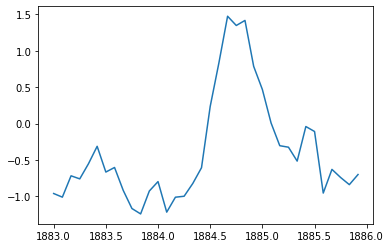

In [22]:
plt.plot(np.arange(1883,1886,1/12), ds_ens.sst.isel(time=slice(0,36)).values.flatten())

In [23]:
ds_ens.sst.isel(time=slice(24,27)).mean(dim='time').values

array([[0.05658255]], dtype=float32)

In [24]:
!pwd

/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output


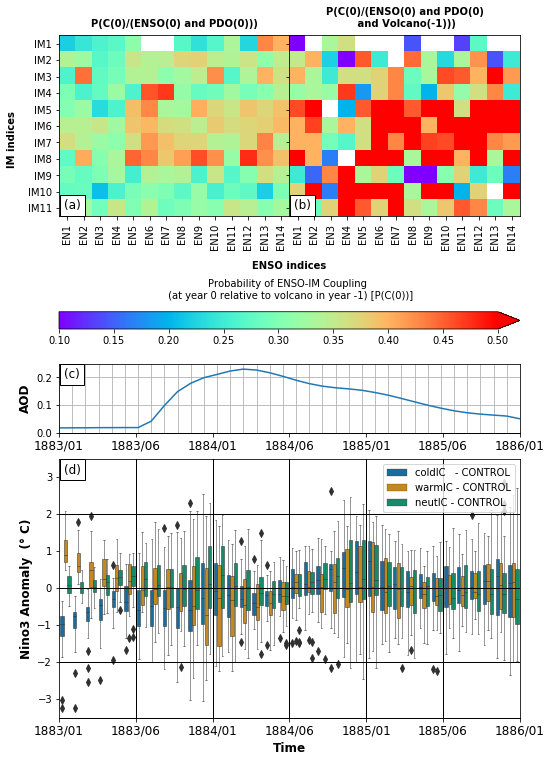

In [25]:
from load_data_state_of_system_review import *
import seaborn as sns
import matplotlib.ticker as ticker

import numpy as np
import datetime as dt
from scipy import signal
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import numbers
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import xarray as xr
import cartopy.crs as ccrs

time = np.arange(36)
volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)

p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')
p_coupling_paleo_pdo = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_pdo = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')
n = 1883
fig = plt.figure(figsize=(8.0,12))
ax1 = fig.add_axes([0.1, 0.43, 0.8, 0.08],
                   xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.05+0.1, 0.8, 0.1], xticklabels=[])
#ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.1])
ax8_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
ax1_ = fig.add_axes([0.1, 0.43, 0.8, 0.0])

ax4 = fig.add_axes([0.1, 0.515+0.07, 0.4, 0.4])
ax5 = fig.add_axes([0.5, 0.515+0.07, 0.4, 0.4], yticklabels=[])

#ax6 = fig.add_axes([0.1, 0.05+0.1+0.1, 0.8, 0.1], xticklabels=[])
#ax7 = fig.add_axes([0.1, 0.05+0.1+0.2, 0.8, 0.1], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.1, 0.8, 0.3], xticklabels=[])

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

im = ax4.imshow(p_coupling_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax4.set_title('(ENSO(0) and PDO(0))')
fig.text(0.3, 0.9, 'P(C(0)/(ENSO(0) and PDO(0)))', ha='center', weight='bold')

im = ax5.imshow(p_coupling_st_volc_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax5.set_title('(ENSO(0) and PDO(0) \n and Volcano(-1))')
fig.text(0.7, 0.9, 'P(C(0)/(ENSO(0) and PDO(0)\n and Volcano(-1)))', ha='center', weight='bold')
for ax in [ax4,ax5]:
    ax.set_xticks(ticks=np.arange(14))
ax4.set_yticks(ticks=np.arange(11))

fig.text(0.5, 0.53+0.03+0.06, 'ENSO indices', ha='center', weight='bold')
fig.text(0.01, 0.8-0.08+0.05, 'IM indices', va='center', rotation='vertical', weight='bold')
    
cbar_ax = fig.add_axes([0.1, 0.55, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)
fig.text(0.5, 0.635-0.16+0.14-0.12+0.02+0.07, 'Probability of ENSO-IM Coupling \n (at year 0 relative to volcano in year -1) [P(C(0))]', ha='center')

###############################
df = pd.DataFrame(columns=['Nino3 (\N{DEGREE SIGN} C)', 'time', 'type'])

count = 0

for i in range(c_sst.shape[0]):
    for j in range(c_sst.shape[1]):
        df.loc[count] = [c_sst[i,j], j, 'coldIC   - CONTROL']
        count = count + 1
        
for i in range(w_sst.shape[0]):
    for j in range(w_sst.shape[1]):
        df.loc[count] = [w_sst[i,j], j, 'warmIC - CONTROL']
        count = count + 1

for i in range(n_sst.shape[0]):
    for j in range(n_sst.shape[1]):
        df.loc[count] = [n_sst[i,j], j, 'neutIC - CONTROL']
        count = count + 1


b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax8, linewidth=0.5)
b.set_ylabel("Nino3",fontsize=12, weight="bold")

df_volc = pd.DataFrame(columns=['AOD', 'time'])
count = 0
for i in range(time.shape[0]):
    df_volc.loc[count] = [volc_aod_10[i], time[i]/12+n]
    count = count + 1
sns.lineplot(x="time", y="AOD", data=df_volc, ax=ax1)
    
#ax1.plot(time/12+n,volc_aod_10)
#ax1.xaxis.grid(True)

#ax1.set_ylabel("AOD", weight="bold")


ax4.set_xticklabels(xticklabels, rotation=90)
ax5.set_xticklabels(xticklabels, rotation=90)
ax4.set_yticklabels(yticklabels)



t = ax4.text(-0.2, 10.05,'(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax5.text(-0.2, 10.05, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = ax8.text(-0.08, 3.0, '(d)', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.08, 5.67, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.08, 3.1, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#ax8.text(9,-5,'100 control simulations,\n 50 cold IC + 50 warm IC', fontsize=12, weight="bold")
#fig.text(0.028, 0.11+0.08+0.1, 'Nino3 Anomaly', fontsize=12, rotation=90)

#for ax in [ax4]:
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
    label.set_fontsize(10)
    
for ax in [ax8]:
    ax.set(xticklabels=[])
for ax in [ax8]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    #ticks = np.arange(0, 37, 6)
    #ax.yaxis.grid(ticks, True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper right')
    ax.set(ylim=(-3.5, 3.5))
    ax.set_ylabel('Nino3 Anomaly  (\N{DEGREE SIGN} C)', fontsize=12)
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    
ax1.margins(0)
ax1.set_xlabel('')
ax1.set_ylabel('AOD', weight='bold', fontsize=12)
ax1.yaxis.grid(True) 
ax1.xaxis.grid(True)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])
ax8.xaxis.set_ticklabels([])
#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax1_, ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 
ax1.xaxis.set_ticks_position('none') 
ax1.set_xlabel('')
ax1.set(ylim=(0.0, 0.25))
ax1_.set_xlabel('')


# ax8.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# ax8.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax8.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
# ax8.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

# ax8.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
# ax8.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')


# ax8.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')
ax8.axvline(x=5.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax8.axvline(x=11.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax8.axvline(x=17.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax8.axvline(x=23.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax8.axvline(x=29.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax8.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=1.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
ax8.axhline(y=2.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=3.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=-1.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
ax8.axhline(y=-2.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=-3.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')


#pl.savefig('fig3_review.png', format='png', dpi=1000)

In [26]:
df['change_pi'] = df['Nino3 (° C)'] - df_pi['Nino3 (° C)']

In [27]:
#df['type'] = df['type'].map({'coldIC   - CONTROL': 'coldIC: CONTROL-NOVOLC', 'warmIC - CONTROL': 'warmIC: CONTROL-NOVOLC', 'neutIC - CONTROL': 'neutIC: CONTROL-NOVOLC'})
df['type'] = df['type'].map({'coldIC   - CONTROL': 'ColdIC', 'warmIC - CONTROL': 'WarmIC', 'neutIC - CONTROL': 'NeutIC'})

In [28]:
#df[df['type']=='neutIC: CONTROL-NOVOLC']
df[df['type']=='neutIC']

Empty DataFrame
Columns: [Nino3 (° C), time, type, change_pi]
Index: []

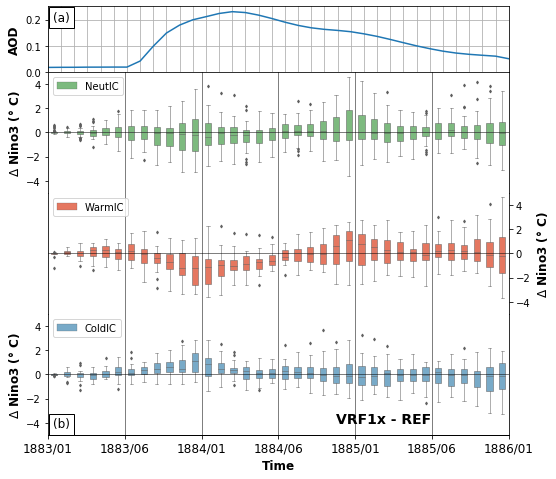

In [29]:
import seaborn as sns
import matplotlib.ticker as ticker

import numpy as np
import datetime as dt
from scipy import signal
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import numbers
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import xarray as xr
import cartopy.crs as ccrs

time = np.arange(36)
volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)


n = 1883
fig = plt.figure(figsize=(8.0,7))
ax1 = fig.add_axes([0.1, 0.82, 0.8, 0.13],
                   xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.05+0.1, 0.8, 0.1], xticklabels=[])
#ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.1])
ax8_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
#ax1_ = fig.add_axes([0.1, 0.43, 0.8, 0.0])

# ax4 = fig.add_axes([0.1, 0.515+0.07, 0.4, 0.4])
# ax5 = fig.add_axes([0.5, 0.515+0.07, 0.4, 0.4], yticklabels=[])

#ax6 = fig.add_axes([0.1, 0.05+0.1+0.1, 0.8, 0.1], xticklabels=[])
#ax7 = fig.add_axes([0.1, 0.05+0.1+0.2, 0.8, 0.1], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.1, 0.8, 0.24], xticklabels=[])
ax9 = fig.add_axes([0.1, 0.1+0.24, 0.8, 0.24], xticklabels=[])
ax10 = fig.add_axes([0.1, 0.1+2*0.24, 0.8, 0.24], xticklabels=[])

flierprops = dict(markersize=2)
b = sns.boxplot(y='change_pi', x='time', 
                 data=df[df['type']=='ColdIC'], 
                 palette="Blues",
                 hue='type', ax=ax8, linewidth=0.5, flierprops = flierprops, width=0.5)
b = sns.boxplot(y='change_pi', x='time', 
                 data=df[df['type']=='WarmIC'], 
                 palette="Reds",
                 hue='type', ax=ax9, linewidth=0.5, flierprops = flierprops, width=0.5)
b = sns.boxplot(y='change_pi', x='time', 
                 data=df[df['type']=='NeutIC'], 
                 palette="Greens",
                 hue='type', ax=ax10, linewidth=0.5, flierprops = flierprops, width=0.5)


b.set_ylabel("Nino3",fontsize=12, weight="bold")

df_volc = pd.DataFrame(columns=['AOD', 'time'])
count = 0
for i in range(time.shape[0]):
    df_volc.loc[count] = [volc_aod_10[i], time[i]/12+n]
    count = count + 1
sns.lineplot(x="time", y="AOD", data=df_volc, ax=ax1)
    
#ax1.plot(time/12+n,volc_aod_10)
#ax1.xaxis.grid(True)

#ax1.set_ylabel("AOD", weight="bold")


# ax4.set_xticklabels(xticklabels, rotation=90)
# ax5.set_xticklabels(xticklabels, rotation=90)
# ax4.set_yticklabels(yticklabels)



# t = ax4.text(-0.2, 10.05,'(a)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax5.text(-0.2, 10.05, '(b)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = ax8.text(-0.08, 3.0, '(d)', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax10.text(-0.08, 9.2, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.08, -4.4, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#ax8.text(9,-5,'100 control simulations,\n 50 cold IC + 50 warm IC', fontsize=12, weight="bold")
#fig.text(0.028, 0.11+0.08+0.1, 'Nino3 Anomaly', fontsize=12, rotation=90)

# #for ax in [ax4]:
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
#     label.set_fontsize(10)
    
for ax in [ax8]:
    ax.set(xticklabels=[])
for ax in [ax8]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    #ticks = np.arange(0, 37, 6)
    #ax.yaxis.grid(ticks, True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper right')
    ax.set(ylim=(-5.0, 5.0))
    ax.set_ylabel('Nino3 Anomaly  (\N{DEGREE SIGN} C)', fontsize=12)
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    
ax1.margins(0)
ax1.set_xlabel('')
ax1.set_ylabel('AOD', weight='bold', fontsize=12)
ax1.yaxis.grid(True) 
ax1.xaxis.grid(True)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])
ax8.xaxis.set_ticklabels([])
#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 
ax1.xaxis.set_ticks_position('none') 
ax1.set_xlabel('')
ax1.set(ylim=(0.0, 0.25))
ax1_.set_xlabel('')


# ax8.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# ax8.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax8.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
# ax8.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

# ax8.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
# ax8.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')


# ax8.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')
for ax in [ax8,ax9,  ax10]:
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.yaxis.grid(True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper left')
    ax.set(ylim=(-5.0, 5.0))
    ax.set_ylabel('$\Delta$ Nino3 (\N{DEGREE SIGN} C)', fontsize=12, weight='bold')
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_ticks([])
    ax.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'k')
    ax.axvline(x=5.5, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+2*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+3*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+4*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')

#ax1.axvline(x=0.5, ymin=0, ymax=0.35,linewidth=0.5, color = 'k')
    
# ax1.margins(0)
# ax1.set_xlabel('')
# ax1.set_ylabel('AOD', weight='bold', fontsize=12)
# ax1.yaxis.grid(True) 
# ax1.xaxis.grid(True)
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])

#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 

ax8.spines['top'].set_visible(False)
ax9.spines['bottom'].set_visible(False)

ax9.spines['top'].set_visible(False)
ax10.spines['bottom'].set_visible(False)
ax9.yaxis.tick_right()

ax9.set_ylabel('')
ax9.set_ylabel('$\Delta$ Nino3 (\N{DEGREE SIGN} C)', fontsize=12, weight='bold', rotation=90)
ax9.yaxis.set_label_position("right")
ax9.legend(loc='upper left')

ax10.set_ylabel('$\Delta$ Nino3 (\N{DEGREE SIGN} C)', fontsize=12, weight='bold', rotation=90)
ax8.text(22,-4.0,'VRF1x - REF', fontsize=14, weight='bold')

pl.savefig('fig4_review.png', format='png', dpi=1000)

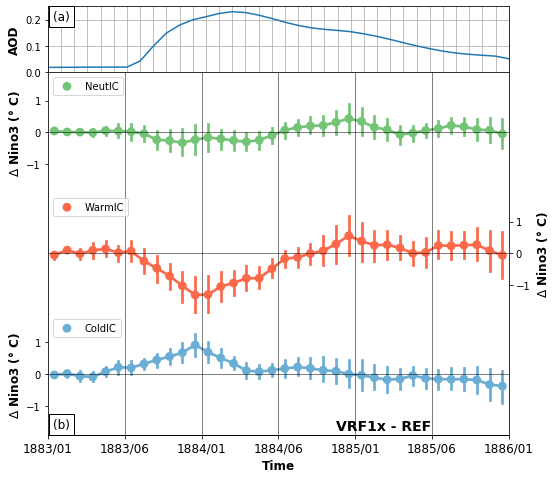

In [41]:
import seaborn as sns
import matplotlib.ticker as ticker

import numpy as np
import datetime as dt
from scipy import signal
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import numbers
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import xarray as xr
import cartopy.crs as ccrs

time = np.arange(36)
volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)


n = 1883
fig = plt.figure(figsize=(8.0,7))
ax1 = fig.add_axes([0.1, 0.82, 0.8, 0.13],
                   xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.05+0.1, 0.8, 0.1], xticklabels=[])
#ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.1])
ax8_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
#ax1_ = fig.add_axes([0.1, 0.43, 0.8, 0.0])

# ax4 = fig.add_axes([0.1, 0.515+0.07, 0.4, 0.4])
# ax5 = fig.add_axes([0.5, 0.515+0.07, 0.4, 0.4], yticklabels=[])

#ax6 = fig.add_axes([0.1, 0.05+0.1+0.1, 0.8, 0.1], xticklabels=[])
#ax7 = fig.add_axes([0.1, 0.05+0.1+0.2, 0.8, 0.1], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.1, 0.8, 0.24], xticklabels=[])
ax9 = fig.add_axes([0.1, 0.1+0.24, 0.8, 0.24], xticklabels=[])
ax10 = fig.add_axes([0.1, 0.1+2*0.24, 0.8, 0.24], xticklabels=[])

flierprops = dict(markersize=2)
b = sns.pointplot(y='change_pi', x='time', 
                 data=df[df['type']=='ColdIC'], 
                 palette="Blues",
                 hue='type', ax=ax8, linewidth=0.5, flierprops = flierprops, width=0.5)
b = sns.pointplot(y='change_pi', x='time', 
                 data=df[df['type']=='WarmIC'], 
                 palette="Reds",
                 hue='type', ax=ax9, linewidth=0.5, flierprops = flierprops, width=0.5)
b = sns.pointplot(y='change_pi', x='time', 
                 data=df[df['type']=='NeutIC'], 
                 palette="Greens",
                 hue='type', ax=ax10, linewidth=0.5, flierprops = flierprops, width=0.5)


b.set_ylabel("Nino3",fontsize=12, weight="bold")

df_volc = pd.DataFrame(columns=['AOD', 'time'])
count = 0
for i in range(time.shape[0]):
    df_volc.loc[count] = [volc_aod_10[i], time[i]/12+n]
    count = count + 1
sns.lineplot(x="time", y="AOD", data=df_volc, ax=ax1)
    
#ax1.plot(time/12+n,volc_aod_10)
#ax1.xaxis.grid(True)

#ax1.set_ylabel("AOD", weight="bold")


# ax4.set_xticklabels(xticklabels, rotation=90)
# ax5.set_xticklabels(xticklabels, rotation=90)
# ax4.set_yticklabels(yticklabels)



# t = ax4.text(-0.2, 10.05,'(a)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax5.text(-0.2, 10.05, '(b)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = ax8.text(-0.08, 3.0, '(d)', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax10.text(-0.11, 3.52, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.11, -1.7, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#ax8.text(9,-5,'100 control simulations,\n 50 cold IC + 50 warm IC', fontsize=12, weight="bold")
#fig.text(0.028, 0.11+0.08+0.1, 'Nino3 Anomaly', fontsize=12, rotation=90)

# #for ax in [ax4]:
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
#     label.set_fontsize(10)
    
for ax in [ax8]:
    ax.set(xticklabels=[])
for ax in [ax8]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    #ticks = np.arange(0, 37, 6)
    #ax.yaxis.grid(ticks, True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper right')
    ax.set(ylim=(-5.0, 5.0))
    ax.set_ylabel('Nino3 Anomaly  (\N{DEGREE SIGN} C)', fontsize=12)
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    
ax1.margins(0)
ax1.set_xlabel('')
ax1.set_ylabel('AOD', weight='bold', fontsize=12)
ax1.yaxis.grid(True) 
ax1.xaxis.grid(True)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])
ax8.xaxis.set_ticklabels([])
#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 
ax1.xaxis.set_ticks_position('none') 
ax1.set_xlabel('')
ax1.set(ylim=(0.0, 0.25))
ax1_.set_xlabel('')


# ax8.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# ax8.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax8.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
# ax8.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

# ax8.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
# ax8.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')


# ax8.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')
for ax in [ax8,ax9,  ax10]:
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.yaxis.grid(True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper left')
    ax.set(ylim=(-1.9, 1.9))
    ax.set_ylabel('$\Delta$ Nino3 (\N{DEGREE SIGN} C)', fontsize=12, weight='bold')
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_ticks([])
    ax.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'k')
    ax.axvline(x=5.5, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+2*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+3*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+4*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')

#ax1.axvline(x=0.5, ymin=0, ymax=0.35,linewidth=0.5, color = 'k')
    
# ax1.margins(0)
# ax1.set_xlabel('')
# ax1.set_ylabel('AOD', weight='bold', fontsize=12)
# ax1.yaxis.grid(True) 
# ax1.xaxis.grid(True)
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])

#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 

ax8.spines['top'].set_visible(False)
ax9.spines['bottom'].set_visible(False)

ax9.spines['top'].set_visible(False)
ax10.spines['bottom'].set_visible(False)
ax9.yaxis.tick_right()

ax9.set_ylabel('')
ax9.set_ylabel('$\Delta$ Nino3 (\N{DEGREE SIGN} C)', fontsize=12, weight='bold', rotation=90)
ax9.yaxis.set_label_position("right")
ax9.legend(loc='upper left')

ax10.set_ylabel('$\Delta$ Nino3 (\N{DEGREE SIGN} C)', fontsize=12, weight='bold', rotation=90)
ax8.text(22,-1.75,'VRF1x - REF', fontsize=14, weight='bold')

pl.savefig('fig4_review.png', format='png', dpi=1000)

In [31]:
df_analysis = df.copy()
df_analysis['time'] = df_analysis['time'].astype('str') 
df_analysis_djf = df_analysis[(df_analysis['time']=='24') | (df_analysis['time']=='25')| (df_analysis['time']=='26')]
print(df_analysis_djf[df_analysis_djf['type']=='ColdIC']['change_pi'].median())
print(df_analysis_djf[df_analysis_djf['type']=='NeutIC']['change_pi'].median())
print(df_analysis_djf[df_analysis_djf['type']=='WarmIC']['change_pi'].median())

print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='ColdIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='ColdIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='NeutIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='NeutIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='WarmIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='WarmIC']['change_pi'], 75))  # Q1

print("\n 1883-1884 DJF \n")

df_analysis_1883_1884_djf = df_analysis[(df_analysis['time']=='12') | (df_analysis['time']=='13')| (df_analysis['time']=='14')]
print(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='ColdIC']['change_pi'].median())
print(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='NeutIC']['change_pi'].median())
print(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='WarmIC']['change_pi'].median())

print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='ColdIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='ColdIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='NeutIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='NeutIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='WarmIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='WarmIC']['change_pi'], 75))  # Q1


-0.10672041773796082
-0.010184705257415771
0.4882076680660248
-0.9073320478200912
0.5565551817417145
-0.5917719304561615
0.8860585242509842
-0.9555910378694534
1.3280265405774117

 1883-1884 DJF 

0.46137966215610504
-0.14069414138793945
-1.116626113653183
0.05134591460227966
1.003311038017273
-0.9492733180522919
0.4652482345700264
-1.9299390316009521
-0.5486305263329996


In [33]:
df_analysis = df.copy()
df_analysis['time'] = df_analysis['time'].astype('str') 
df_analysis_djf = df_analysis[(df_analysis['time']=='24') | (df_analysis['time']=='25')| (df_analysis['time']=='26')]
print(df_analysis_djf[df_analysis_djf['type']=='ColdIC']['change_pi'].mean())
print(df_analysis_djf[df_analysis_djf['type']=='NeutIC']['change_pi'].mean())
print(df_analysis_djf[df_analysis_djf['type']=='WarmIC']['change_pi'].mean())

print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='ColdIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='ColdIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='NeutIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='NeutIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='WarmIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_djf[df_analysis_djf['type']=='WarmIC']['change_pi'], 75))  # Q1

print("\n 1883-1884 DJF \n")

df_analysis_1883_1884_djf = df_analysis[(df_analysis['time']=='12') | (df_analysis['time']=='13')| (df_analysis['time']=='14')]
print(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='ColdIC']['change_pi'].mean())
print(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='NeutIC']['change_pi'].mean())
print(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='WarmIC']['change_pi'].mean())

print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='ColdIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='ColdIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='NeutIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='NeutIC']['change_pi'], 75))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='WarmIC']['change_pi'], 25))  # Q1
print(np.percentile(df_analysis_1883_1884_djf[df_analysis_1883_1884_djf['type']=='WarmIC']['change_pi'], 75))  # Q1


-0.10088308375521467
0.19689049477464393
0.303853252728004
-0.9073320478200912
0.5565551817417145
-0.5917719304561615
0.8860585242509842
-0.9555910378694534
1.3280265405774117

 1883-1884 DJF 

0.5184431065425233
-0.20476433725908716
-1.0890589629101062
0.05134591460227966
1.003311038017273
-0.9492733180522919
0.4652482345700264
-1.9299390316009521
-0.5486305263329996


ValueError: min() arg is an empty sequence

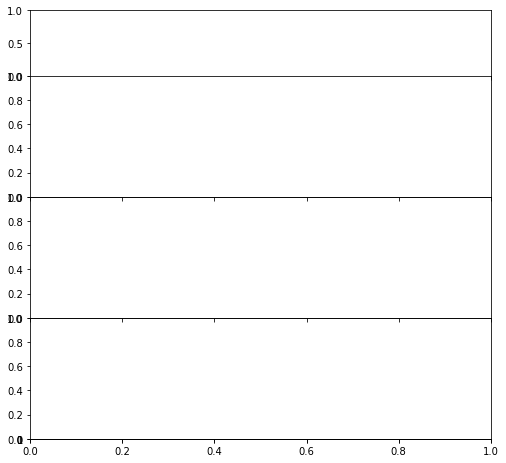

In [34]:
import seaborn as sns
import matplotlib.ticker as ticker

import numpy as np
import datetime as dt
from scipy import signal
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import numbers
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import xarray as xr
import cartopy.crs as ccrs

time = np.arange(36)
volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)


n = 1883
fig = plt.figure(figsize=(8.0,7))
ax1 = fig.add_axes([0.1, 0.82, 0.8, 0.13],
                   xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.05+0.1, 0.8, 0.1], xticklabels=[])
#ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.1])
ax8_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
#ax1_ = fig.add_axes([0.1, 0.43, 0.8, 0.0])

# ax4 = fig.add_axes([0.1, 0.515+0.07, 0.4, 0.4])
# ax5 = fig.add_axes([0.5, 0.515+0.07, 0.4, 0.4], yticklabels=[])

#ax6 = fig.add_axes([0.1, 0.05+0.1+0.1, 0.8, 0.1], xticklabels=[])
#ax7 = fig.add_axes([0.1, 0.05+0.1+0.2, 0.8, 0.1], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.1, 0.8, 0.24], xticklabels=[])
ax9 = fig.add_axes([0.1, 0.1+0.24, 0.8, 0.24], xticklabels=[])
ax10 = fig.add_axes([0.1, 0.1+2*0.24, 0.8, 0.24], xticklabels=[])

flierprops = dict(markersize=2)
b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', 
                 data=df[df['type']=='coldIC'], 
                 palette="Blues",
                 hue='type', ax=ax8, linewidth=0.5, flierprops = flierprops, width=0.5)
b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', 
                 data=df[df['type']=='warmIC'], 
                 palette="Reds",
                 hue='type', ax=ax9, linewidth=0.5, flierprops = flierprops, width=0.5)
b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', 
                 data=df[df['type']=='neutIC'], 
                 palette="Greens",
                 hue='type', ax=ax10, linewidth=0.5, flierprops = flierprops, width=0.5)


b.set_ylabel("Nino3",fontsize=12, weight="bold")

df_volc = pd.DataFrame(columns=['AOD', 'time'])
count = 0
for i in range(time.shape[0]):
    df_volc.loc[count] = [volc_aod_10[i], time[i]/12+n]
    count = count + 1
sns.lineplot(x="time", y="AOD", data=df_volc, ax=ax1)
    
#ax1.plot(time/12+n,volc_aod_10)
#ax1.xaxis.grid(True)

#ax1.set_ylabel("AOD", weight="bold")


# ax4.set_xticklabels(xticklabels, rotation=90)
# ax5.set_xticklabels(xticklabels, rotation=90)
# ax4.set_yticklabels(yticklabels)



# t = ax4.text(-0.2, 10.05,'(a)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax5.text(-0.2, 10.05, '(b)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = ax8.text(-0.08, 3.0, '(d)', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax10.text(-0.08, 6.5, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.08, -3.1, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#ax8.text(9,-5,'100 control simulations,\n 50 cold IC + 50 warm IC', fontsize=12, weight="bold")
#fig.text(0.028, 0.11+0.08+0.1, 'Nino3 Anomaly', fontsize=12, rotation=90)

# #for ax in [ax4]:
# for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
#     label.set_fontsize(10)
    
for ax in [ax8]:
    ax.set(xticklabels=[])
for ax in [ax8]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    #ticks = np.arange(0, 37, 6)
    #ax.yaxis.grid(ticks, True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper right')
    ax.set(ylim=(-3.5, 3.5))
    ax.set_ylabel('Nino3 Anomaly  (\N{DEGREE SIGN} C)', fontsize=12)
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    
ax1.margins(0)
ax1.set_xlabel('')
ax1.set_ylabel('AOD', weight='bold', fontsize=12)
ax1.yaxis.grid(True) 
ax1.xaxis.grid(True)
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])
ax8.xaxis.set_ticklabels([])
#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 
ax1.xaxis.set_ticks_position('none') 
ax1.set_xlabel('')
ax1.set(ylim=(0.0, 0.25))
ax1_.set_xlabel('')


# ax8.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# ax8.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax8.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
# ax8.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

# ax8.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
# ax8.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')


# ax8.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')
for ax in [ax8,ax9,  ax10]:
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.yaxis.grid(True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper left')
    ax.set(ylim=(-3.5, 3.5))
    ax.set_ylabel('Nino3 \n Anomaly  (\N{DEGREE SIGN} C)', fontsize=12, weight='bold')
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_ticks([])
    ax.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'k')
    ax.axvline(x=5.5, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+2*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+3*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+4*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')

#ax1.axvline(x=0.5, ymin=0, ymax=0.35,linewidth=0.5, color = 'k')
    
# ax1.margins(0)
# ax1.set_xlabel('')
# ax1.set_ylabel('AOD', weight='bold', fontsize=12)
# ax1.yaxis.grid(True) 
# ax1.xaxis.grid(True)
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])

#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 

ax8.spines['top'].set_visible(False)
ax9.spines['bottom'].set_visible(False)

ax9.spines['top'].set_visible(False)
ax10.spines['bottom'].set_visible(False)
ax9.yaxis.tick_right()

ax9.set_ylabel('')
ax9.set_ylabel('Nino3 \n Anomaly  (\N{DEGREE SIGN} C)', fontsize=12, weight='bold', rotation=90)
ax9.yaxis.set_label_position("right")
ax9.legend(loc='upper left')

ax10.set_ylabel('Nino3 \n Anomaly(\N{DEGREE SIGN} C)', fontsize=12, weight='bold', rotation=90)
ax10.text(22,2.3,'CONTROL', fontsize=14, weight='bold')

#pl.savefig('fig4_review.png', format='png', dpi=1000)

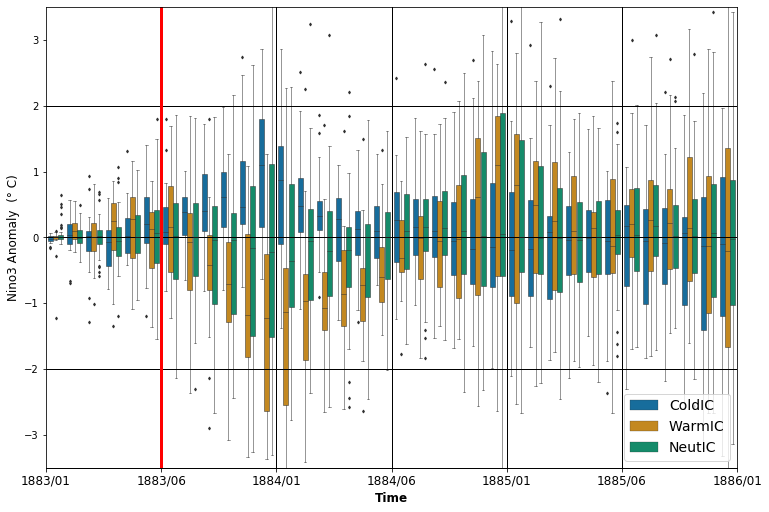

In [42]:
fig = plt.figure(figsize=(12.0,8.0))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])

flierprops = dict(markersize=2)
b = sns.boxplot(y='change_pi', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='type', ax=ax1, linewidth=0.5, flierprops=flierprops) # width can be used
ax1.xaxis.set_ticklabels([])
for ax in [ax_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax1.xaxis.set_ticks_position('none') 
ax1.set_xlabel('')
#ax1.set(ylim=(0.0, 0.25))
#ax1_.set_xlabel('')
for ax in [ax1]:
    #ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.yaxis.grid(True) 
    #ax.xaxis.grid(True)
    #ax.legend(loc='bottom right')
    ax.set(ylim=(-3.5, 3.5))
    ax.set_ylabel('Nino3 Anomaly  (\N{DEGREE SIGN} C)', fontsize=12)
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))

# ax1.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# ax1.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax1.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
# ax1.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

# ax1.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')

ax1.axvline(x=5.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax1.axvline(x=11.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax1.axvline(x=17.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax1.axvline(x=23.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax1.axvline(x=29.5, ymin=-3, ymax=3,linewidth=1, color = 'k')
ax1.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=1.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
ax1.axhline(y=2.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=3.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=-1.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
ax1.axhline(y=-2.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')
#ax8.axhline(y=-3.0, xmin=0.0, xmax=1.0, linewidth=1, color = 'k')


ax1.axvline(x=5.5, ymin=-3, ymax=3,linewidth=3, color = 'r')
#ax1.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')

#ax1.text(12,-3.3,'Krakatoa \n volcanic eruption', color='r', fontsize=14,horizontalalignment='center')
ax1.legend(loc='lower right', fontsize=14)
#adjust_box_widths(fig, 0.7)
plt.savefig('control_minus_pi.png')

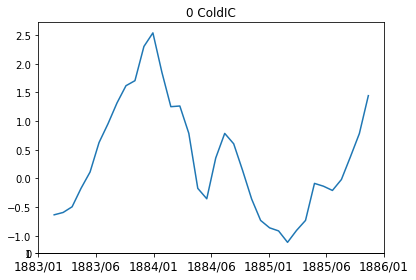

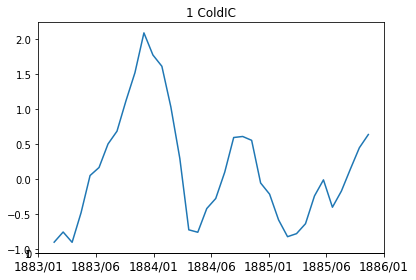

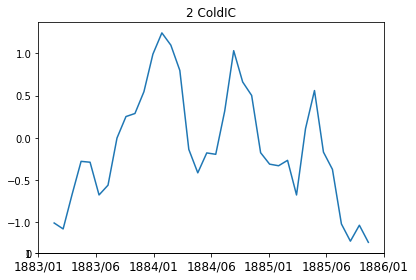

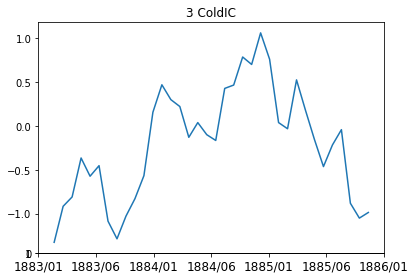

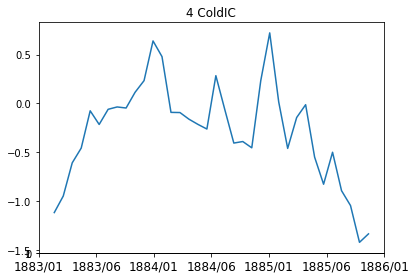

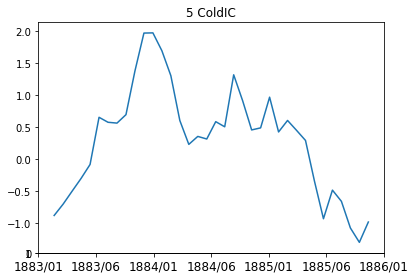

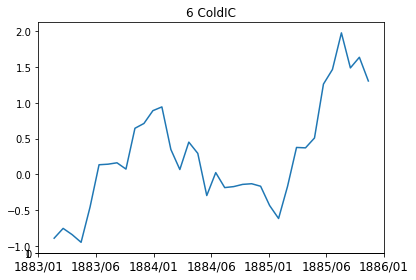

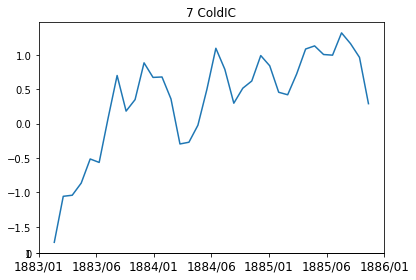

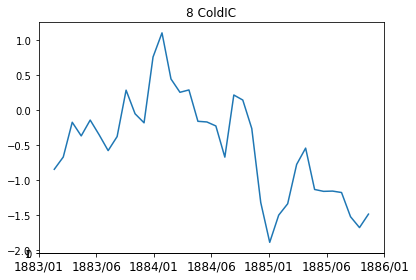

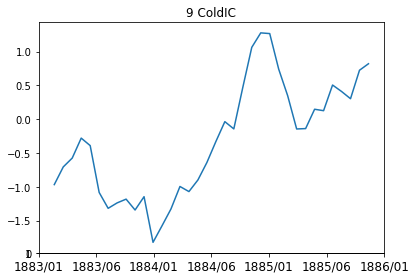

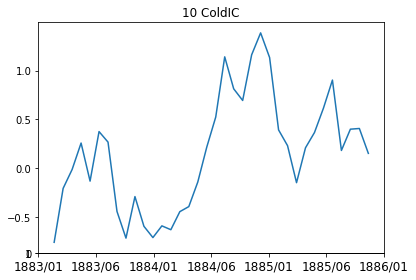

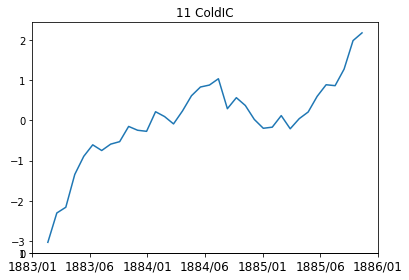

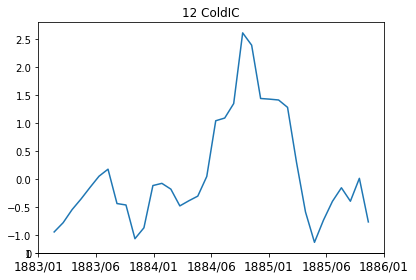

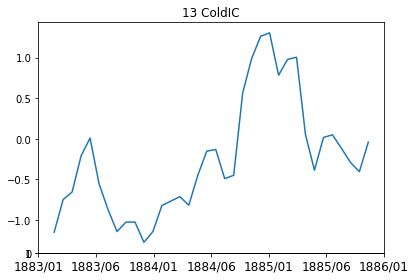

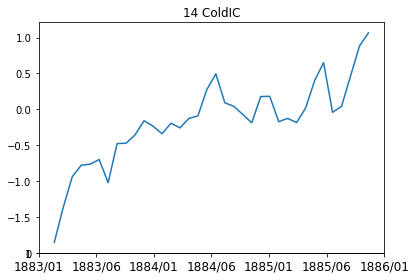

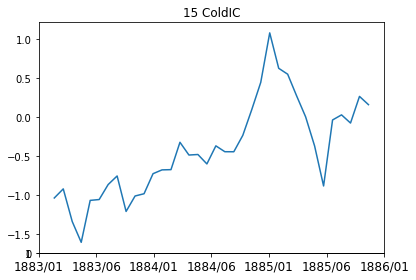

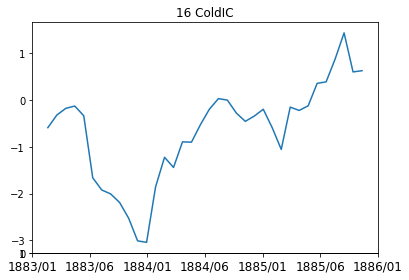

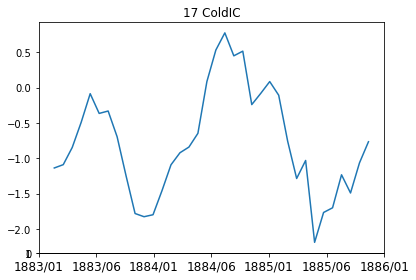

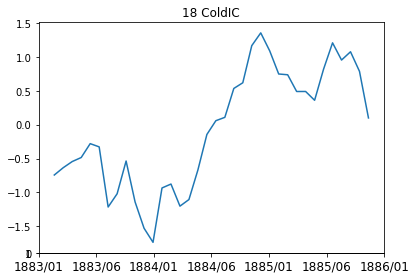

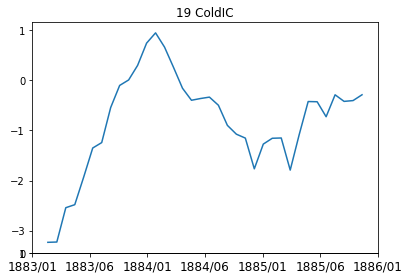

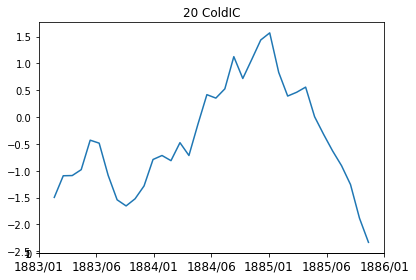

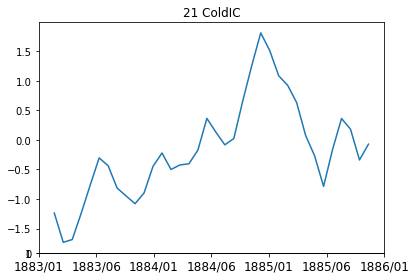

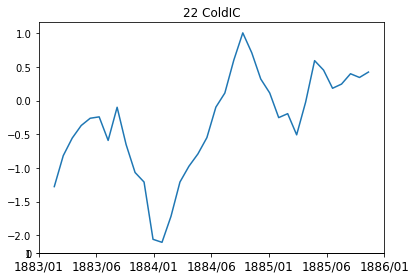

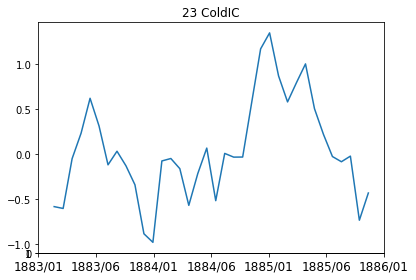

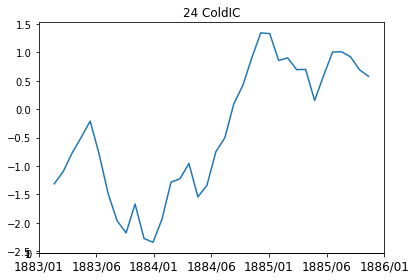

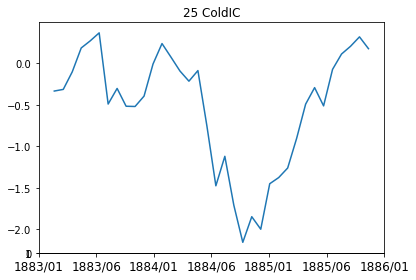

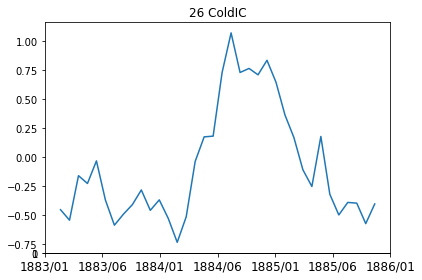

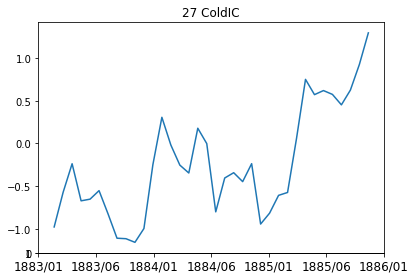

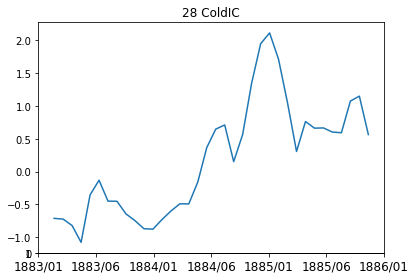

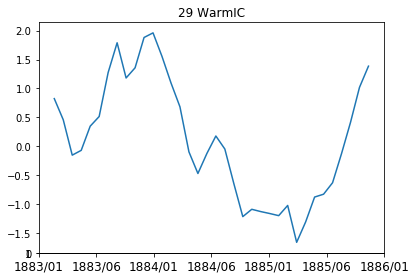

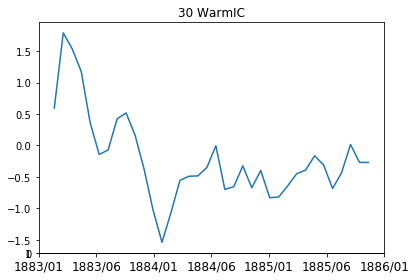

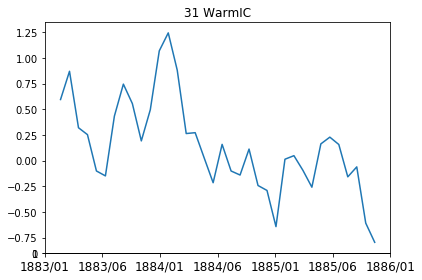

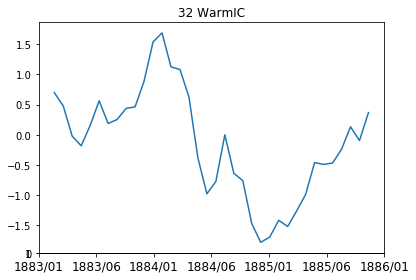

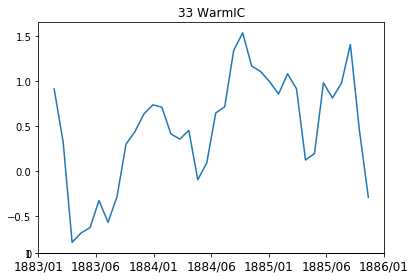

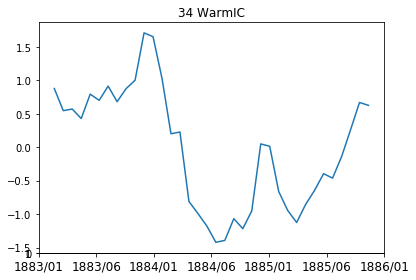

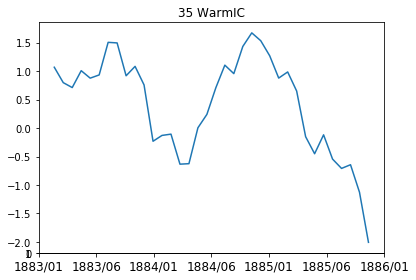

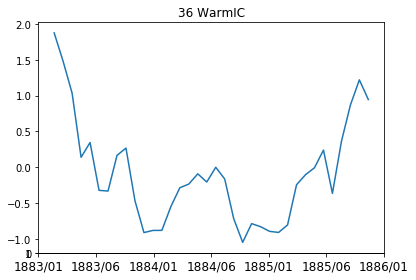

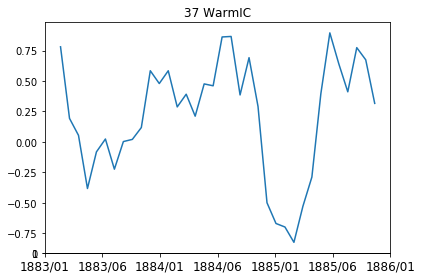

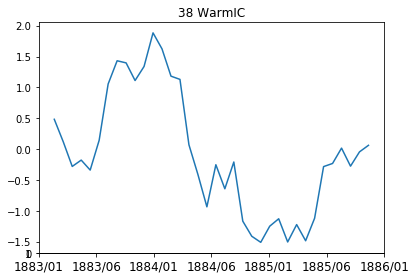

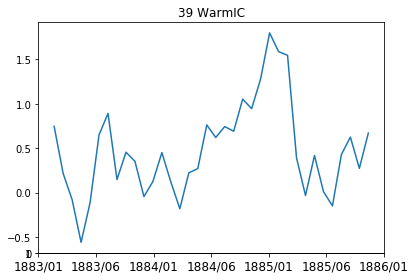

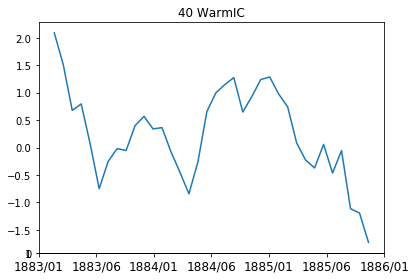

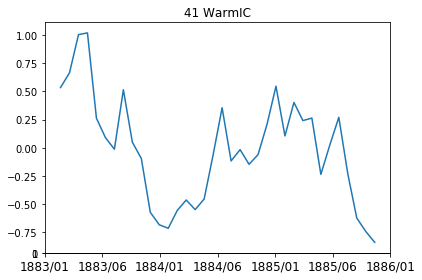

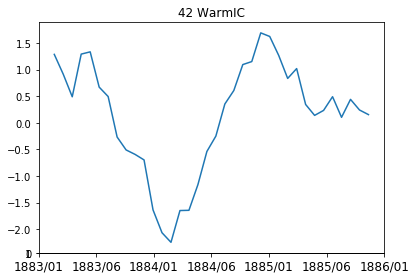

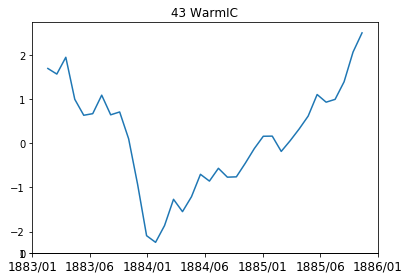

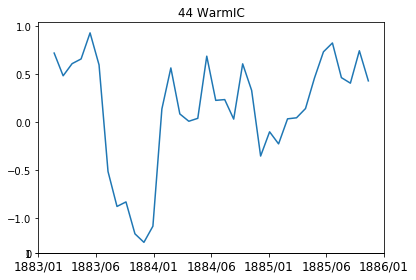

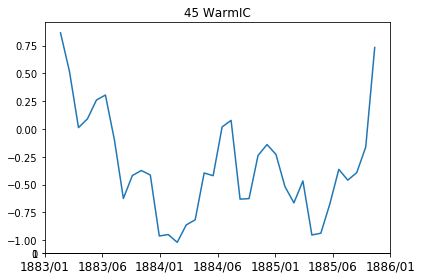

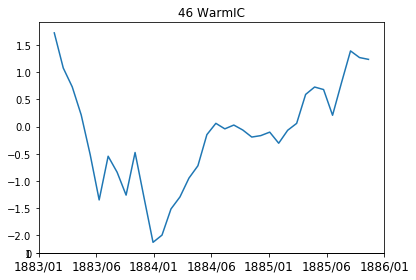

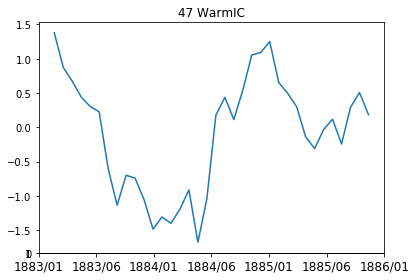

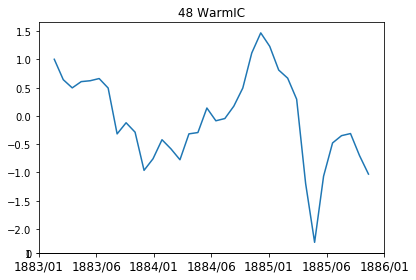

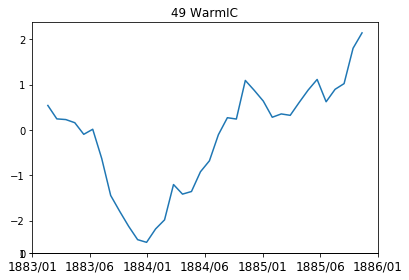

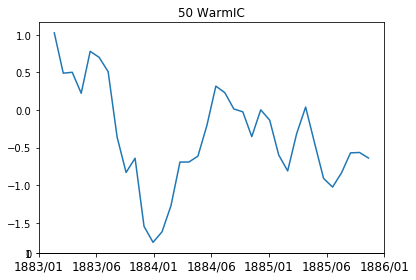

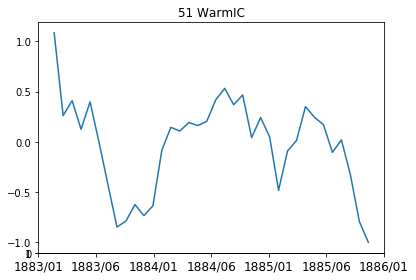

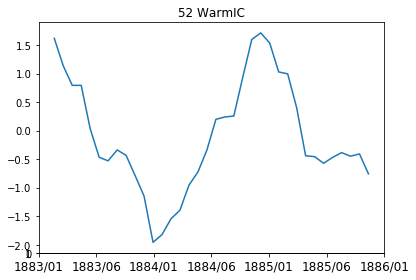

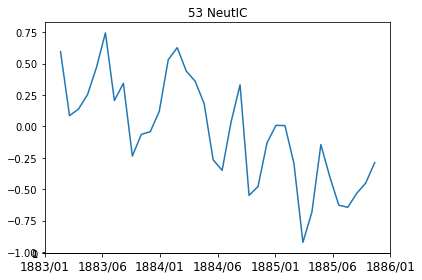

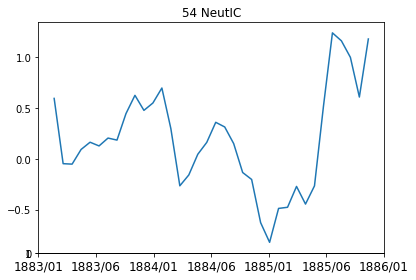

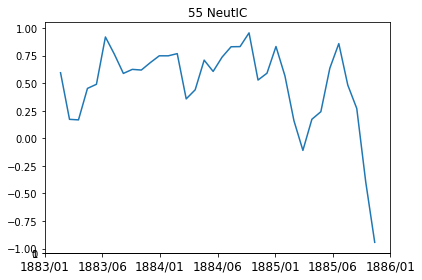

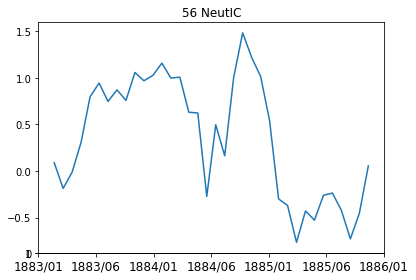

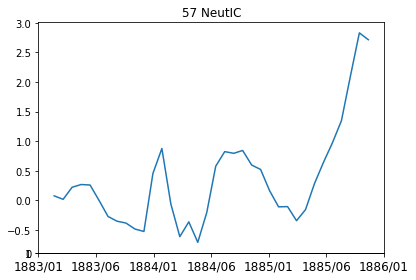

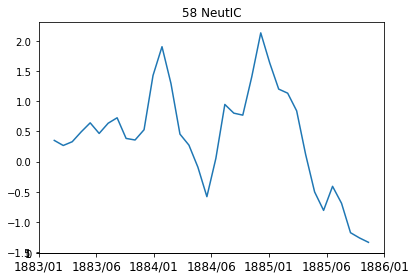

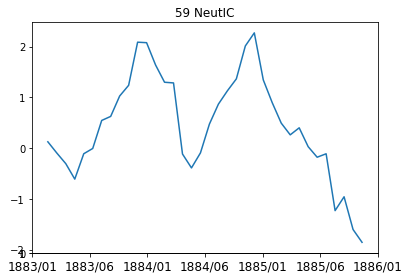

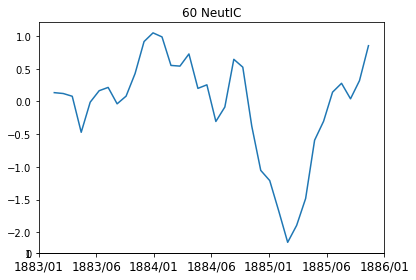

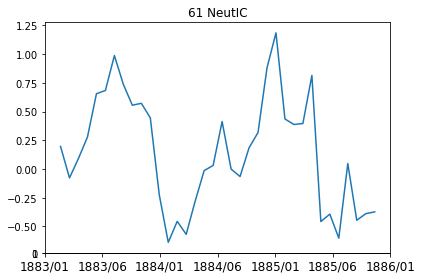

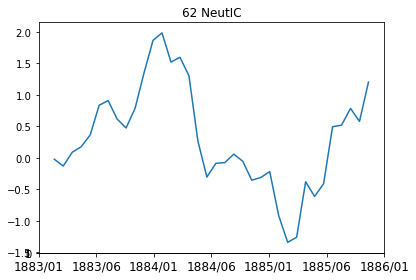

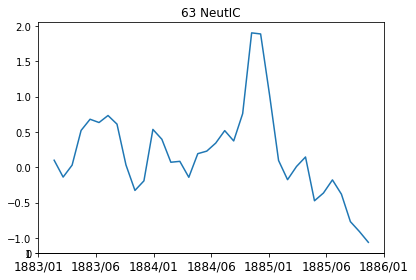

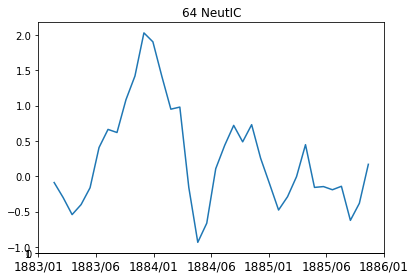

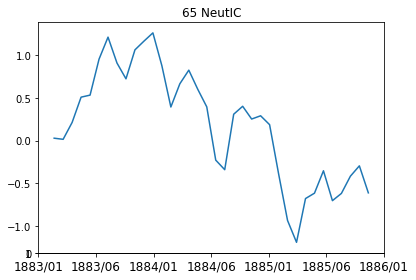

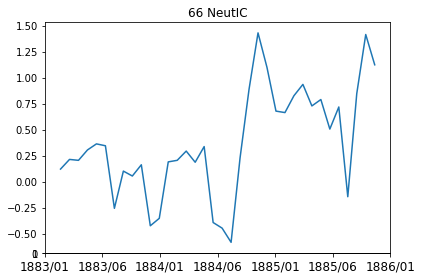

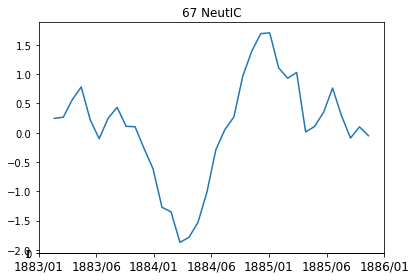

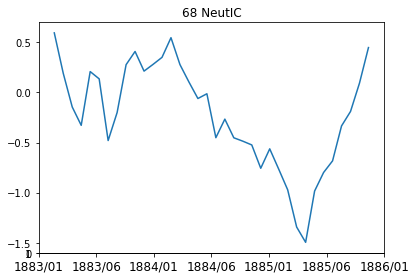

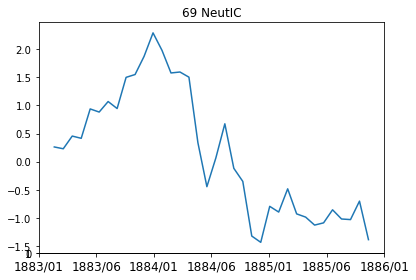

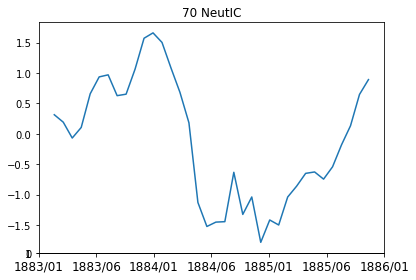

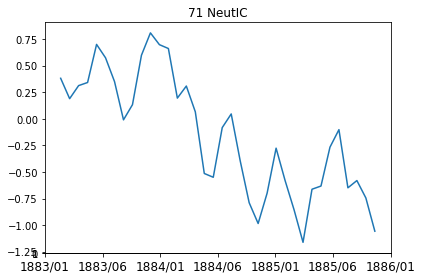

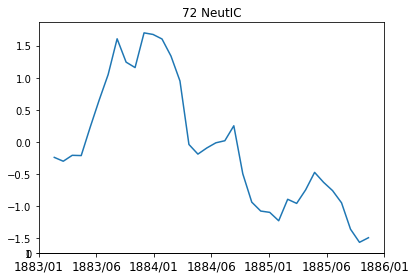

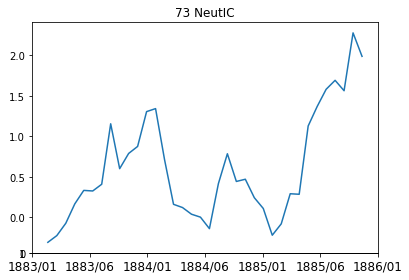

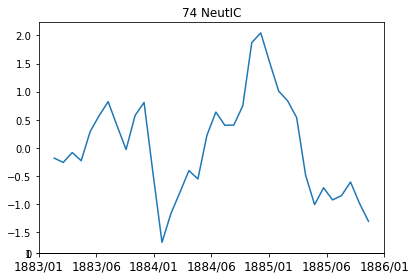

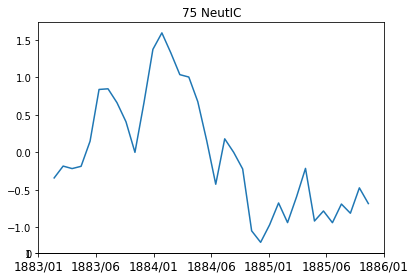

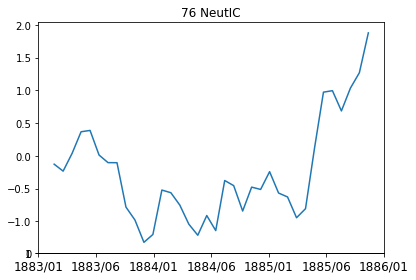

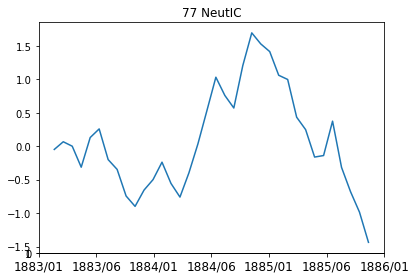

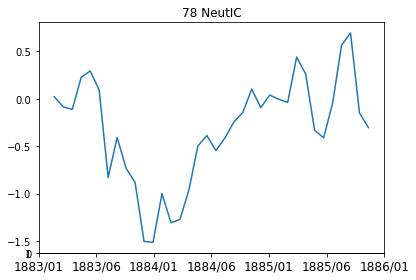

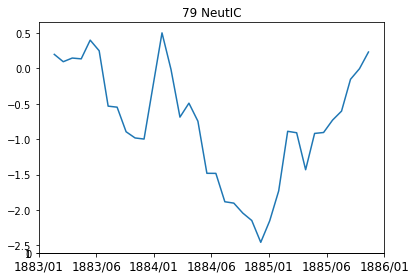

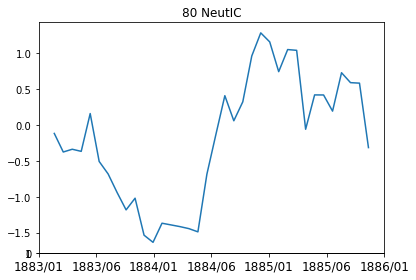

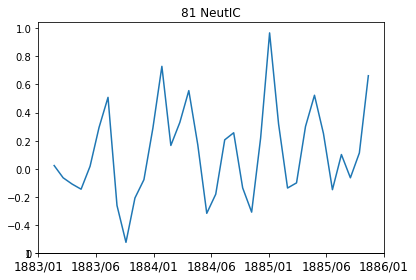

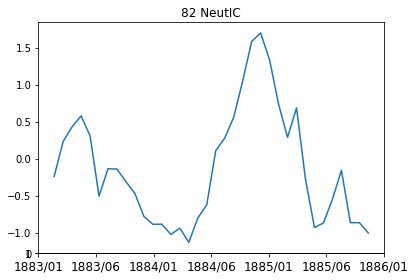

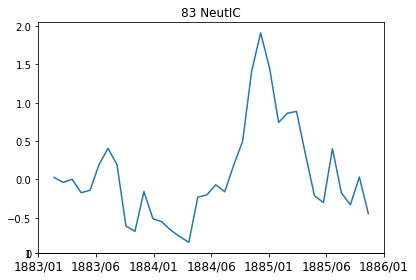

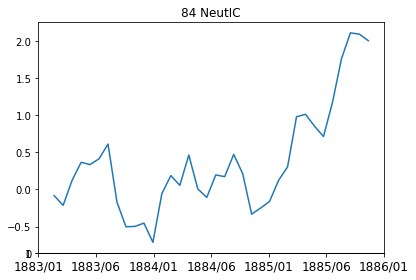

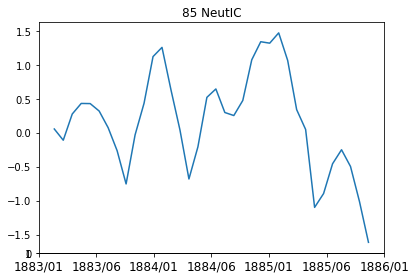

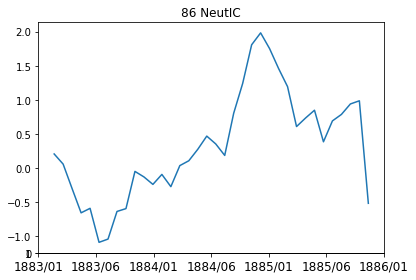

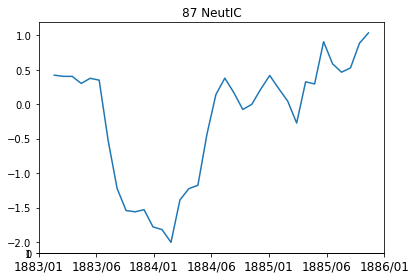

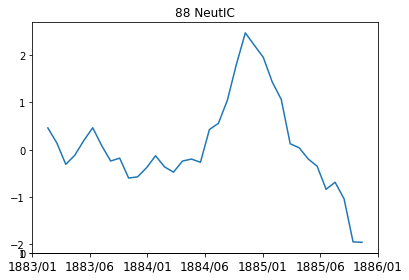

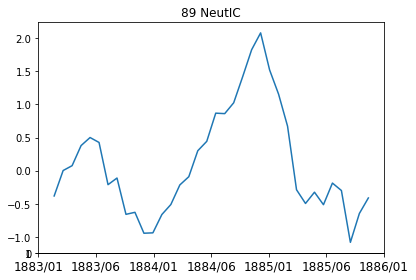

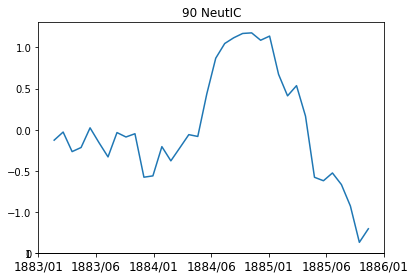

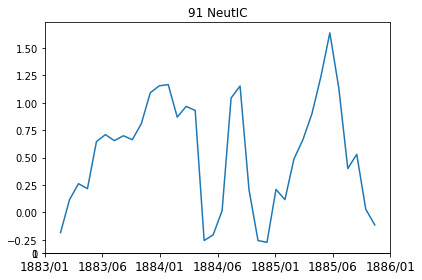

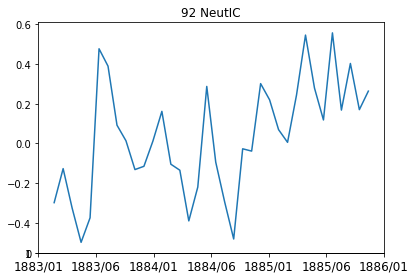

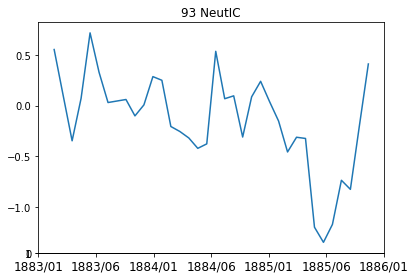

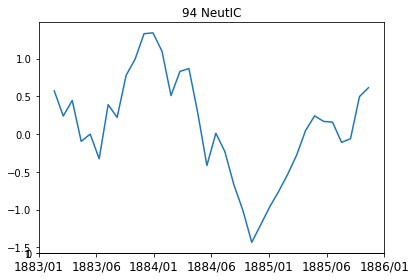

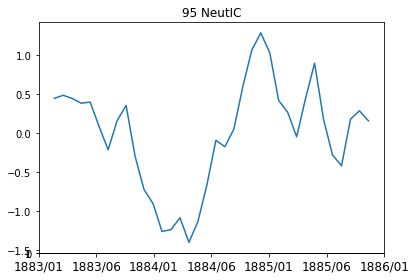

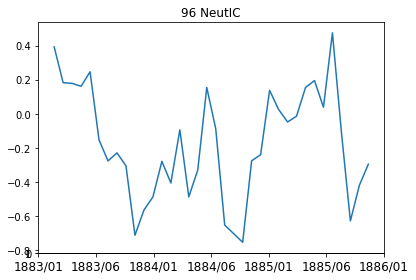

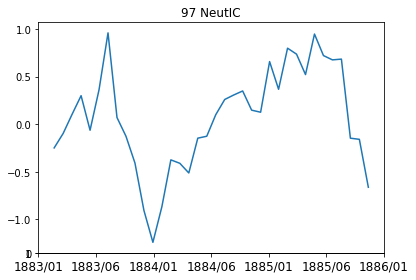

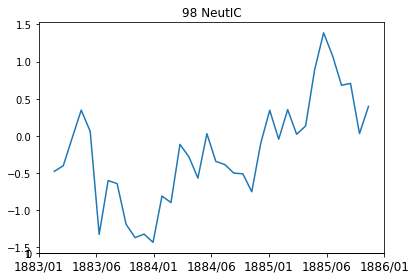

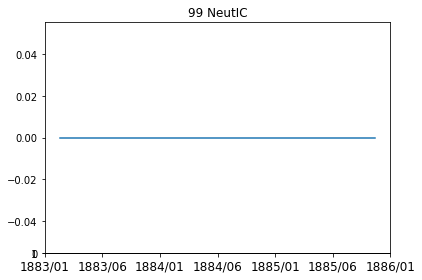

In [43]:
for i in range(100):
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
    df['Nino3 (° C)'].iloc[i*36:(i+1)*36].plot(ax=ax)
    ax_.set_xticks(np.linspace(0,1,7))
    ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
    ax.set_title(str(i)+" "+df['type'].iloc[i*36])
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_ticks_position('none') 

In [44]:
from load_data_state_of_system_review import *
import seaborn as sns
df_cng_vrf = pd.DataFrame(columns=['Nino3', 'Time', 'type'])
count=0

for i in range(w_sst_025x.shape[0]):
    for j in range(w_sst_025x.shape[1]):
        df_cng_vrf.loc[count] = [w_sst_025x[i,j], j, '0.25 x VRF']
        count = count + 1

for i in range(c_sst_025x.shape[0]):
    for j in range(c_sst_025x.shape[1]):
        df_cng_vrf.loc[count] = [c_sst_025x[i,j], j, '0.25 x VRF']
        count = count + 1

for i in range(n_sst_025x.shape[0]):
    for j in range(n_sst_025x.shape[1]):
        df_cng_vrf.loc[count] = [n_sst_025x[i,j], j, '0.25 x VRF']
        count = count + 1

for i in range(w_sst_4x.shape[0]):
    for j in range(w_sst_4x.shape[1]):
        df_cng_vrf.loc[count] = [w_sst_4x[i,j], j, '4 x VRF']
        count = count + 1

for i in range(c_sst_4x.shape[0]):
    for j in range(c_sst_4x.shape[1]):
        df_cng_vrf.loc[count] = [c_sst_4x[i,j], j, '4 x VRF']
        count = count + 1

for i in range(n_sst_4x.shape[0]):
    for j in range(n_sst_4x.shape[1]):
        df_cng_vrf.loc[count] = [n_sst_4x[i,j], j, '4 x VRF']
        count = count + 1

for i in range(w_sst_025x_o.shape[0]):
    for j in range(w_sst_025x_o.shape[1]):
        df_cng_vrf.loc[count] = [w_sst_025x_o[i,j], j, '1 x VRF transitioned to warm ENSO']
        count = count + 1

for i in range(c_sst_025x_o.shape[0]):
    for j in range(c_sst_025x_o.shape[1]):
        df_cng_vrf.loc[count] = [c_sst_025x_o[i,j], j, '1 x VRF transitioned to warm ENSO']
        count = count + 1

for i in range(n_sst_025x_o.shape[0]):
    for j in range(n_sst_025x_o.shape[1]):
        df_cng_vrf.loc[count] = [n_sst_025x_o[i,j], j, '1 x VRF transitioned to warm ENSO']
        count = count + 1

for i in range(w_sst_4x_o.shape[0]):
    for j in range(w_sst_4x_o.shape[1]):
        df_cng_vrf.loc[count] = [w_sst_4x_o[i,j], j, '1 x VRF transitioned to cold ENSO']
        count = count + 1

for i in range(c_sst_4x_o.shape[0]):
    for j in range(c_sst_4x_o.shape[1]):
        df_cng_vrf.loc[count] = [c_sst_4x_o[i,j], j, '1 x VRF transitioned to cold ENSO']
        count = count + 1

for i in range(n_sst_4x_o.shape[0]):
    for j in range(n_sst_4x_o.shape[1]):
        df_cng_vrf.loc[count] = [n_sst_4x_o[i,j], j, '1 x VRF transitioned to cold ENSO']
        count = count + 1

In [45]:
from load_data_state_of_system_review_pi import *
df_pi = pd.DataFrame(columns=['Nino3', 'Time', 'type'])
count=0

for i in range(w_sst_025x.shape[0]):
    for j in range(w_sst_025x.shape[1]):
        df_pi.loc[count] = [w_sst_025x[i,j], j, '0.25 x VRF']
        count = count + 1

for i in range(c_sst_025x.shape[0]):
    for j in range(c_sst_025x.shape[1]):
        df_pi.loc[count] = [c_sst_025x[i,j], j, '0.25 x VRF']
        count = count + 1

for i in range(n_sst_025x.shape[0]):
    for j in range(n_sst_025x.shape[1]):
        df_pi.loc[count] = [n_sst_025x[i,j], j, '0.25 x VRF']
        count = count + 1

for i in range(w_sst_4x.shape[0]):
    for j in range(w_sst_4x.shape[1]):
        df_pi.loc[count] = [w_sst_4x[i,j], j, '4 x VRF']
        count = count + 1

for i in range(c_sst_4x.shape[0]):
    for j in range(c_sst_4x.shape[1]):
        df_pi.loc[count] = [c_sst_4x[i,j], j, '4 x VRF']
        count = count + 1

for i in range(n_sst_4x.shape[0]):
    for j in range(n_sst_4x.shape[1]):
        df_pi.loc[count] = [n_sst_4x[i,j], j, '4 x VRF']
        count = count + 1

for i in range(w_sst_025x_o.shape[0]):
    for j in range(w_sst_025x_o.shape[1]):
        df_pi.loc[count] = [w_sst_025x_o[i,j], j, '1 x VRF transitioned to warm ENSO']
        count = count + 1

for i in range(c_sst_025x_o.shape[0]):
    for j in range(c_sst_025x_o.shape[1]):
        df_pi.loc[count] = [c_sst_025x_o[i,j], j, '1 x VRF transitioned to warm ENSO']
        count = count + 1

for i in range(n_sst_025x_o.shape[0]):
    for j in range(n_sst_025x_o.shape[1]):
        df_pi.loc[count] = [n_sst_025x_o[i,j], j, '1 x VRF transitioned to warm ENSO']
        count = count + 1

for i in range(w_sst_4x_o.shape[0]):
    for j in range(w_sst_4x_o.shape[1]):
        df_pi.loc[count] = [w_sst_4x_o[i,j], j, '1 x VRF transitioned to cold ENSO']
        count = count + 1

for i in range(c_sst_4x_o.shape[0]):
    for j in range(c_sst_4x_o.shape[1]):
        df_pi.loc[count] = [c_sst_4x_o[i,j], j, '1 x VRF transitioned to cold ENSO']
        count = count + 1

for i in range(n_sst_4x_o.shape[0]):
    for j in range(n_sst_4x_o.shape[1]):
        df_pi.loc[count] = [n_sst_4x_o[i,j], j, '1 x VRF transitioned to cold ENSO']
        count = count + 1

In [46]:
df_cng_vrf['change_pi'] = df_cng_vrf['Nino3'] - df_pi['Nino3']

In [47]:
df_cng_vrf['type'] = df_cng_vrf['type'].map({'0.25 x VRF': 'VRF0.25x - REF(Mem#41)', '4 x VRF': 'VRF4x - REF(Mem#25)', '1 x VRF transitioned to warm ENSO': 'VRF1x - REF(Mem#41)','1 x VRF transitioned to cold ENSO': 'VRF1x - REF(Mem#25)' })

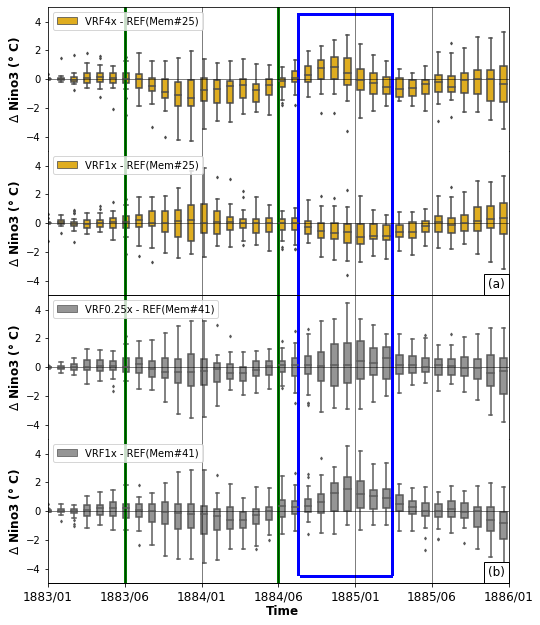

In [48]:
import seaborn as sns
n = 1883
fig = plt.figure(figsize=(8,10))

ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.2], xticklabels=[])
ax2 = fig.add_axes([0.1, 0.3, 0.8, 0.2], xticklabels=[])
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.2], xticklabels=[])
ax4 = fig.add_axes([0.1, 0.7, 0.8, 0.2], xticklabels=[])
flierprops = dict(markersize=2)

b = sns.boxplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF1x - REF(Mem#41)')], 
                 palette="Greys",
                 hue='type', flierprops = flierprops, width=0.5,ax=ax1)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")

b = sns.boxplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF0.25x - REF(Mem#41)')], 
                 palette="Greys",
                 hue='type', flierprops = flierprops, width=0.5,ax=ax2)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")


b = sns.boxplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF1x - REF(Mem#25)')], 
                 palette="Wistia",
                 hue='type', flierprops = flierprops, width=0.5,ax=ax3)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")


b = sns.boxplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF4x - REF(Mem#25)')], 
                 palette="Wistia",
                 hue='type', flierprops = flierprops, width=0.5, ax=ax4)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")

for ax in [ax1, ax2]:
    ax.legend(loc='upper left')
    ax.set_xlabel('')


t = ax1.text(33.8, -4.5,'(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax2.text(33.8, -4.5, '(c)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax3.text(33.8, -4.5,'(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax4.text(33.8, -4.5, '(a)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# #ax3.set_xticks([])
for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_ticklabels([])
    #ax.xaxis.grid(True)
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
ax1.axhline(y=-4.5, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
#ax1.axhline(y=3.05, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')

#ax2.axhline(y=-3.3, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')
ax4.axhline(y=4.5, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

ax1.axvline(x=19.2, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')
ax1.axvline(x=26.4, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')

ax4.axvline(x=19.2, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')
ax4.axvline(x=26.4, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')

for ax in [ax2, ax3]:
    ax.axvline(x=19.2, ymin=-3.28, ymax=1.0, linewidth=3, color = 'b')
    ax.axvline(x=26.4, ymin=-3.28, ymax=1.0, linewidth=3, color = 'b')

for ax in [ax1,ax2,ax3,ax4]:
    ax.axvline(x=5.9, ymin=-3, ymax=3,linewidth=3, color = 'g')
    #ax1.axvline(x=5.5, ymin=-3, ymax=3,linewidth=3, color = 'g')

    ax.axvline(x=5.5+2*6+0.2, ymin=-3, ymax=3,linewidth=3, color = 'g')
    #ax1.axvline(x=17.5, ymin=-3, ymax=3,linewidth=3, color = 'g')

#ax3.text(12,-4.5,'Krakatoa \n volcanic eruption', color='g', fontsize=14,horizontalalignment='center', weight='bold')

#ax3.text(23,-5,'Response \n +1 year \n after \n eruption', weight='bold',color='b', fontsize=14,horizontalalignment='center')

for ax in [ax1,ax2,ax3,ax4]:
    ax.xaxis.set_ticks_position('none') 
    ax.legend(loc='upper left')
    ax.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+0.4, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+6+0.3, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+2*6+0.2, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+3*6+0.1, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+4*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.set_xlabel('')
#ax2.xaxis.set_ticks_position('none') 

#for ax in [ax1,ax2]:
    #ax.yaxis.grid(True) 
    #ax.xaxis.grid(True)
for ax in [ax1,ax2, ax3, ax4]:
    ax.set_ylim([-5.0,5.0])
    ax.set_xlim([0,35.4])
#ax1.set_xlabel('Time', weight='bold', fontsize=12)
ax1.text(18.0, -7.2, 'Time', ha='center', weight='bold', fontsize=12)

ax1.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

#pl.savefig('fig5.png', format='png', dpi=1000)

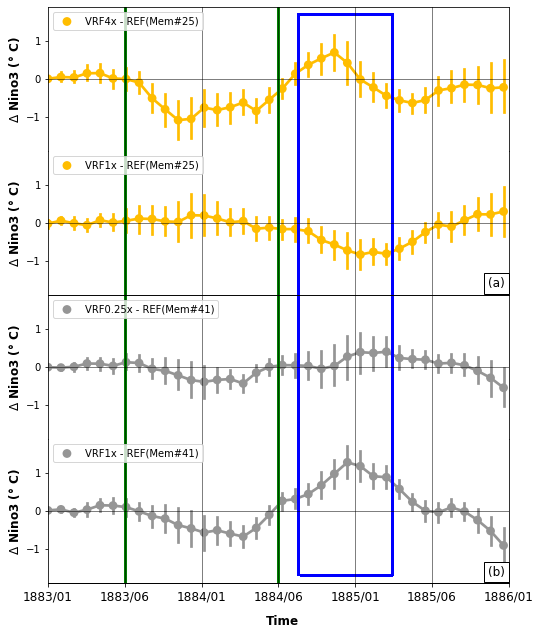

In [42]:
import seaborn as sns
n = 1883
fig = plt.figure(figsize=(8,10))

ax_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.2], xticklabels=[])
ax2 = fig.add_axes([0.1, 0.3, 0.8, 0.2], xticklabels=[])
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.2], xticklabels=[])
ax4 = fig.add_axes([0.1, 0.7, 0.8, 0.2], xticklabels=[])
flierprops = dict(markersize=2)

b = sns.pointplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF1x - REF(Mem#41)')], 
                 palette="Greys",
                 hue='type', flierprops = flierprops, width=0.5,ax=ax1)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")

b = sns.pointplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF0.25x - REF(Mem#41)')], 
                 palette="Greys",
                 hue='type', flierprops = flierprops, width=0.5,ax=ax2)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")


b = sns.pointplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF1x - REF(Mem#25)')], 
                 palette="Wistia",
                 hue='type', flierprops = flierprops, width=0.5,ax=ax3)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")


b = sns.pointplot(y='change_pi', x='Time', 
                 data=df_cng_vrf[(df_cng_vrf['type']=='VRF4x - REF(Mem#25)')], 
                 palette="Wistia",
                 hue='type', flierprops = flierprops, width=0.5, ax=ax4)
b.set_ylabel("$\Delta$ Nino3 (\N{DEGREE SIGN} C)",fontsize=12, weight="bold")

for ax in [ax1, ax2]:
    ax.legend(loc='upper left')
    ax.set_xlabel('')


t = ax1.text(33.8, -1.7,'(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax2.text(33.8, -4.5, '(c)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax3.text(33.8, -1.68,'(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# t = ax4.text(33.8, -4.5, '(a)', fontsize=12)
# t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

# #ax3.set_xticks([])
for ax in [ax1, ax2, ax3, ax4]:
    ax.xaxis.set_ticklabels([])
    #ax.xaxis.grid(True)
ax_.set_yticks([])
ax_.set_xticks(np.linspace(0,1,7))
ax_.set_xticklabels(['1883/01','1883/06', '1884/01','1884/06','1885/01','1885/06','1886/01'], fontsize=12)
ax1.axhline(y=-1.68, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
#ax1.axhline(y=3.05, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')

#ax2.axhline(y=-3.3, xmin=0.55, xmax=0.75, linewidth=3, color = 'r')
ax4.axhline(y=1.72, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

ax1.axvline(x=19.2, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')
ax1.axvline(x=26.4, ymin=0.061, ymax=3.05, linewidth=3, color = 'b')

ax4.axvline(x=19.2, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')
ax4.axvline(x=26.4, ymin=-3.28, ymax=0.95, linewidth=3, color = 'b')

for ax in [ax2, ax3]:
    ax.axvline(x=19.2, ymin=-3.28, ymax=1.0, linewidth=3, color = 'b')
    ax.axvline(x=26.4, ymin=-3.28, ymax=1.0, linewidth=3, color = 'b')

for ax in [ax1,ax2,ax3,ax4]:
    ax.axvline(x=5.9, ymin=-3, ymax=3,linewidth=3, color = 'g')
    #ax1.axvline(x=5.5, ymin=-3, ymax=3,linewidth=3, color = 'g')

    ax.axvline(x=5.5+2*6+0.2, ymin=-3, ymax=3,linewidth=3, color = 'g')
    #ax1.axvline(x=17.5, ymin=-3, ymax=3,linewidth=3, color = 'g')

#ax3.text(12,-4.5,'Krakatoa \n volcanic eruption', color='g', fontsize=14,horizontalalignment='center', weight='bold')

#ax3.text(23,-5,'Response \n +1 year \n after \n eruption', weight='bold',color='b', fontsize=14,horizontalalignment='center')

for ax in [ax1,ax2,ax3,ax4]:
    ax.xaxis.set_ticks_position('none') 
    ax.legend(loc='upper left')
    ax.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+0.4, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+6+0.3, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+2*6+0.2, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+3*6+0.1, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+4*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.set_xlabel('')
#ax2.xaxis.set_ticks_position('none') 

#for ax in [ax1,ax2]:
    #ax.yaxis.grid(True) 
    #ax.xaxis.grid(True)
for ax in [ax1,ax2, ax3, ax4]:
    ax.set_ylim([-1.9,1.9])
    ax.set_xlim([0,35.4])
#ax1.set_xlabel('Time', weight='bold', fontsize=12)
ax1.text(18.0, -3., 'Time', ha='center', weight='bold', fontsize=12)

ax1.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)

pl.savefig('fig5_review.png', format='png', dpi=1000)

In [45]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==7].median()

Nino3        0.090386
Time         7.000000
change_pi   -0.013228
dtype: float64

In [44]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==11].mean()

Nino3        -0.529125
Time         11.000000
change_pi    -1.047796
dtype: float64

In [46]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==11+7].median()

Nino3        -0.365496
Time         18.000000
change_pi    -0.160636
dtype: float64

In [65]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==11+8].median()

Nino3         0.052232
Time         19.000000
change_pi     0.056807
dtype: float64

In [80]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==11+12].median()

Nino3         0.338266
Time         23.000000
change_pi     0.421307
dtype: float64

In [73]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==11+11].median()

Nino3         0.792097
Time         22.000000
change_pi     0.871920
dtype: float64

In [45]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==11+11].mean()

Nino3         0.476606
Time         22.000000
change_pi     0.703262
dtype: float64

In [78]:
df_cng_vrf[df_cng_vrf['type']=='VRF4x - REF(Mem#25)'][df_cng_vrf['Time']==11].median()

Nino3        -0.604243
Time         11.000000
change_pi    -1.303345
dtype: float64

In [82]:
df_cng_vrf[df_cng_vrf['type']=='VRF1x - REF(Mem#25)'][df_cng_vrf['Time']==11+9].median()

Nino3        -0.276063
Time         20.000000
change_pi    -0.239574
dtype: float64

In [47]:
df_cng_vrf[df_cng_vrf['type']=='VRF1x - REF(Mem#25)'][df_cng_vrf['Time']==11+12+1].mean()

Nino3        -0.915582
Time         24.000000
change_pi    -0.830394
dtype: float64

In [84]:
df_cng_vrf[df_cng_vrf['type']=='VRF1x - REF(Mem#25)'][df_cng_vrf['Time']==11+12+8].median()

Nino3        -0.429708
Time         31.000000
change_pi    -0.118042
dtype: float64

In [92]:
df_cng_vrf[df_cng_vrf['type']=='VRF1x - REF(Mem#25)'][df_cng_vrf['Time']==11+12+1].median()

Nino3        -0.879398
Time         24.000000
change_pi    -0.980241
dtype: float64

In [100]:
df_cng_vrf[df_cng_vrf['type']=='VRF1x - REF(Mem#41)'][df_cng_vrf['Time']==11+12+5].median()

Nino3         0.119885
Time         28.000000
change_pi     0.264967
dtype: float64

In [105]:
df_cng_vrf[df_cng_vrf['type']=='VRF1x - REF(Mem#41)'][df_cng_vrf['Time']==11+12].median()

Nino3         1.370379
Time         23.000000
change_pi     1.512725
dtype: float64

In [48]:
df_cng_vrf[df_cng_vrf['type']=='VRF1x - REF(Mem#41)'][df_cng_vrf['Time']==11+12].mean()

Nino3         1.364067
Time         23.000000
change_pi     1.288797
dtype: float64

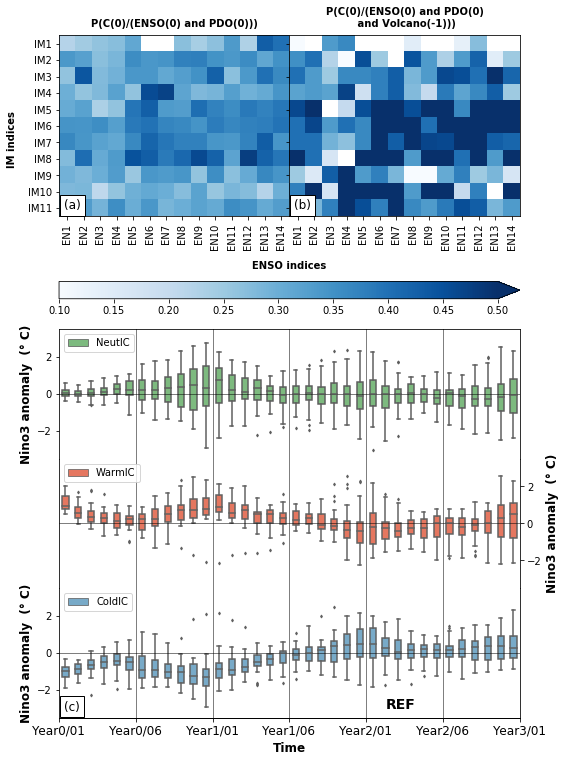

In [50]:
from load_data_state_of_system_review_pi import *
import seaborn as sns
import matplotlib.ticker as ticker
volc_aod_10 = np.genfromtxt('krakatoa_volc_1883_1885.txt', delimiter=",", dtype=None)
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')
p_coupling_paleo_pdo = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_pdo = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')
time = np.arange(36)

n = 1883
fig = plt.figure(figsize=(8.0,12))
#ax1 = fig.add_axes([0.1, 0.43, 0.8, 0.08],
                   #xticklabels=[])
#ax2 = fig.add_axes([0.1, 0.05+0.1, 0.8, 0.1], xticklabels=[])
#ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.1])
ax8_ = fig.add_axes([0.1, 0.1, 0.8, 0.0])
#ax1_ = fig.add_axes([0.1, 0.43, 0.8, 0.0])

ax4 = fig.add_axes([0.1, 0.515+0.07, 0.4, 0.4])
ax5 = fig.add_axes([0.5, 0.515+0.07, 0.4, 0.4], yticklabels=[])

#ax6 = fig.add_axes([0.1, 0.05+0.1+0.1, 0.8, 0.1], xticklabels=[])
#ax7 = fig.add_axes([0.1, 0.05+0.1+0.2, 0.8, 0.1], xticklabels=[])
ax8 = fig.add_axes([0.1, 0.1, 0.8, 0.15], xticklabels=[])
ax9 = fig.add_axes([0.1, 0.1+0.15, 0.8, 0.15], xticklabels=[])
ax10 = fig.add_axes([0.1, 0.1+2*0.15, 0.8, 0.15], xticklabels=[])

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

im = ax4.imshow(p_coupling_paleo_pdo, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax4.set_title('(ENSO(0) and PDO(0))')
fig.text(0.3, 0.9, 'P(C(0)/(ENSO(0) and PDO(0)))', ha='center', weight='bold')

im = ax5.imshow(p_coupling_st_volc_paleo_pdo, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
#ax5.set_title('(ENSO(0) and PDO(0) \n and Volcano(-1))')
fig.text(0.7, 0.9, 'P(C(0)/(ENSO(0) and PDO(0)\n and Volcano(-1)))', ha='center', weight='bold')
for ax in [ax4,ax5]:
    ax.set_xticks(ticks=np.arange(14))
ax4.set_yticks(ticks=np.arange(11))

fig.text(0.5, 0.53+0.03+0.06, 'ENSO indices', ha='center', weight='bold')
fig.text(0.01, 0.8-0.08+0.05, 'IM indices', va='center', rotation='vertical', weight='bold')
    
cbar_ax = fig.add_axes([0.1, 0.585, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)
#fig.text(0.5, 0.635-0.16+0.14-0.12+0.02+0.07, 'Probability of ENSO-IM Coupling \n (at year 0 relative to volcano in year -1) [P(C(0))]', ha='center')

###############################
df = pd.DataFrame(columns=['Nino3 (\N{DEGREE SIGN} C)', 'time', 'type'])

count = 0

for i in range(c_sst.shape[0]):
    for j in range(c_sst.shape[1]):
        df.loc[count] = [c_sst[i,j], j, 'ColdIC']
        count = count + 1
        
for i in range(w_sst.shape[0]):
    for j in range(w_sst.shape[1]):
        df.loc[count] = [w_sst[i,j], j, 'WarmIC']
        count = count + 1

for i in range(n_sst.shape[0]):
    for j in range(n_sst.shape[1]):
        df.loc[count] = [n_sst[i,j], j, 'NeutIC']
        count = count + 1

flierprops = dict(markersize=2)
b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', \
                 data=df[df['type']=='ColdIC'], \
                 palette="Blues", \
                 hue='type', width=0.5, flierprops=flierprops, ax=ax8) 

b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', \
                 data=df[df['type']=='WarmIC'], \
                 palette="Reds", \
                 hue='type', width=0.5, flierprops=flierprops,ax=ax9) 

b = sns.boxplot(y='Nino3 (\N{DEGREE SIGN} C)', x='time', \
                 data=df[df['type']=='NeutIC'], \
                 palette="Greens", \
                 hue='type', width=0.5, flierprops=flierprops,ax=ax10) 

#b.set_ylabel("Nino3",fontsize=12, weight="bold")

df_volc = pd.DataFrame(columns=['AOD', 'time'])
count = 0
for i in range(time.shape[0]):
    df_volc.loc[count] = [volc_aod_10[i], time[i]/12+n]
    count = count + 1
#sns.lineplot(x="time", y="AOD", data=df_volc, ax=ax1)
    
#ax1.plot(time/12+n,volc_aod_10)
#ax1.xaxis.grid(True)

#ax1.set_ylabel("AOD", weight="bold")


ax4.set_xticklabels(xticklabels, rotation=90)
ax5.set_xticklabels(xticklabels, rotation=90)
ax4.set_yticklabels(yticklabels)



t = ax4.text(-0.2, 10.05,'(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax5.text(-0.2, 10.05, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = ax8.text(-0.08, 3.0, '(d)', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#t = ax8.text(-0.08, 5.67, '(c)', fontsize=12)
#t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = ax8.text(-0.08, -3.1, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

#ax8.text(9,-5,'100 control simulations,\n 50 cold IC + 50 warm IC', fontsize=12, weight="bold")
#fig.text(0.028, 0.11+0.08+0.1, 'Nino3 Anomaly', fontsize=12, rotation=90)

#for ax in [ax4]:
for label in (ax4.get_xticklabels() + ax4.get_yticklabels()+ ax5.get_xticklabels()):
    label.set_fontsize(10)
    
for ax in [ax8, ax9, ax10]:
    ax.set(xticklabels=[])
for ax in [ax8, ax9, ax10]:
    ax.set_ylabel('')    
    ax.set_xlabel('')
    #ax.yaxis.grid(True) 
    #ax.xaxis.grid(True)
    ax.legend(loc='upper left')
    ax.set(ylim=(-3.5, 3.5))
    ax.set_ylabel('Nino3 anomaly  (\N{DEGREE SIGN} C)', fontsize=12, weight='bold')
    #ax.legend(loc="lower left", bbox_to_anchor=(1,1))
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_ticks([])
    ax.axhline(y=0.0, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'k')
    ax.axvline(x=5.5, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+2*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+3*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    ax.axvline(x=5.5+4*6, ymin=-3, ymax=3,linewidth=0.5, color = 'k')
    
# ax1.margins(0)
# ax1.set_xlabel('')
# ax1.set_ylabel('AOD', weight='bold', fontsize=12)
# ax1.yaxis.grid(True) 
# ax1.xaxis.grid(True)
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(1/12))

#ax3.set_xticks([])

#ax8.xaxis.grid(True)
#ax8.xaxis.set_major_locator(ticker.MultipleLocator(1/12))
for ax in [ax8_]:
    ax.set_yticks([])
    ax.set_xticks(np.linspace(0,1,7))
    ax.set_xticklabels(['Year0/01','Year0/06', 'Year1/01','Year1/06','Year2/01','Year2/06','Year3/01'], fontsize=12)
    ax.set_xlabel('Time', fontsize=12, weight='bold')
ax8.xaxis.set_ticks_position('none') 

ax8.spines['top'].set_visible(False)
ax9.spines['bottom'].set_visible(False)

ax9.spines['top'].set_visible(False)
ax10.spines['bottom'].set_visible(False)
ax9.yaxis.tick_right()

ax9.set_ylabel('')
ax9.set_ylabel('Nino3 anomaly  (\N{DEGREE SIGN} C)', fontsize=12, weight='bold', rotation=90)
ax9.yaxis.set_label_position("right")
ax9.legend(loc='upper left')
ax8.text(25,-3.0,'REF', fontsize=14, weight='bold')
# ax1.xaxis.set_ticks_position('none') 
# ax1.set_xlabel('')
# ax1.set(ylim=(0.0, 0.25))
# ax1_.set_xlabel('')


# ax8.axhline(y=3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')
# ax8.axhline(y=-3.0, xmin=0.55, xmax=0.745, linewidth=3, color = 'b')

# ax8.axvline(x=19.2, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')
# ax8.axvline(x=26.4, ymin=0.075, ymax=0.92, linewidth=3, color = 'b')

# ax8.text(23,-2.8,'Response \n +1 year \n after \n eruption', color='b', fontsize=14,horizontalalignment='center')
# ax8.axvline(x=6, ymin=-3, ymax=3,linewidth=3, color = 'r')


# ax8.axvline(x=18, ymin=-3, ymax=3,linewidth=3, color = 'r')

pl.savefig('fig3.png', format='png', dpi=1000)

In [7]:
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [76]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_4x.nc"
ds_sst_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_control_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_control_4x.nc"
ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_4x.nc"
ds_pr_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_rsdscs_rsuscs_tas_4x_minus_control.nc"
ds_flux = xr.open_dataset(dir_)

ds_sfc = ds_flux.rsdscs - ds_flux.rsuscs

tas_4x = ds_flux.tas.isel(time=slice(23,36)).mean(dim='time')
sst_diff = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

sst_tas = sst_diff
for i in range(sst_diff.shape[0]):
    for j in range(sst_diff.shape[1]):
        if np.isnan(sst_diff.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff.xt_ocean.values[j]>0:
                sst_tas[i,j] = tas_4x.sel(lat=sst_diff.yt_ocean.values[i], lon=sst_diff.xt_ocean.values[j], method='nearest')
            else:
                sst_tas[i,j] = tas_4x.sel(lat=sst_diff.yt_ocean.values[i], lon=sst_diff.xt_ocean.values[j]+360, method='nearest')



In [77]:
import xesmf as xe
pr_diff_interp = xr.Dataset({'lat': (['lat'], np.arange(88.5, -88.5, -0.25)),
                     'lon': (['lon'], np.arange(-150, 210, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff, pr_diff_interp, 'bilinear')
regridder.clean_weight_file()
pr_diff_interp = regridder(pr_diff)
ds_sfc_interp = regridder(ds_sfc)
#sst_tas_interp = regridder(sst_tas)
#print(pr_diff_interp)

NameError: name 'pr_diff' is not defined

In [ ]:
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point

sst_diff1 = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_control_4x.sst.isel(time=slice(23,36)).mean(dim='time')

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))



im3 = sst_tas.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=0.6, cmap='seismic',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff = ds_pr_4x.pr.isel(time=slice(30,33)).mean(dim='time') - ds_pr_control_4x.pr.isel(time=slice(30,33)).mean(dim='time')
pr_diff = pr_diff*86400
im2 = pr_diff_interp.sel(lat=slice(45,-10)).plot(vmin=-10,vmax=10,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = ds_sfc_interp.sel(lat=slice(45,-10)).isel(time=slice(30,33)).mean(dim='time').plot(vmin=-10, vmax=10, cmap='seismic',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585, '(b) Precipitation', size='large', weight='bold')
fig.text(0.1,0.865, '(a) SST+SAT', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
#     gl.ylines = True
#     gl.xlines = True    
plt.savefig('fig6.png', format='png', dpi=1000)

In [ ]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import xesmf as xe

############### 1x control and PI ##################

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/anom_mon_sst_1x.nc"
ds_sst_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/anom_sst_pi_1x.nc"
ds_sst_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/anom_mon_pr_1x.nc"
ds_pr_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/anom_pr_pi_1x.nc"
ds_pr_pi = xr.open_dataset(dir_)


dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsdscs_atm_mon_1x.nc"
ds_rsdscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsuscs_atm_mon_1x.nc"
ds_rsuscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsuscs_pi_1x_anom.nc"
ds_rsuscs_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsdscs_pi_1x_anom.nc"
ds_rsdscs_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/tas_atm_mon_1x.nc"
ds_tas_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/tas_pi_1x.nc"
ds_tas_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

#####################  4x #################
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_4x.nc"
ds_sst_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_control_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/rsdscs_4x.nc"
ds_rsdscs_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/rsuscs_4x.nc"
ds_rsuscs_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/tas_4x.nc"
ds_tas_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_sst_pi_control_4x.nc"
ds_sst_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_control_4x.nc"
ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_4x.nc"
ds_pr_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_pr_pi_control_4x.nc"
ds_pr_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsdscs_pi_control_4x.nc"
ds_rsdscs_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsuscs_pi_control_4x.nc"
ds_rsuscs_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/tas_pi_control_4x.nc"
ds_tas_pi_4x = xr.open_dataset(dir_)

################# 1/4x ####################

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/anom_sst_025x.nc"
ds_sst_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/anom_sst_025x.nc"
ds_sst_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsdscs_025x.nc"
ds_rsdscs_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsuscs_025x.nc"
ds_rsuscs_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/tas_025x.nc"
ds_tas_025x = xr.open_dataset(dir_)


dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/anom_pr_025x.nc"
ds_pr_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/anom_pr_025x.nc"
ds_pr_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/anom_sst_pi_control_025x.nc"
ds_sst_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/anom_pr_pi_control_025x.nc"
ds_pr_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsdscs_pi_control_025x.nc"
ds_rsdscs_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsuscs_pi_control_025x.nc"
ds_rsuscs_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/tas_pi_control_025x.nc"
ds_tas_pi_025x = xr.open_dataset(dir_)

In [80]:
import xarray as xr
import xesmf as xe


dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/anom_mon_sst_1x.nc"
ds_sst_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/anom_sst_pi_1x.nc"
ds_sst_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsdscs_atm_mon_1x.nc"
ds_rsdscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsuscs_atm_mon_1x.nc"
ds_rsuscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/anom_mon_pr_1x.nc"
ds_pr_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/anom_pr_pi_1x.nc"
ds_pr_pi = xr.open_dataset(dir_)


dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsdscs_atm_mon_1x.nc"
ds_rsdscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsuscs_atm_mon_1x.nc"
ds_rsuscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsuscs_pi_1x_anom.nc"
ds_rsuscs_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsdscs_pi_1x_anom.nc"
ds_rsdscs_pi = xr.open_dataset(dir_)


sfc_control = ds_rsdscs_control.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_control.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsuscs_pi_1x_anom.nc"
ds_rsuscs_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsdscs_pi_1x_anom.nc"
ds_rsdscs_pi = xr.open_dataset(dir_)
sfc_pi = ds_rsdscs_pi.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_pi.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

sfc_clim = ds_rsdscs_clim.rsdscs.isel(time=slice(6,9)).mean(dim='time') - ds_rsuscs_clim.rsuscs.isel(time=slice(6,9)).mean(dim='time')

ds_out = xr.Dataset({'lat': (['lat'], sfc_clim.lat.values),
                     'lon': (['lon'], sfc_clim.lon.values)})
regridder = xe.Regridder(sfc_control, ds_out, 'bilinear')
regridder.clean_weight_file()
sfc_ = regridder(sfc_control)
sfc_control_anom = sfc_ - sfc_clim

sfc_anom_wrt_pi = sfc_control_anom - sfc_pi

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/tas_atm_mon_1x.nc"
ds_tas_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/tas_pi_1x.nc"
ds_tas_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

ds_tas_control_ = regridder(ds_tas_control)



Create weight file: bilinear_94x192_94x192.nc
Remove file bilinear_94x192_94x192.nc
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.


In [81]:
import numpy as np
tas_control_anom_np = np.zeros((ds_tas_control_.tas.values.shape))
for i in range(tas_control_anom_np.shape[0]):
    tas_control_anom_np[i,:,:] = ds_tas_control_.tas.values[i,:,:] - ds_tas_clim.tas.values[i%12]

In [82]:
ds_tas_control_['tas_anom'] = (('time', 'lat', 'lon'), tas_control_anom_np)

In [83]:
tas_diff = ds_tas_control_.tas_anom.isel(time=slice(19,24)).mean(dim='time') - ds_tas_pi.tas.isel(time=slice(19,24)).mean(dim='time')
sst_diff = ds_sst_control.sst.isel(time=slice(19,24)).mean(dim='time') - ds_sst_pi.sst.isel(time=slice(19,24)).mean(dim='time')

sst_tas = sst_diff
for i in range(sst_diff.shape[0]):
    for j in range(sst_diff.shape[1]):
        if np.isnan(sst_diff.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff.xt_ocean.values[j]>0:
                sst_tas[i,j] = tas_diff.sel(lat=sst_diff.yt_ocean.values[i], lon=sst_diff.xt_ocean.values[j], method='nearest')
            else:
                sst_tas[i,j] = tas_diff.sel(lat=sst_diff.yt_ocean.values[i], lon=sst_diff.xt_ocean.values[j]+360, method='nearest')


In [84]:
# ds_out = xr.Dataset({'lat': (['lat'], ds_sfc_pi.lat.values),
#                      'lon': (['lon'], ds_sfc_pi.lon.values)})
# regridder = xe.Regridder(ds_sfc_control, ds_out, 'bilinear')
# regridder.clean_weight_file()
# ds_sfc_control_o = regridder(ds_sfc_control)
# ds_sfc = ds_sfc_control_o - ds_sfc_pi

Overwrite existing file: bilinear_94x192_708x1436.nc 
 You can set reuse_weights=True to save computing time.


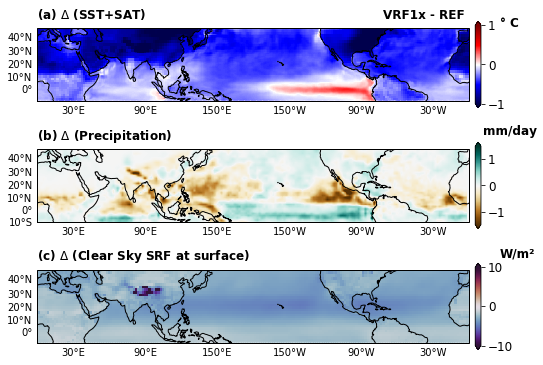

In [85]:
# VRF1x - PI
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))

im3 = sst_tas.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=1.0, cmap='seismic',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff = ds_pr_control.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
pr_diff = pr_diff*86400

pr_diff_interp = xr.Dataset({'lat': (['lat'], np.arange(-88.5, 88.5, 0.25)),
                     'lon': (['lon'], np.arange(0, 359, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff, pr_diff_interp, 'bilinear')
pr_diff_interp = regridder(pr_diff)
# sfc_anom_wrt_pi_interp = regridder(sfc_anom_wrt_pi)

im2 = pr_diff_interp.sel(lat=slice(-10,45)).plot(vmin=-1.5,vmax=1.5,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = sfc_anom_wrt_pi.sel(lat=slice(-10,45)).plot(vmin=-10, vmax=10,cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) $\Delta$ (Clear Sky SRF at surface)', size='large', weight='bold')
fig.text(0.1,0.585, '(b) $\Delta$ (Precipitation)', size='large', weight='bold')
fig.text(0.1,0.865, '(a) $\Delta$ (SST+SAT)', size='large', weight='bold')
fig.text(0.7,0.865, 'VRF1x - REF', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    


Overwrite existing file: bilinear_94x192_708x1436.nc 
 You can set reuse_weights=True to save computing time.


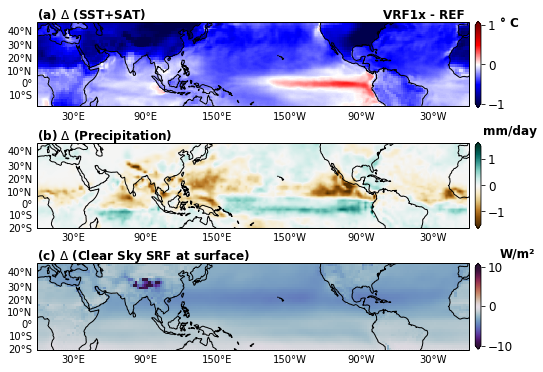

In [184]:
# VRF1x - PI
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))

im3 = sst_tas.sel(yt_ocean=slice(-20,45)).plot(vmin=-1.0, vmax=1.0, cmap='seismic',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff = ds_pr_control.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
pr_diff = pr_diff*86400

pr_diff_interp = xr.Dataset({'lat': (['lat'], np.arange(-88.5, 88.5, 0.25)),
                     'lon': (['lon'], np.arange(0, 359, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff, pr_diff_interp, 'bilinear')
pr_diff_interp = regridder(pr_diff)
# sfc_anom_wrt_pi_interp = regridder(sfc_anom_wrt_pi)

im2 = pr_diff_interp.sel(lat=slice(-20,45)).plot(vmin=-1.5,vmax=1.5,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = sfc_anom_wrt_pi.sel(lat=slice(-20,45)).plot(vmin=-10, vmax=10,cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) $\Delta$ (Clear Sky SRF at surface)', size='large', weight='bold')
fig.text(0.1,0.585, '(b) $\Delta$ (Precipitation)', size='large', weight='bold')
fig.text(0.1,0.865, '(a) $\Delta$ (SST+SAT)', size='large', weight='bold')
fig.text(0.7,0.865, 'VRF1x - REF', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    


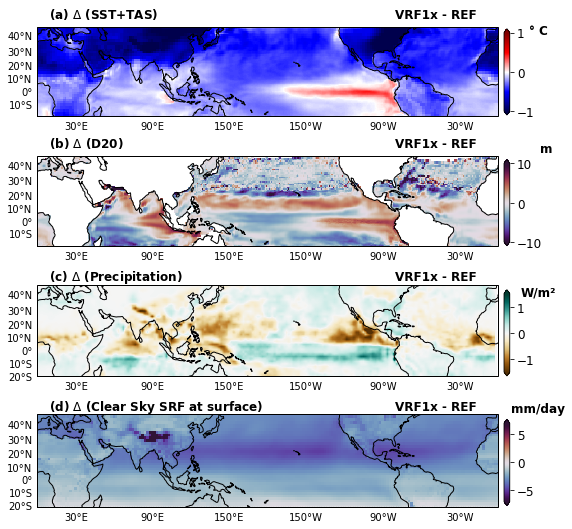

In [188]:
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/d20_temp_ocean_1x_mon_minus_pi.nc"
ds_d20 = xr.open_dataset(dir_)
d20_diff = ds_d20.D20.isel(TIME=slice(18,26)).mean(dim='TIME')

import matplotlib.patches as patches
fig = plt.figure(figsize=(8,8))
# ax1 = fig.add_axes([0.1,0.0375+0.045*5,0.8,0.15],projection=ccrs.Mercator(180))
# ax2 = fig.add_axes([0.1,0.025+0.15+0.015+0.03*4,0.8,0.15],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.08,0.05,0.8,0.225],projection=ccrs.Mercator(180))
ax4 = fig.add_axes([0.08,0.275,0.8,0.225],projection=ccrs.Mercator(180))
ax5 = fig.add_axes([0.08,0.5,0.8,0.225],projection=ccrs.Mercator(180))
ax6 = fig.add_axes([0.08,0.5+0.225,0.8,0.225],projection=ccrs.Mercator(180))

im6 = sst_tas.sel(yt_ocean=slice(-20,45)).plot(vmin=-1.0, vmax=1.0, cmap='seismic',ax=ax6, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())
im5 = d20_diff.sel(YT_OCEAN=slice(-20,45)).plot(vmin=-10,vmax=10,cmap='twilight_shifted',ax=ax5, add_colorbar=False, transform=ccrs.PlateCarree())

#im4 = sfc_4x_anom_wrt_pi_4x_interp.sel(lat=slice(-10,45)).plot(vmin=-20,vmax=20,cmap='twilight_shifted',extend='both', ax=ax4, add_colorbar=False, transform=ccrs.PlateCarree())
im4 = pr_diff_interp.sel(lat=slice(-20,45)).plot(vmin=-1.5, vmax=1.5, cmap='BrBG',ax=ax4, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())
im3 = sfc_anom_wrt_pi.sel(lat=slice(-20,45)).plot(vmin=-7, vmax=7,cmap='twilight_shifted',extend='both', ax=ax3, add_colorbar=False, transform=ccrs.PlateCarree())

#im1 = sfc_025x_anom_wrt_pi_025x.sel(lat=slice(-10,45)).plot(vmin=-20,vmax=20,cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())

for ax in [ ax3,ax4,ax5,ax6]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

# cax4 = fig.add_axes([0.86+0.05, 0.025+3*0.15+3*0.03-0.023+0.03*2, 0.01, 0.15])
# cb4 = fig.colorbar(im4, extend='both', cax=cax4)

# cb4.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
# cb4.ax.tick_params(labelsize='large')

cax5 = fig.add_axes([0.86+0.03, 0.025+4*0.15+4*0.03-0.035+0.03-0.205, 0.01, 0.15])
cb5 = fig.colorbar(im5, extend='both', cax=cax5)

cb5.set_label(label='m', size='large', weight='bold', y=1.2, rotation=0)
cb5.ax.tick_params(labelsize='large')

cax6 = fig.add_axes([0.86+0.03, 0.025+5*0.15+5*0.03-0.048-0.115, 0.01, 0.15])
cb6 = fig.colorbar(im6, extend='both', cax=cax6)

cb6.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb6.ax.tick_params(labelsize='large')
#cb6.set_ticks([-1.0,0.0,0.8])
# cax1 = fig.add_axes([0.86+0.05, 0.025+0.024+0.03*5, 0.01, 0.1])
# cb1 = fig.colorbar(im1, extend='both', cax=cax1)

# cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
# cb1.ax.tick_params(labelsize='large')

cax4 = fig.add_axes([0.86+0.03, 0.025+0.15+0.015+0.024+0.03*4-0.25, 0.01, 0.15])
cb4 = fig.colorbar(im3, extend='both', cax=cax4)

cb4.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb4.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86+0.03, 0.025+2*0.15+2*0.015+0.024+0.03*3-0.16, 0.01, 0.15])
cb3 = fig.colorbar(im4, extend='both', cax=cax3)

cb3.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')


#fig.text(0.1,0.307+0.12*3+0.03*2-0.015, '(c) $\Delta$ Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.307+0.12*3+0.03*2-0.02, '(b) $\Delta$ (D20)', size='large', weight='bold')
fig.text(0.1,0.865+0.12-0.005-0.05, '(a) $\Delta$ (SST+TAS)', size='large', weight='bold')

fig.text(0.7,0.865+0.12-0.005-0.05, 'VRF1x - REF', size='large', weight='bold')
#fig.text(0.7,0.585+0.12*2+0.02, 'VRF4x - REF', size='large', weight='bold')
fig.text(0.7,0.307+0.12*3+0.03*2-0.02, 'VRF1x - REF', size='large', weight='bold')

#fig.text(0.1,0.307-0.12+0.02*5+0.02, '(f) $\Delta$ Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585-0.12*2+0.02*4+0.015-0.19, '(d) $\Delta$ (Clear Sky SRF at surface)', size='large', weight='bold')
fig.text(0.1,0.865-0.12*3+0.02*3+0.01-0.1, '(c) $\Delta$ (Precipitation)', size='large', weight='bold')

#fig.text(0.7,0.865-0.12*3+0.02*3+0.01, 'VRF0.25x - REF', size='large', weight='bold')
fig.text(0.7,0.865-0.12*3+0.02*3+0.01-0.1, 'VRF1x - REF', size='large', weight='bold')
fig.text(0.7,0.585-0.12*2+0.02*4+0.015-0.19, 'VRF1x - REF', size='large', weight='bold')

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    
#ax1.axvline(x=-100, ymin=-3, ymax=10,linewidth=2.0, color = 'k')
plt.savefig('fig6_review.png', format='png', dpi=1000)

# New files

In [87]:
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import xesmf as xe

############### 1x control and PI ##################

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/anom_mon_sst_1x.nc"
ds_sst_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/anom_sst_pi_1x.nc"
ds_sst_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/anom_mon_pr_1x.nc"
ds_pr_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/anom_pr_pi_1x.nc"
ds_pr_pi = xr.open_dataset(dir_)


dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsdscs_atm_mon_1x.nc"
ds_rsdscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/rsuscs_atm_mon_1x.nc"
ds_rsuscs_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsuscs_pi_1x_anom.nc"
ds_rsuscs_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/rsdscs_pi_1x_anom.nc"
ds_rsdscs_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/tas_atm_mon_1x.nc"
ds_tas_control = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/1x/tas_pi_1x.nc"
ds_tas_pi = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

#####################  4x #################
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_4x.nc"
ds_sst_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_sst_control_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/rsdscs_rsusds_tas_4x.nc"
ds_rsdscs_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/rsdscs_rsusds_tas_4x.nc"
ds_rsuscs_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/rsdscs_rsusds_tas_4x.nc"
ds_tas_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_sst_pi_control_4x.nc"
ds_sst_pi_4x = xr.open_dataset(dir_)

# dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_control_4x.nc"
# ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/anom_mon_pr_4x.nc"
ds_pr_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_pr_pi_control_4x.nc"
ds_pr_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsdscs_pi_control_4x.nc"
ds_rsdscs_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsuscs_pi_control_4x.nc"
ds_rsuscs_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/tas_pi_control_4x.nc"
ds_tas_pi_4x = xr.open_dataset(dir_)

# ################# 1/4x ####################

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/anom_sst_025x.nc"
ds_sst_025x = xr.open_dataset(dir_)

# dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/rsdscs_rsusds_tas_025x.nc"
# ds_sst_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsdscs_rsusds_tas_025x.nc"
ds_rsdscs_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsdscs_rsusds_tas_025x.nc"
ds_rsuscs_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsdscs_rsusds_tas_025x.nc"
ds_tas_025x = xr.open_dataset(dir_)


# dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/anom_pr_025x.nc"
# ds_pr_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/anom_pr_025x.nc"
ds_pr_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/anom_sst_pi_control_025x.nc"
ds_sst_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/anom_pr_pi_control_025x.nc"
ds_pr_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsdscs_pi_control_025x.nc"
ds_rsdscs_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsuscs_pi_control_025x.nc"
ds_rsuscs_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/tas_pi_control_025x.nc"
ds_tas_pi_025x = xr.open_dataset(dir_)

In [88]:
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
import xesmf as xe

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/rsdscs_rsusds_tas_4x.nc"
ds_rsdscs_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/rsdscs_rsusds_tas_4x.nc"
ds_rsuscs_4x = xr.open_dataset(dir_)

sfc_4x = ds_rsdscs_4x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_4x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsuscs_pi_control_4x.nc"
ds_rsuscs_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsdscs_pi_control_4x.nc"
ds_rsdscs_pi_4x = xr.open_dataset(dir_)
sfc_pi_4x = ds_rsdscs_pi.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_pi.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

sfc_clim = ds_rsdscs_clim.rsdscs.isel(time=slice(6,9)).mean(dim='time') - ds_rsuscs_clim.rsuscs.isel(time=slice(6,9)).mean(dim='time')

ds_out = xr.Dataset({'lat': (['lat'], sfc_clim.lat.values),
                     'lon': (['lon'], sfc_clim.lon.values)})
regridder = xe.Regridder(sfc_4x, ds_out, 'bilinear')
regridder.clean_weight_file()
sfc_4x_ = regridder(sfc_4x)
sfc_4x_anom = sfc_4x_ - sfc_clim

sfc_4x_anom_wrt_pi_4x = sfc_4x_anom - sfc_pi_4x

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/4x/tas_4x.nc"
ds_tas_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/tas_pi_control_4x.nc"
ds_tas_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

ds_tas_4x_ = regridder(ds_tas_4x)
ds_pr_4x_ = regridder(ds_pr_4x)


tas_4x_anom_np = np.zeros((ds_tas_4x_.tas.values.shape))
for i in range(tas_4x_anom_np.shape[0]):
    tas_4x_anom_np[i,:,:] = ds_tas_4x_.tas.values[i,:,:] - ds_tas_clim.tas.values[i%12]

ds_tas_4x_['tas_anom'] = (('time', 'lat', 'lon'), tas_4x_anom_np)
tas_diff_4x = ds_tas_4x_.tas.isel(time=slice(23,36)).mean(dim='time') - ds_tas_pi_4x.tas.isel(time=slice(23,36)).mean(dim='time')
sst_diff_4x = ds_sst_4x.sst.isel(time=slice(23,36)).mean(dim='time') - ds_sst_pi_4x.sst.isel(time=slice(23,36)).mean(dim='time')

sst_tas_4x = sst_diff_4x
for i in range(sst_diff_4x.shape[0]):
    for j in range(sst_diff_4x.shape[1]):
        if np.isnan(sst_diff_4x.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff_4x.xt_ocean.values[j]>0:
                sst_tas_4x[i,j] = tas_diff_4x.sel(lat=sst_diff_4x.yt_ocean.values[i], lon=sst_diff_4x.xt_ocean.values[j], method='nearest')
            else:
                sst_tas_4x[i,j] = tas_diff_4x.sel(lat=sst_diff_4x.yt_ocean.values[i], lon=sst_diff_4x.xt_ocean.values[j]+360, method='nearest')



Create weight file: bilinear_94x192_94x192.nc
Remove file bilinear_94x192_94x192.nc
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


Overwrite existing file: bilinear_94x192_708x1436.nc 
 You can set reuse_weights=True to save computing time.


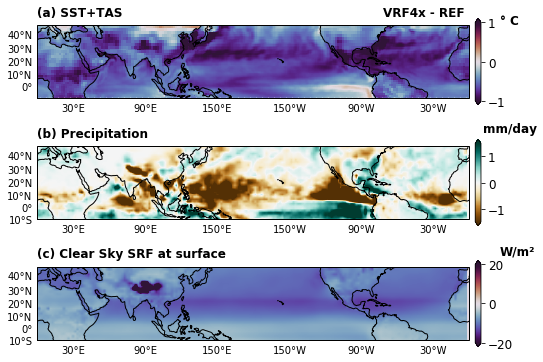

In [89]:
# 4x - PI
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))

pr_diff_4x = ds_pr_4x_.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_4x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
pr_diff_4x = pr_diff_4x*86400

pr_diff_4x_interp = xr.Dataset({'lat': (['lat'], np.arange(-88.5, 88.5, 0.25)),
                     'lon': (['lon'], np.arange(0, 359, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff_4x, pr_diff_4x_interp, 'bilinear')
pr_diff_4x_interp = regridder(pr_diff_4x)
sfc_4x_anom_wrt_pi_4x_interp = regridder(sfc_4x_anom_wrt_pi_4x)
#sst_tas_4x_interp = regridder(sst_tas_4x)

im3 = sst_tas_4x.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=1.0, cmap='twilight_shifted',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff_4x = ds_pr_4x_.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_4x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
pr_diff_4x = pr_diff_4x*86400



im2 = pr_diff_4x_interp.sel(lat=slice(-10,45)).plot(vmin=-1.5, vmax=1.5, cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = sfc_4x_anom_wrt_pi_4x_interp.sel(lat=slice(-10,45)).plot(vmin=-20,vmax=20,cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585, '(b) Precipitation', size='large', weight='bold')
fig.text(0.1,0.865, '(a) SST+TAS', size='large', weight='bold')
fig.text(0.7,0.865, 'VRF4x - REF', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    


In [90]:
import xarray as xr
import xesmf as xe
import warnings
warnings.filterwarnings('ignore')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsdscs_rsusds_tas_025x.nc"
ds_rsdscs_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsdscs_rsusds_tas_025x.nc"
ds_rsuscs_025x = xr.open_dataset(dir_)

sfc_025x = ds_rsdscs_025x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_025x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsuscs_pi_control_025x.nc"
ds_rsuscs_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsdscs_pi_control_025x.nc"
ds_rsdscs_pi_025x = xr.open_dataset(dir_)
sfc_pi_025x = ds_rsdscs_pi_025x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_pi_025x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

sfc_clim = ds_rsdscs_clim.rsdscs.isel(time=slice(6,9)).mean(dim='time') - ds_rsuscs_clim.rsuscs.isel(time=slice(6,9)).mean(dim='time')

ds_out = xr.Dataset({'lat': (['lat'], sfc_clim.lat.values),
                     'lon': (['lon'], sfc_clim.lon.values)})
regridder = xe.Regridder(sfc_4x, ds_out, 'bilinear')
regridder.clean_weight_file()
sfc_025x_ = regridder(sfc_025x)
sfc_025x_anom = sfc_025x_ - sfc_clim
sfc_pi_025x_anom = sfc_pi_025x - sfc_clim

sfc_025x_anom_wrt_pi_025x = sfc_025x_anom - sfc_pi_025x_anom

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/0.25x/rsdscs_rsusds_tas_025x.nc"
ds_tas_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/tas_pi_control_025x.nc"
ds_tas_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

ds_tas_025x_ = regridder(ds_tas_025x)
ds_pr_025x_ = regridder(ds_pr_025x)

tas_025x_anom_np = np.zeros((ds_tas_025x_.tas.values.shape))
for i in range(tas_025x_anom_np.shape[0]):
    tas_025x_anom_np[i,:,:] = ds_tas_025x_.tas.values[i,:,:] - ds_tas_clim.tas.values[i%12]

ds_tas_025x_['tas_anom'] = (('time', 'lat', 'lon'), tas_025x_anom_np)
tas_diff_025x = ds_tas_025x_.tas.isel(time=slice(18,26)).mean(dim='time') - ds_tas_pi_025x.tas.isel(time=slice(18,26)).mean(dim='time')
sst_diff_025x = ds_sst_025x.sst.isel(time=slice(18,26)).mean(dim='time') - ds_sst_pi_025x.sst.isel(time=slice(18,26)).mean(dim='time')

sst_tas_025x = sst_diff_025x
for i in range(sst_diff_025x.shape[0]):
    for j in range(sst_diff_025x.shape[1]):
        if np.isnan(sst_diff_025x.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff_025x.xt_ocean.values[j]>0:
                sst_tas_025x[i,j] = tas_diff_025x.sel(lat=sst_diff_025x.yt_ocean.values[i], lon=sst_diff_025x.xt_ocean.values[j], method='nearest')
            else:
                sst_tas_025x[i,j] = tas_diff_025x.sel(lat=sst_diff_025x.yt_ocean.values[i], lon=sst_diff_025x.xt_ocean.values[j]+360, method='nearest')



Create weight file: bilinear_94x192_94x192.nc
Remove file bilinear_94x192_94x192.nc
using dimensions ('lat', 'lon') from data variable rsdscs as the horizontal dimensions for this dataset.
using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


Overwrite existing file: bilinear_94x192_708x1436.nc 
 You can set reuse_weights=True to save computing time.


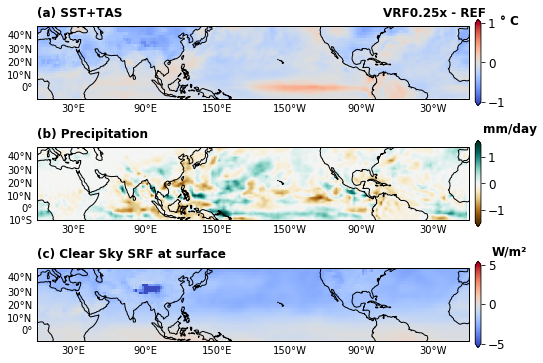

In [91]:
# 025x - PI
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))

im3 = sst_tas_025x.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=1.0, cmap='coolwarm',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

pr_diff_025x = ds_pr_025x_.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_025x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
pr_diff_025x = pr_diff_025x*86400

pr_diff_025x_interp = xr.Dataset({'lat': (['lat'], np.arange(-88.5, 88.5, 0.25)),
                     'lon': (['lon'], np.arange(0, 359, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff_025x, pr_diff_025x_interp, 'bilinear')
pr_diff_025x_interp = regridder(pr_diff_025x)

im2 = pr_diff_025x_interp.sel(lat=slice(-10,45)).plot(vmin=-1.5,vmax=1.5,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = sfc_025x_anom_wrt_pi_025x.sel(lat=slice(-10,45)).plot(vmin=-5,vmax=5,cmap='coolwarm',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585, '(b) Precipitation', size='large', weight='bold')
fig.text(0.1,0.865, '(a) SST+TAS', size='large', weight='bold')
fig.text(0.7,0.865, 'VRF0.25x - REF', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    


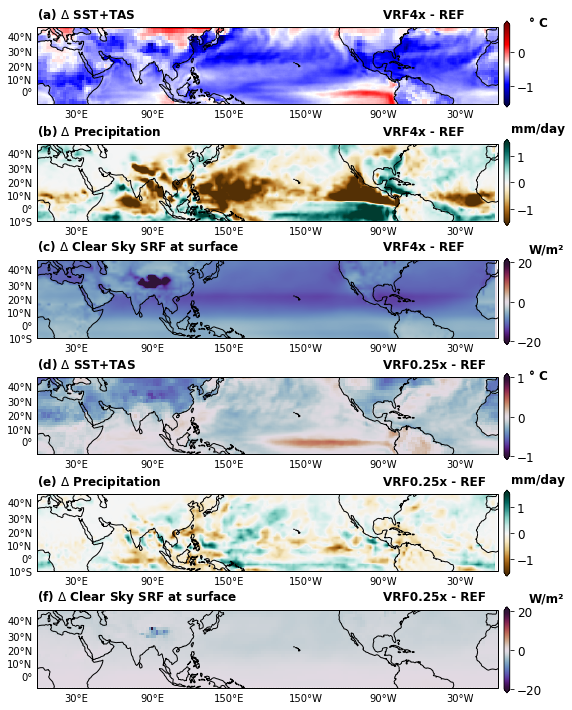

In [92]:
import matplotlib.patches as patches
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_axes([0.1,0.025+0.03*5,0.8,0.15],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.025+0.15+0.015+0.03*4,0.8,0.15],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.025+2*0.15+2*0.015+0.03*3,0.8,0.15],projection=ccrs.Mercator(180))
ax4 = fig.add_axes([0.1,0.025+3*0.15+3*0.015+0.03*2,0.8,0.15],projection=ccrs.Mercator(180))
ax5 = fig.add_axes([0.1,0.025+4*0.15+4*0.015+0.03,0.8,0.15],projection=ccrs.Mercator(180))
ax6 = fig.add_axes([0.1,0.025+5*0.15+5*0.015,0.8,0.15],projection=ccrs.Mercator(180))

im6 = sst_tas_4x.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.5, vmax=0.8, cmap='seismic',ax=ax6, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())
im5 = pr_diff_4x_interp.sel(lat=slice(-10,45)).plot(vmin=-1.5, vmax=1.5, cmap='BrBG',ax=ax5, add_colorbar=False, transform=ccrs.PlateCarree())
im4 = sfc_4x_anom_wrt_pi_4x_interp.sel(lat=slice(-10,45)).plot(vmin=-20,vmax=20,cmap='twilight_shifted',extend='both', ax=ax4, add_colorbar=False, transform=ccrs.PlateCarree())
im3 = sst_tas_025x.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=1.0, cmap='twilight_shifted',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())
im2 = pr_diff_025x_interp.sel(lat=slice(-10,45)).plot(vmin=-1.5,vmax=1.5,cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())
im1 = sfc_025x_anom_wrt_pi_025x.sel(lat=slice(-10,45)).plot(vmin=-20,vmax=20,cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())

for ax in [ax1,ax2, ax3,ax4,ax5,ax6]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax4 = fig.add_axes([0.86+0.05, 0.025+3*0.15+3*0.03-0.023+0.03*2, 0.01, 0.1])
cb4 = fig.colorbar(im4, extend='both', cax=cax4)

cb4.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb4.ax.tick_params(labelsize='large')

cax5 = fig.add_axes([0.86+0.05, 0.025+4*0.15+4*0.03-0.035+0.03, 0.01, 0.1])
cb5 = fig.colorbar(im5, extend='both', cax=cax5)

cb5.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb5.ax.tick_params(labelsize='large')

cax6 = fig.add_axes([0.86+0.05, 0.025+5*0.15+5*0.03-0.048, 0.01, 0.1])
cb6 = fig.colorbar(im6, extend='both', cax=cax6)

cb6.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb6.ax.tick_params(labelsize='large')

cax1 = fig.add_axes([0.86+0.05, 0.025+0.024+0.03*5, 0.01, 0.1])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86+0.05, 0.025+0.15+0.015+0.024+0.03*4, 0.01, 0.1])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86+0.05, 0.025+2*0.15+2*0.015+0.024+0.03*3, 0.01, 0.1])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')


fig.text(0.1,0.307+0.12*3+0.03*2-0.015, '(c) $\Delta$ Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585+0.12*2+0.02, '(b) $\Delta$ Precipitation', size='large', weight='bold')
fig.text(0.1,0.865+0.12-0.005, '(a) $\Delta$ SST+TAS', size='large', weight='bold')

fig.text(0.7,0.865+0.12-0.005, 'VRF4x - REF', size='large', weight='bold')
fig.text(0.7,0.585+0.12*2+0.02, 'VRF4x - REF', size='large', weight='bold')
fig.text(0.7,0.307+0.12*3+0.03*2-0.015, 'VRF4x - REF', size='large', weight='bold')

fig.text(0.1,0.307-0.12+0.02*5+0.02, '(f) $\Delta$ Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585-0.12*2+0.02*4+0.015, '(e) $\Delta$ Precipitation', size='large', weight='bold')
fig.text(0.1,0.865-0.12*3+0.02*3+0.01, '(d) $\Delta$ SST+TAS', size='large', weight='bold')

fig.text(0.7,0.865-0.12*3+0.02*3+0.01, 'VRF0.25x - REF', size='large', weight='bold')
fig.text(0.7,0.585-0.12*2+0.02*4+0.015, 'VRF0.25x - REF', size='large', weight='bold')
fig.text(0.7,0.307-0.12+0.02*5+0.02, 'VRF0.25x - REF', size='large', weight='bold')

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    
#ax1.axvline(x=-100, ymin=-3, ymax=10,linewidth=2.0, color = 'k')


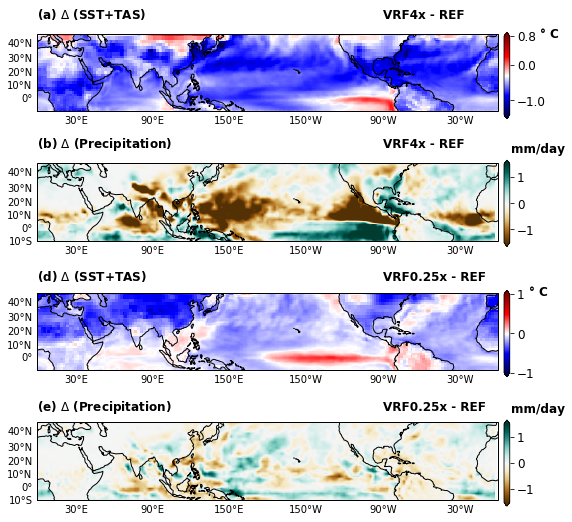

In [16]:
import matplotlib.patches as patches
fig = plt.figure(figsize=(8,8))
# ax1 = fig.add_axes([0.1,0.0375+0.045*5,0.8,0.15],projection=ccrs.Mercator(180))
# ax2 = fig.add_axes([0.1,0.025+0.15+0.015+0.03*4,0.8,0.15],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.05,0.8,0.225],projection=ccrs.Mercator(180))
ax4 = fig.add_axes([0.1,0.275,0.8,0.225],projection=ccrs.Mercator(180))
ax5 = fig.add_axes([0.1,0.5,0.8,0.225],projection=ccrs.Mercator(180))
ax6 = fig.add_axes([0.1,0.5+0.225,0.8,0.225],projection=ccrs.Mercator(180))

im6 = sst_tas_4x.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.4, vmax=0.8, cmap='seismic',ax=ax6, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())
im5 = pr_diff_4x_interp.sel(lat=slice(-10,45)).plot(vmin=-1.5, vmax=1.5, cmap='BrBG',ax=ax5, add_colorbar=False, transform=ccrs.PlateCarree())
#im4 = sfc_4x_anom_wrt_pi_4x_interp.sel(lat=slice(-10,45)).plot(vmin=-20,vmax=20,cmap='twilight_shifted',extend='both', ax=ax4, add_colorbar=False, transform=ccrs.PlateCarree())
im3 = sst_tas_025x.sel(yt_ocean=slice(-10,45)).plot(vmin=-1.0, vmax=1.0, cmap='seismic',ax=ax4, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())
im2 = pr_diff_025x_interp.sel(lat=slice(-10,45)).plot(vmin=-1.5,vmax=1.5,cmap='BrBG',ax=ax3, add_colorbar=False, transform=ccrs.PlateCarree())
#im1 = sfc_025x_anom_wrt_pi_025x.sel(lat=slice(-10,45)).plot(vmin=-20,vmax=20,cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())

for ax in [ ax3,ax4,ax5,ax6]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

# cax4 = fig.add_axes([0.86+0.05, 0.025+3*0.15+3*0.03-0.023+0.03*2, 0.01, 0.15])
# cb4 = fig.colorbar(im4, extend='both', cax=cax4)

# cb4.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
# cb4.ax.tick_params(labelsize='large')

cax5 = fig.add_axes([0.86+0.05, 0.025+4*0.15+4*0.03-0.035+0.03-0.205, 0.01, 0.15])
cb5 = fig.colorbar(im5, extend='both', cax=cax5)

cb5.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb5.ax.tick_params(labelsize='large')

cax6 = fig.add_axes([0.86+0.05, 0.025+5*0.15+5*0.03-0.048-0.12, 0.01, 0.15])
cb6 = fig.colorbar(im6, extend='both', cax=cax6)

cb6.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb6.ax.tick_params(labelsize='large')
cb6.set_ticks([-1.0,0.0,0.8])
# cax1 = fig.add_axes([0.86+0.05, 0.025+0.024+0.03*5, 0.01, 0.1])
# cb1 = fig.colorbar(im1, extend='both', cax=cax1)

# cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
# cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86+0.05, 0.025+0.15+0.015+0.024+0.03*4-0.25, 0.01, 0.15])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86+0.05, 0.025+2*0.15+2*0.015+0.024+0.03*3-0.16, 0.01, 0.15])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')


#fig.text(0.1,0.307+0.12*3+0.03*2-0.015, '(c) $\Delta$ Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.307+0.12*3+0.03*2-0.02, '(b) $\Delta$ (Precipitation)', size='large', weight='bold')
fig.text(0.1,0.865+0.12-0.005-0.05, '(a) $\Delta$ (SST+TAS)', size='large', weight='bold')

fig.text(0.7,0.865+0.12-0.005-0.05, 'VRF4x - REF', size='large', weight='bold')
#fig.text(0.7,0.585+0.12*2+0.02, 'VRF4x - REF', size='large', weight='bold')
fig.text(0.7,0.307+0.12*3+0.03*2-0.02, 'VRF4x - REF', size='large', weight='bold')

#fig.text(0.1,0.307-0.12+0.02*5+0.02, '(f) $\Delta$ Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585-0.12*2+0.02*4+0.015-0.19, '(e) $\Delta$ (Precipitation)', size='large', weight='bold')
fig.text(0.1,0.865-0.12*3+0.02*3+0.01-0.1, '(d) $\Delta$ (SST+TAS)', size='large', weight='bold')

#fig.text(0.7,0.865-0.12*3+0.02*3+0.01, 'VRF0.25x - REF', size='large', weight='bold')
fig.text(0.7,0.865-0.12*3+0.02*3+0.01-0.1, 'VRF0.25x - REF', size='large', weight='bold')
fig.text(0.7,0.585-0.12*2+0.02*4+0.015-0.19, 'VRF0.25x - REF', size='large', weight='bold')

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    
#ax1.axvline(x=-100, ymin=-3, ymax=10,linewidth=2.0, color = 'k')
#plt.savefig('test.png', format='png', dpi=1000)

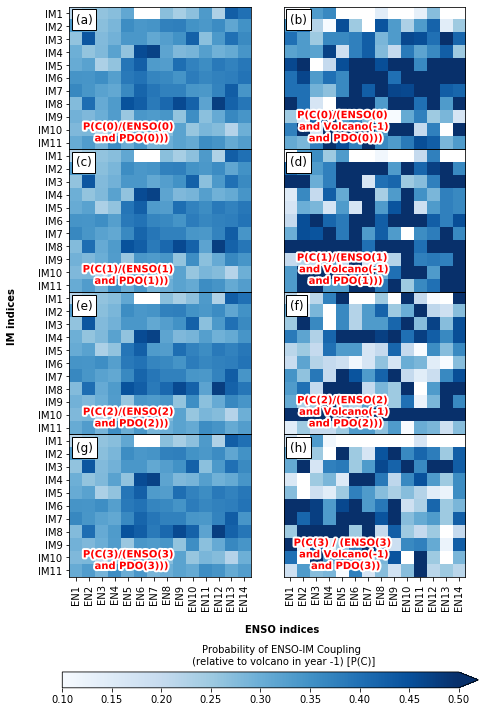

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import matplotlib.patheffects as path_effects
import matplotlib.patheffects as pe

p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag2.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag2.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag3.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag3.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']
fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')
    
fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and PDO(2)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and PDO(1)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72, 'P(C(0)/(ENSO(0) \n and PDO(0)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3) / (ENSO(3) \n and Volcano(-1) \n and PDO(3))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and Volcano(-1) \n and PDO(2)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and Volcano(-1) \n and PDO(1)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72, 'P(C(0)/(ENSO(0) \n and Volcano(-1) \n and PDO(0)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
    
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
pl.savefig('figs5.png', format='png', dpi=1000)

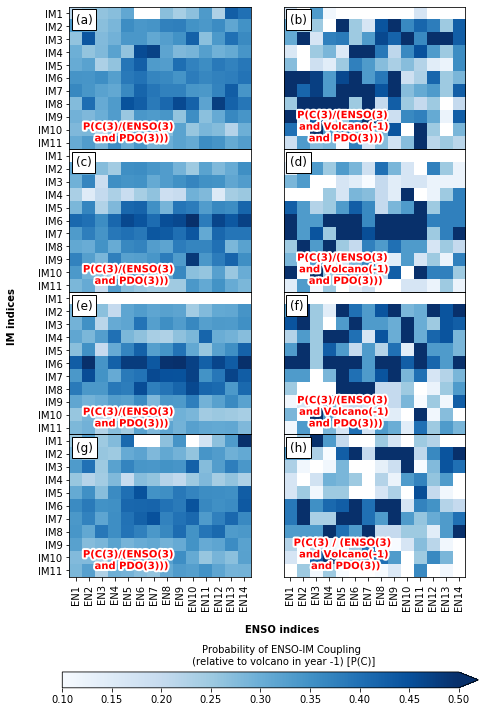

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import matplotlib.patheffects as path_effects
import matplotlib.patheffects as pe

p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag4.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag4.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_pdo_biondi_lag4.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_biondi_lag4.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_pdo_arrigo_lag4.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_arrigo_lag4.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_pdo_macdonald_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_macdonald_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']
fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')
    
fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72-2*0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72-0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3) / (ENSO(3) \n and Volcano(-1) \n and PDO(3))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72-0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72, 'P(C(3)/(ENSO(3) \n and Volcano(-1) \n and PDO(3)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
    
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
pl.savefig('figs6.png', format='png', dpi=1000)

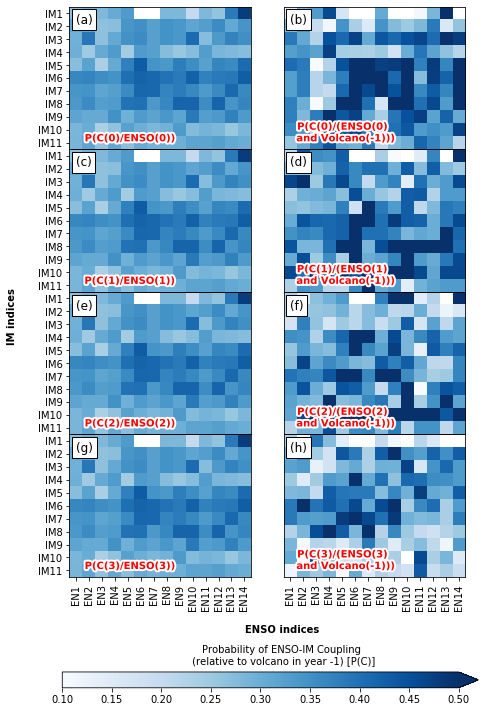

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import matplotlib.patheffects as path_effects
import matplotlib.patheffects as pe

p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_lag1.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_lag1.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_lag2.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_lag2.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_lag3.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_lag3.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='Blues', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')

fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/ENSO(3))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72-2*0.18, 'P(C(2)/ENSO(2))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72-0.18, 'P(C(1)/ENSO(1))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25, 0.72, 'P(C(0)/ENSO(0))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and Volcano(-1)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and Volcano(-1)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.25+0.35, 0.72, 'P(C(0)/(ENSO(0) \n and Volcano(-1)))', ha='center', weight='bold',color='r',  path_effects=[pe.withStroke(linewidth=4, foreground="white")])

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
 
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
pl.savefig('figs3.png', format='png', dpi=1000)

# Thermocline analysis

In [4]:
import xarray
f = '/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/temp_ocean/temp_ocean_1921_2299_monmean.nc'
ds = xarray.open_dataset(f)

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [5]:
ds

<xarray.Dataset>
Dimensions:   (st_ocean: 50, time: 4349, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * st_ocean  (st_ocean) float64 5.0 15.0 25.0 ... 4.588e+03 4.95e+03 5.316e+03
  * time      (time) object 1921-08-17 12:00:00 ... 2299-12-19 12:00:00
Data variables:
    temp      (time, st_ocean, yt_ocean, xt_ocean) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.6.4 (http://c...
    history:                   Wed Jun 03 19:39:33 2020: cdo mergetime temp_o...
    Conventions:               CF-1.4
    filename:                  ocean_1921_08_01.nc
    title:                     MOM4ICE
    grid_type:                 regular
    grid_tile:                 N/A
    nco_openmp_thread_number:  1
    NCO:                       4.4.2
    CDO:                       Climate Data Operators version 1.6.4 (http://c...

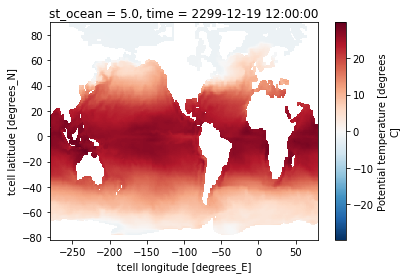

In [9]:
ds.temp.isel(st_ocean=0).isel(time=4348).plot()

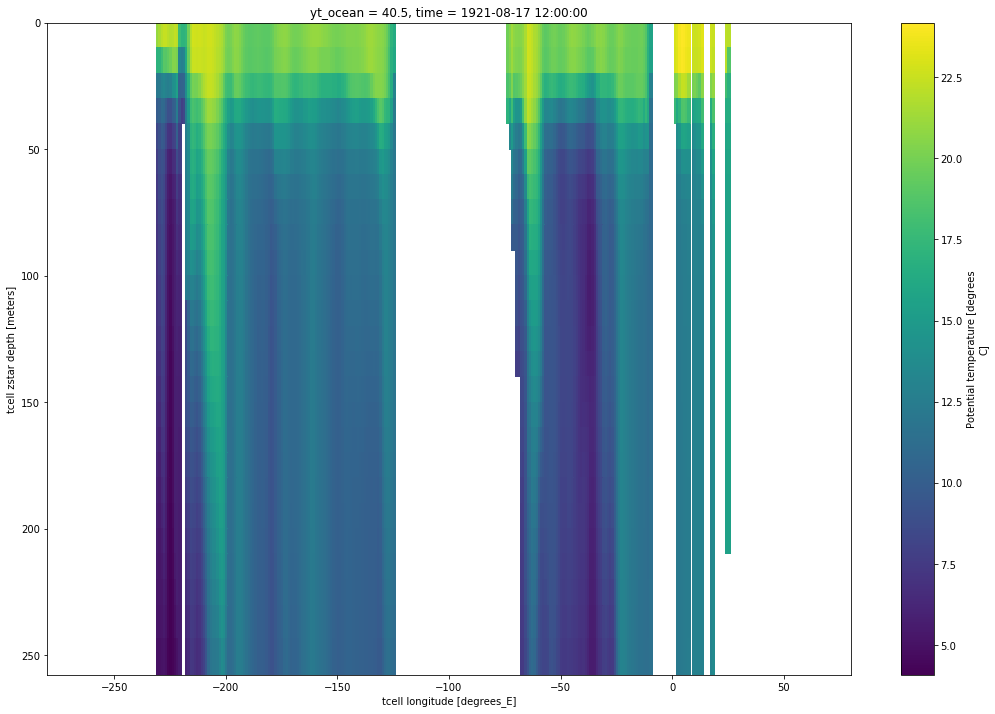

In [10]:
ds.temp[0,0:25,150,:].plot(size=12,yincrease=False)

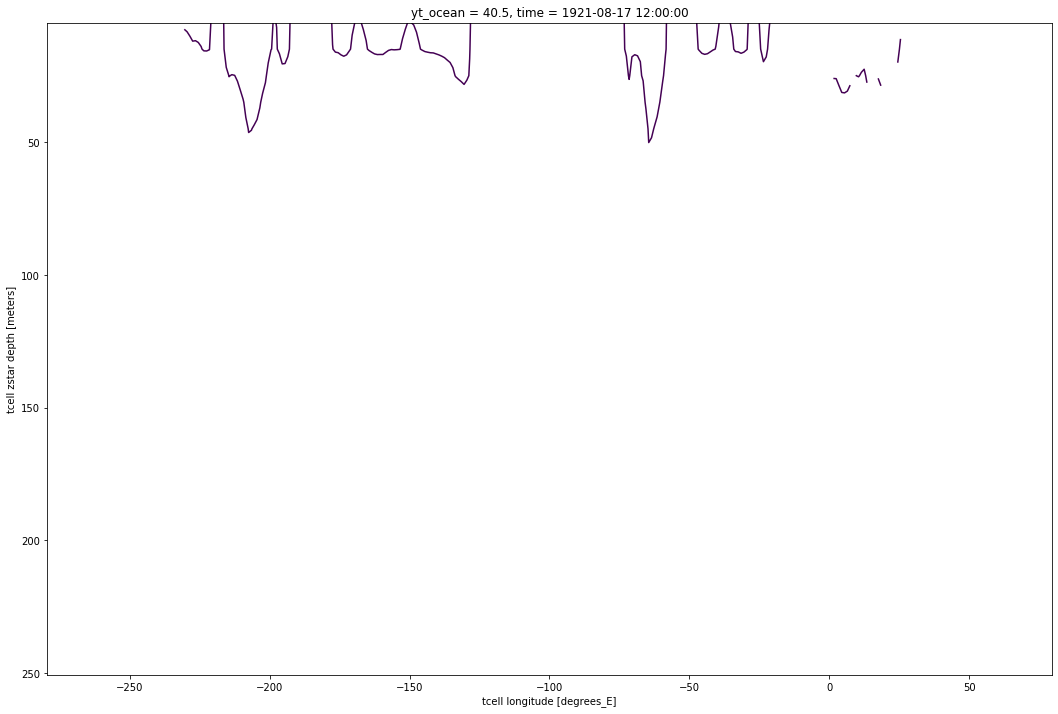

In [15]:
cont = ds.temp[0,0:25,150,:].plot.contour(levels=[20],size=12,yincrease=False)

In [19]:
import numpy as np
isotherm = xarray.DataArray(np.zeros((len(ds.time),len(ds.xt_ocean))),dims=['time','xt_ocean'],coords={'time': ds.time,'xt_ocean': ds.xt_ocean})
isotherm[:]=np.nan
isotherm

<xarray.DataArray (time: 4349, xt_ocean: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time      (time) object 1921-08-17 12:00:00 ... 2299-12-19 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5

0 1921-08-17 12:00:00
1 1921-09-17 00:00:00
2 1921-10-17 12:00:00
3 1921-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
4 1921-12-17 12:00:00


/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.8/site-packages/xarray/plot/plot.py:906: UserWarning: No contour levels were found within the data range.
  primitive = ax.contour(x, y, z, **kwargs)


Exception x and y arrays must have at least 2 entries
5 1922-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
6 1922-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
7 1922-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
8 1922-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
9 1922-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
10 1922-06-17 00:00:00
11 1922-07-17 12:00:00
12 1922-08-17 12:00:00
13 1922-09-17 00:00:00
14 1922-10-17 12:00:00
15 1922-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
16 1922-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
17 1923-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
18 1923-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
19 1923-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
20 1923-04-17 00:00:00
Exception x and y arrays must have at least

157 1934-09-17 00:00:00
158 1934-10-17 12:00:00
159 1934-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
160 1934-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
161 1935-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
162 1935-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
163 1935-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
164 1935-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
165 1935-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
166 1935-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
167 1935-07-17 12:00:00
168 1935-08-17 12:00:00
169 1935-09-17 00:00:00
170 1935-10-17 12:00:00
171 1935-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
172 1935-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
173 1936-01-17 12:00:00
Exception x and y arrays must have at least 2 entrie

Exception x and y arrays must have at least 2 entries
304 1946-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
305 1947-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
306 1947-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
307 1947-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
308 1947-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
309 1947-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
310 1947-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
311 1947-07-17 12:00:00
312 1947-08-17 12:00:00
313 1947-09-17 00:00:00
314 1947-10-17 12:00:00
315 1947-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
316 1947-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
317 1948-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
318 1948-02-16 12:00:00
Exception x and y arrays must have at least 2 

446 1958-10-17 12:00:00
447 1958-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
448 1958-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
449 1959-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
450 1959-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
451 1959-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
452 1959-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
453 1959-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
454 1959-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
455 1959-07-17 12:00:00
456 1959-08-17 12:00:00
457 1959-09-17 00:00:00
458 1959-10-17 12:00:00
459 1959-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
460 1959-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
461 1960-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
462 1960-02-16 12:00:0

590 1970-10-17 12:00:00
591 1970-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
592 1970-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
593 1971-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
594 1971-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
595 1971-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
596 1971-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
597 1971-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
598 1971-06-17 00:00:00
599 1971-07-17 12:00:00
600 1971-08-17 12:00:00
601 1971-09-17 00:00:00
602 1971-10-17 12:00:00
603 1971-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
604 1971-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
605 1972-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
606 1972-02-16 12:00:00
Exception x and y arrays must have at least 2 entrie

734 1982-10-17 12:00:00
735 1982-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
736 1982-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
737 1983-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
738 1983-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
739 1983-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
740 1983-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
741 1983-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
742 1983-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
743 1983-07-17 12:00:00
744 1983-08-17 12:00:00
745 1983-09-17 00:00:00
746 1983-10-17 12:00:00
747 1983-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
748 1983-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
749 1984-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
750 1984-02-16 12:00:0

Exception x and y arrays must have at least 2 entries
882 1995-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
883 1995-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
884 1995-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
885 1995-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
886 1995-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
887 1995-07-17 12:00:00
888 1995-08-17 12:00:00
889 1995-09-17 00:00:00
890 1995-10-17 12:00:00
891 1995-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
892 1995-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
893 1996-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
894 1996-02-16 12:00:00
Exception x and y arrays must have at least 2 entries
895 1996-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
896 1996-04-17 00:00:00
Exception x and y arrays must have at least 2 

Exception x and y arrays must have at least 2 entries
1025 2007-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1026 2007-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
1027 2007-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1028 2007-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1029 2007-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1030 2007-06-17 00:00:00
1031 2007-07-17 12:00:00
1032 2007-08-17 12:00:00
1033 2007-09-17 00:00:00
1034 2007-10-17 12:00:00
1035 2007-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1036 2007-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1037 2008-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1038 2008-02-16 12:00:00
Exception x and y arrays must have at least 2 entries
1039 2008-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1040 2008-04-17 00:00:00
Except

Exception x and y arrays must have at least 2 entries
1169 2019-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1170 2019-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
1171 2019-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1172 2019-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1173 2019-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1174 2019-06-17 00:00:00
1175 2019-07-17 12:00:00
1176 2019-08-17 12:00:00
1177 2019-09-17 00:00:00
1178 2019-10-17 12:00:00
1179 2019-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1180 2019-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1181 2020-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1182 2020-02-16 12:00:00
Exception x and y arrays must have at least 2 entries
1183 2020-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1184 2020-04-17 00:00:00
Except

1308 2030-08-17 12:00:00
1309 2030-09-17 00:00:00
1310 2030-10-17 12:00:00
1311 2030-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1312 2030-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1313 2031-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1314 2031-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
1315 2031-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1316 2031-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1317 2031-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1318 2031-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
1319 2031-07-17 12:00:00
1320 2031-08-17 12:00:00
1321 2031-09-17 00:00:00
1322 2031-10-17 12:00:00
1323 2031-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1324 2031-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1325 2032-01-17 12:00:00
Exception 

1452 2042-08-17 12:00:00
1453 2042-09-17 00:00:00
1454 2042-10-17 12:00:00
1455 2042-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1456 2042-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1457 2043-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1458 2043-02-16 00:00:00
Exception x and y arrays must have at least 2 entries
1459 2043-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1460 2043-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1461 2043-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1462 2043-06-17 00:00:00
1463 2043-07-17 12:00:00
1464 2043-08-17 12:00:00
1465 2043-09-17 00:00:00
1466 2043-10-17 12:00:00
1467 2043-11-17 00:00:00
1468 2043-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1469 2044-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1470 2044-02-16 12:00:00
Exception x and y arrays must have at l

Exception x and y arrays must have at least 2 entries
1603 2071-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1604 2071-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1605 2071-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1606 2071-06-17 00:00:00
1607 2071-07-17 12:00:00
1608 2071-08-17 12:00:00
1609 2071-09-17 00:00:00
1610 2071-10-17 12:00:00
1611 2071-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1612 2071-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1613 2072-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1614 2072-02-16 12:00:00
Exception x and y arrays must have at least 2 entries
1615 2072-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1616 2072-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1617 2072-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1618 2072-06-17 00:00:00
1619 2

Exception x and y arrays must have at least 2 entries
1749 2083-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1750 2083-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
1751 2083-07-17 12:00:00
1752 2083-08-17 12:00:00
1753 2083-09-17 00:00:00
1754 2083-10-17 12:00:00
1755 2083-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1756 2083-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1757 2084-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1758 2084-02-16 12:00:00
Exception x and y arrays must have at least 2 entries
1759 2084-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1760 2084-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1761 2084-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1762 2084-06-17 00:00:00
Exception x and y arrays must have at least 2 entries
1763 2084-07-17 12:00:00
1764 2084-08-17 12:00:00
1765 2

1897 2095-09-17 00:00:00
1898 2095-10-17 12:00:00
1899 2095-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1900 2095-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1901 2096-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1902 2096-02-16 12:00:00
Exception x and y arrays must have at least 2 entries
1903 2096-03-17 12:00:00
Exception x and y arrays must have at least 2 entries
1904 2096-04-17 00:00:00
Exception x and y arrays must have at least 2 entries
1905 2096-05-17 12:00:00
Exception x and y arrays must have at least 2 entries
1906 2096-06-17 00:00:00
1907 2096-07-17 12:00:00
1908 2096-08-17 12:00:00
1909 2096-09-17 00:00:00
1910 2096-10-17 12:00:00
1911 2096-11-17 00:00:00
Exception x and y arrays must have at least 2 entries
1912 2096-12-17 12:00:00
Exception x and y arrays must have at least 2 entries
1913 2097-01-17 12:00:00
Exception x and y arrays must have at least 2 entries
1914 2097-02-16 00:00:00
Exception 

2039 2107-07-18 12:00:00
2040 2107-08-18 12:00:00
2041 2107-09-18 00:00:00
2042 2107-10-18 12:00:00
2043 2107-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2044 2107-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2045 2108-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2046 2108-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
2047 2108-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
2048 2108-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2049 2108-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2050 2108-06-18 00:00:00
2051 2108-07-18 12:00:00
2052 2108-08-18 12:00:00
2053 2108-09-18 00:00:00
2054 2108-10-18 12:00:00
2055 2108-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2056 2108-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2057 2109-01-18 12:00:00
Exception x and y arrays must have at l

2186 2119-10-18 12:00:00
2187 2119-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2188 2119-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2189 2120-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2190 2120-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
2191 2120-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
2192 2120-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2193 2120-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2194 2120-06-18 00:00:00
Exception x and y arrays must have at least 2 entries
2195 2120-07-18 12:00:00
2196 2120-08-18 12:00:00
2197 2120-09-18 00:00:00
2198 2120-10-18 12:00:00
2199 2120-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2200 2120-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2201 2121-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2202 2

2328 2131-08-18 12:00:00
2329 2131-09-18 00:00:00
2330 2131-10-18 12:00:00
2331 2131-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2332 2131-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2333 2132-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2334 2132-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
2335 2132-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
2336 2132-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2337 2132-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2338 2132-06-18 00:00:00
Exception x and y arrays must have at least 2 entries
2339 2132-07-18 12:00:00
2340 2132-08-18 12:00:00
2341 2132-09-18 00:00:00
2342 2132-10-18 12:00:00
2343 2132-11-18 00:00:00
2344 2132-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2345 2133-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2346 2133-

2471 2143-07-18 12:00:00
2472 2143-08-18 12:00:00
2473 2143-09-18 00:00:00
2474 2143-10-18 12:00:00
2475 2143-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2476 2143-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2477 2144-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2478 2144-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
2479 2144-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
2480 2144-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2481 2144-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2482 2144-06-18 00:00:00
Exception x and y arrays must have at least 2 entries
2483 2144-07-18 12:00:00
2484 2144-08-18 12:00:00
2485 2144-09-18 00:00:00
2486 2144-10-18 12:00:00
2487 2144-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2488 2144-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2489 2145-

Exception x and y arrays must have at least 2 entries
2615 2155-07-18 12:00:00
2616 2155-08-18 12:00:00
2617 2155-09-18 00:00:00
2618 2155-10-18 12:00:00
2619 2155-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2620 2155-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2621 2156-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2622 2156-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
2623 2156-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
2624 2156-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2625 2156-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2626 2156-06-18 00:00:00
2627 2156-07-18 12:00:00
2628 2156-08-18 12:00:00
2629 2156-09-18 00:00:00
2630 2156-10-18 12:00:00
2631 2156-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2632 2156-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2633 2157-

Exception x and y arrays must have at least 2 entries
2759 2167-07-18 12:00:00
2760 2167-08-18 12:00:00
2761 2167-09-18 00:00:00
2762 2167-10-18 12:00:00
2763 2167-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2764 2167-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2765 2168-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2766 2168-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
2767 2168-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
2768 2168-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2769 2168-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2770 2168-06-18 00:00:00
Exception x and y arrays must have at least 2 entries
2771 2168-07-18 12:00:00
2772 2168-08-18 12:00:00
2773 2168-09-18 00:00:00
2774 2168-10-18 12:00:00
2775 2168-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2776 2168-12-18 12:00:00
Exception 

Exception x and y arrays must have at least 2 entries
2900 2179-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2901 2179-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2902 2179-06-18 00:00:00
2903 2179-07-18 12:00:00
2904 2179-08-18 12:00:00
2905 2179-09-18 00:00:00
2906 2179-10-18 12:00:00
2907 2179-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
2908 2179-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
2909 2180-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
2910 2180-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
2911 2180-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
2912 2180-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
2913 2180-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
2914 2180-06-18 00:00:00
Exception x and y arrays must have at least 2 entries
2915 2180-07-18 12:00:00
2916 2

Exception x and y arrays must have at least 2 entries
3045 2191-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
3046 2191-06-18 00:00:00
3047 2191-07-18 12:00:00
3048 2191-08-18 12:00:00
3049 2191-09-18 00:00:00
3050 2191-10-18 12:00:00
3051 2191-11-18 00:00:00
Exception x and y arrays must have at least 2 entries
3052 2191-12-18 12:00:00
Exception x and y arrays must have at least 2 entries
3053 2192-01-18 12:00:00
Exception x and y arrays must have at least 2 entries
3054 2192-02-17 12:00:00
Exception x and y arrays must have at least 2 entries
3055 2192-03-18 12:00:00
Exception x and y arrays must have at least 2 entries
3056 2192-04-18 00:00:00
Exception x and y arrays must have at least 2 entries
3057 2192-05-18 12:00:00
Exception x and y arrays must have at least 2 entries
3058 2192-06-18 00:00:00
Exception x and y arrays must have at least 2 entries
3059 2192-07-18 12:00:00
3060 2192-08-18 12:00:00
3061 2192-09-18 00:00:00
3062 2192-10-18 12:00:00
3063 2192-

3194 2203-10-19 12:00:00
3195 2203-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3196 2203-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3197 2204-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
3198 2204-02-18 12:00:00
Exception x and y arrays must have at least 2 entries
3199 2204-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
3200 2204-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3201 2204-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3202 2204-06-19 00:00:00
Exception x and y arrays must have at least 2 entries
3203 2204-07-19 12:00:00
3204 2204-08-19 12:00:00
3205 2204-09-19 00:00:00
3206 2204-10-19 12:00:00
3207 2204-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3208 2204-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3209 2205-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
3210 2

Exception x and y arrays must have at least 2 entries
3333 2215-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3334 2215-06-19 00:00:00
3335 2215-07-19 12:00:00
3336 2215-08-19 12:00:00
3337 2215-09-19 00:00:00
3338 2215-10-19 12:00:00
3339 2215-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3340 2215-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3341 2216-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
3342 2216-02-18 12:00:00
Exception x and y arrays must have at least 2 entries
3343 2216-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
3344 2216-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3345 2216-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3346 2216-06-19 00:00:00
Exception x and y arrays must have at least 2 entries
3347 2216-07-19 12:00:00
3348 2216-08-19 12:00:00
3349 2216-09-19 00:00:00
3350 2216-10-19 12:00:00
3351 2216-

Exception x and y arrays must have at least 2 entries
3477 2227-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3478 2227-06-19 00:00:00
3479 2227-07-19 12:00:00
3480 2227-08-19 12:00:00
3481 2227-09-19 00:00:00
3482 2227-10-19 12:00:00
3483 2227-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3484 2227-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3485 2228-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
3486 2228-02-18 12:00:00
Exception x and y arrays must have at least 2 entries
3487 2228-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
3488 2228-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3489 2228-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3490 2228-06-19 00:00:00
3491 2228-07-19 12:00:00
3492 2228-08-19 12:00:00
3493 2228-09-19 00:00:00
3494 2228-10-19 12:00:00
3495 2228-11-19 00:00:00
Exception x and y arrays must have at l

Exception x and y arrays must have at least 2 entries
3623 2239-07-19 12:00:00
3624 2239-08-19 12:00:00
3625 2239-09-19 00:00:00
3626 2239-10-19 12:00:00
3627 2239-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3628 2239-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3629 2240-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
3630 2240-02-18 12:00:00
Exception x and y arrays must have at least 2 entries
3631 2240-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
3632 2240-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3633 2240-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3634 2240-06-19 00:00:00
3635 2240-07-19 12:00:00
3636 2240-08-19 12:00:00
3637 2240-09-19 00:00:00
3638 2240-10-19 12:00:00
3639 2240-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3640 2240-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3641 2241-

Exception x and y arrays must have at least 2 entries
3764 2251-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3765 2251-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3766 2251-06-19 00:00:00
3767 2251-07-19 12:00:00
3768 2251-08-19 12:00:00
3769 2251-09-19 00:00:00
3770 2251-10-19 12:00:00
3771 2251-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3772 2251-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3773 2252-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
3774 2252-02-18 12:00:00
Exception x and y arrays must have at least 2 entries
3775 2252-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
3776 2252-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3777 2252-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3778 2252-06-19 00:00:00
3779 2252-07-19 12:00:00
3780 2252-08-19 12:00:00
3781 2252-09-19 00:00:00
3782 2252-

Exception x and y arrays must have at least 2 entries
3906 2263-02-18 00:00:00
Exception x and y arrays must have at least 2 entries
3907 2263-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
3908 2263-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3909 2263-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
3910 2263-06-19 00:00:00
3911 2263-07-19 12:00:00
3912 2263-08-19 12:00:00
3913 2263-09-19 00:00:00
3914 2263-10-19 12:00:00
3915 2263-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
3916 2263-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
3917 2264-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
3918 2264-02-18 12:00:00
Exception x and y arrays must have at least 2 entries
3919 2264-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
3920 2264-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
3921 2264-05-19 12:00:00
Except

Exception x and y arrays must have at least 2 entries
4048 2274-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
4049 2275-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
4050 2275-02-18 00:00:00
Exception x and y arrays must have at least 2 entries
4051 2275-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
4052 2275-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
4053 2275-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
4054 2275-06-19 00:00:00
Exception x and y arrays must have at least 2 entries
4055 2275-07-19 12:00:00
4056 2275-08-19 12:00:00
4057 2275-09-19 00:00:00
4058 2275-10-19 12:00:00
4059 2275-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
4060 2275-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
4061 2276-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
4062 2276-02-18 12:00:00
Exception x and y arrays must h

Exception x and y arrays must have at least 2 entries
4187 2286-07-19 12:00:00
4188 2286-08-19 12:00:00
4189 2286-09-19 00:00:00
4190 2286-10-19 12:00:00
4191 2286-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
4192 2286-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
4193 2287-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
4194 2287-02-18 00:00:00
Exception x and y arrays must have at least 2 entries
4195 2287-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
4196 2287-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
4197 2287-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
4198 2287-06-19 00:00:00
Exception x and y arrays must have at least 2 entries
4199 2287-07-19 12:00:00
4200 2287-08-19 12:00:00
4201 2287-09-19 00:00:00
4202 2287-10-19 12:00:00
4203 2287-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
4204 2287-12-19 12:00:00
Exception 

Exception x and y arrays must have at least 2 entries
4324 2297-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
4325 2298-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
4326 2298-02-18 00:00:00
Exception x and y arrays must have at least 2 entries
4327 2298-03-19 12:00:00
Exception x and y arrays must have at least 2 entries
4328 2298-04-19 00:00:00
Exception x and y arrays must have at least 2 entries
4329 2298-05-19 12:00:00
Exception x and y arrays must have at least 2 entries
4330 2298-06-19 00:00:00
Exception x and y arrays must have at least 2 entries
4331 2298-07-19 12:00:00
4332 2298-08-19 12:00:00
4333 2298-09-19 00:00:00
4334 2298-10-19 12:00:00
4335 2298-11-19 00:00:00
Exception x and y arrays must have at least 2 entries
4336 2298-12-19 12:00:00
Exception x and y arrays must have at least 2 entries
4337 2299-01-19 12:00:00
Exception x and y arrays must have at least 2 entries
4338 2299-02-18 00:00:00
Exception x and y arrays must h

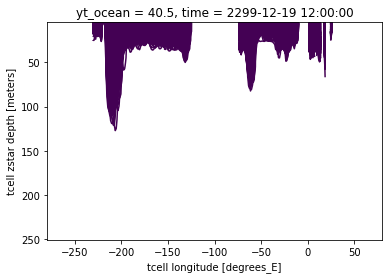

In [21]:
for i, t in enumerate(ds.temp.time):
    print(i,t.values)
    cont = None
    try:
        cont = ds.temp[i,0:25,150,:].plot.contour(levels=[20],yincrease=False)
        val = {}
        for path in cont.collections[0].get_paths():
            for (x,y),s in path.iter_segments():
                val[x] = y
        tmp = xarray.DataArray(list(val.values()),dims=['xt_ocean'],coords={'xt_ocean':list(val.keys())})
        # Thought it was necessary to sort the index, but appears not to be
        # tmp = tmp.reindex(i=sorted(tmp.i.values))
        isotherm[i,:] = tmp.interp(xt_ocean=ds.xt_ocean)
    except Exception as e:
        print('Exception',e)

In [ ]:
isotherm.plot(size=12)

# Thermocline using Ferret 

In [28]:
import xarray as xr
f_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/temp_ocean/d20_anom.nc"
ds = xr.open_dataset(f_)
# datetimeindex = ds.indexes['TIME'].to_datetimeindex()
# ds['TIME'] = datetimeindex

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


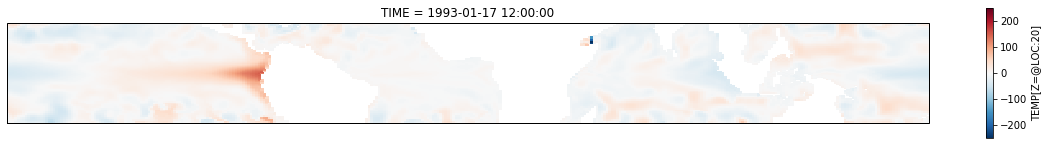

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_axes([0.1,0.025+0.03*5,0.8,0.15],projection=ccrs.LambertCylindrical(180))
ds.D20.sel(YT_OCEAN=slice(-20,20)).isel(TIME=857).plot(ax=ax1)

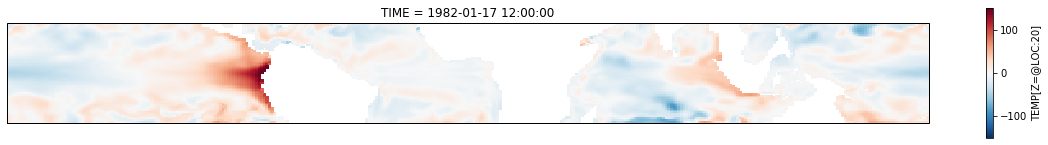

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_axes([0.1,0.025+0.03*5,0.8,0.15],projection=ccrs.LambertCylindrical(180))
ds.D20.sel(YT_OCEAN=slice(-20,20)).isel(TIME=857-11*12).plot(ax=ax1)

In [93]:
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
import xesmf as xe
import numpy as np

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_sst_pi_control_4x.nc"
ds_sst_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/rsdscs_4x.nc"
ds_rsdscs_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/rsuscs_4x.nc"
ds_rsuscs_control_4x = xr.open_dataset(dir_)

sfc_control_4x = ds_rsdscs_control_4x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_control_4x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsuscs_pi_control_4x.nc"
ds_rsuscs_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsdscs_pi_control_4x.nc"
ds_rsdscs_pi_4x = xr.open_dataset(dir_)
sfc_pi_4x = ds_rsdscs_pi_4x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_pi_4x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

sfc_clim = ds_rsdscs_clim.rsdscs.isel(time=slice(6,9)).mean(dim='time') - ds_rsuscs_clim.rsuscs.isel(time=slice(6,9)).mean(dim='time')

ds_out = xr.Dataset({'lat': (['lat'], sfc_clim.lat.values),
                     'lon': (['lon'], sfc_clim.lon.values)})
regridder = xe.Regridder(sfc_control_4x, ds_out, 'bilinear')
regridder.clean_weight_file()
sfc_control_4x_ = regridder(sfc_control_4x)
sfc_control_4x_anom = sfc_control_4x_ #- sfc_clim

sfc_control_4x_anom_wrt_pi_4x = sfc_control_4x_anom - sfc_pi_4x

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/tas_4x.nc"
ds_tas_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/tas_pi_control_4x.nc"
ds_tas_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/anom_pr_4x.nc"
ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/anom_sst_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_pr_pi_control_4x.nc"
ds_pr_pi_4x = xr.open_dataset(dir_)

ds_tas_control_4x_ = regridder(ds_tas_control_4x)
ds_pr_control_4x_ = regridder(ds_pr_control_4x.pr)


tas_control_4x_anom_np = np.zeros((ds_tas_control_4x_.tas.values.shape))
for i in range(tas_control_4x_anom_np.shape[0]):
    tas_control_4x_anom_np[i,:,:] = ds_tas_control_4x_.tas.values[i,:,:] - ds_tas_clim.tas.values[i%12]

ds_tas_control_4x_['tas_anom'] = (('time', 'lat', 'lon'), tas_control_4x_anom_np)
tas_diff_control_4x = ds_tas_control_4x_.tas.isel(time=slice(18,26)).mean(dim='time') - ds_tas_pi_4x.tas.isel(time=slice(18,26)).mean(dim='time')
sst_diff_control_4x = ds_sst_control_4x.sst.isel(time=slice(18,26)).mean(dim='time') - ds_sst_pi_4x.sst.isel(time=slice(18,26)).mean(dim='time')

sst_tas_control_4x = sst_diff_control_4x
for i in range(sst_diff_control_4x.shape[0]):
    for j in range(sst_diff_control_4x.shape[1]):
        if np.isnan(sst_diff_control_4x.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff_control_4x.xt_ocean.values[j]>0:
                sst_tas_control_4x[i,j] = tas_diff_control_4x.sel(lat=sst_diff_control_4x.yt_ocean.values[i], lon=sst_diff_control_4x.xt_ocean.values[j], method='nearest')
            else:
                sst_tas_control_4x[i,j] = tas_diff_control_4x.sel(lat=sst_diff_control_4x.yt_ocean.values[i], lon=sst_diff_control_4x.xt_ocean.values[j]+360, method='nearest')



Create weight file: bilinear_94x192_94x192.nc
Remove file bilinear_94x192_94x192.nc
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.


Overwrite existing file: bilinear_94x192_708x1436.nc 
 You can set reuse_weights=True to save computing time.


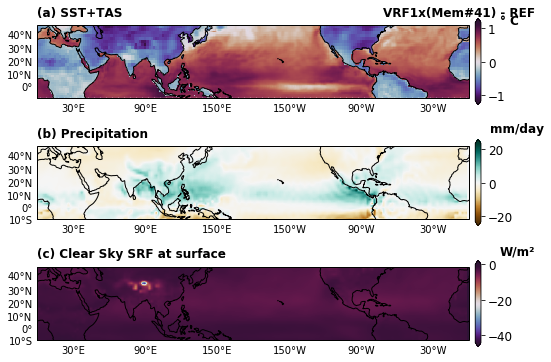

In [94]:
# control_4x - PI
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))

pr_diff_control_4x = ds_pr_control_4x_.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_4x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
pr_diff_control_4x = pr_diff_control_4x*86400

pr_diff_control_4x_interp = xr.Dataset({'lat': (['lat'], np.arange(-88.5, 88.5, 0.25)),
                     'lon': (['lon'], np.arange(0, 359, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff_control_4x, pr_diff_control_4x_interp, 'bilinear')
pr_diff_control_4x_interp = regridder(pr_diff_control_4x)
sfc_control_4x_anom_wrt_pi_4x_interp = regridder(sfc_control_4x_anom_wrt_pi_4x)
#sst_tas_4x_interp = regridder(sst_tas_4x)

im3 = sst_tas_control_4x.sel(yt_ocean=slice(-10,45)).plot(cmap='twilight_shifted',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

# pr_diff_control_4x = ds_pr_4x_.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_4x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
# pr_diff_4x = pr_diff_4x*86400



im2 = pr_diff_control_4x_interp.sel(lat=slice(-10,45)).plot(cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = sfc_control_4x_anom_wrt_pi_4x_interp.sel(lat=slice(-10,45)).plot(cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585, '(b) Precipitation', size='large', weight='bold')
fig.text(0.1,0.865, '(a) SST+TAS', size='large', weight='bold')
fig.text(0.7,0.865, 'VRF1x(Mem#41) - REF', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

In [95]:
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
f_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/temp_ocean/d20_clim.nc"
ds = xr.open_dataset(f_)

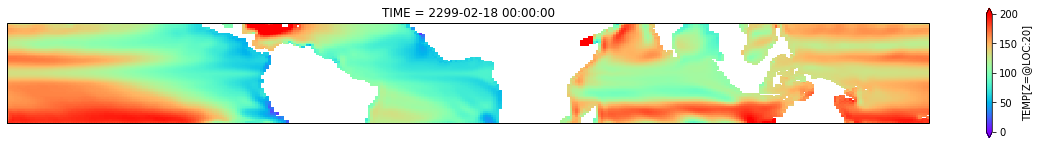

In [96]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_axes([0.1,0.025+0.03*5,0.8,0.15],projection=ccrs.LambertCylindrical(180))
ds.D20_CLIM.sel(YT_OCEAN=slice(-20,20)).isel(TIME=1).plot(ax=ax1,vmin=0,vmax=200,extend='both',cmap='rainbow')

In [97]:
import xarray as xr
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/anom_sst_4x.nc"
ds1 = xr.open_dataset(dir_)

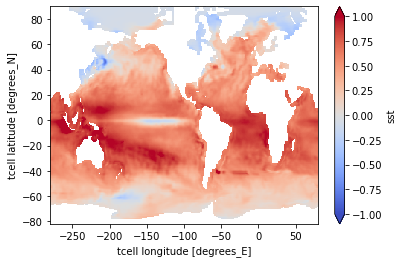

In [98]:
ds1.sst.isel(time=slice(18,26)).mean(dim='time').plot(vmin=-1.0,vmax=1.0,cmap='coolwarm',extend='both')

In [99]:
import xarray as xr
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/tas_4x.nc"
ds1 = xr.open_dataset(dir_)

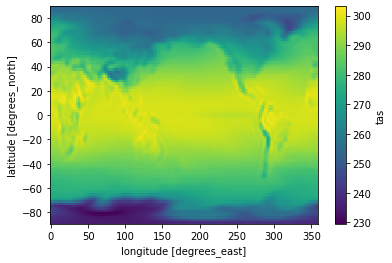

In [100]:
ds1.tas.isel(time=slice(18,26)).mean(dim='time').plot()

In [101]:
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

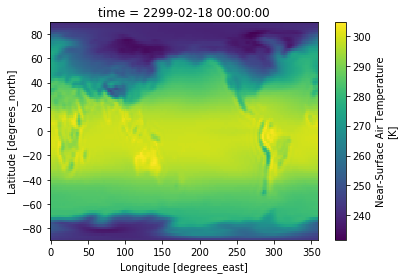

In [102]:
ds_tas_clim.tas.isel(time=1).plot()

# New figure S8

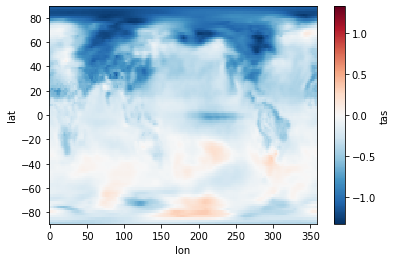

In [103]:
tas_diff_control_4x.plot()

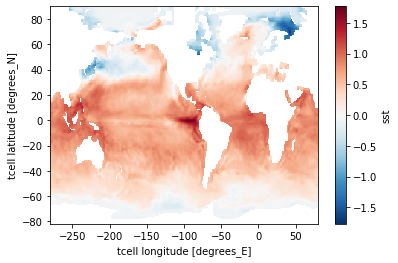

In [104]:
sst_diff_control_4x = ds_sst_control_4x.sst.isel(time=slice(18,20)).mean(dim='time') - ds_sst_pi_4x.sst.isel(time=slice(18,20)).mean(dim='time')
sst_diff_control_4x.plot()

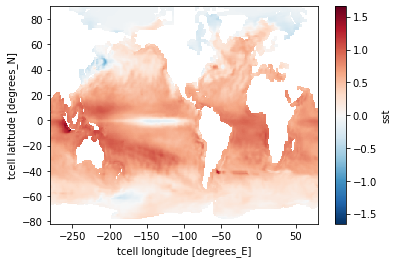

In [105]:
ds_sst_control_4x.sst.isel(time=slice(18,26)).mean(dim='time').plot()

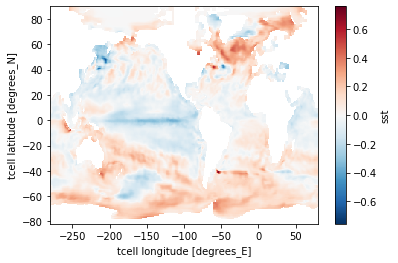

In [106]:
ds_sst_pi_4x.sst.isel(time=slice(18,26)).mean(dim='time').plot()

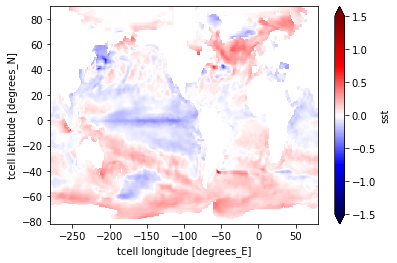

In [107]:
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_sst_pi_control_4x.nc"
ds_sst_pi_4x = xr.open_dataset(dir_)
ds_sst_pi_4x.sst.isel(time=slice(18,26)).mean(dim='time').plot(vmin=-1.5,vmax=1.5, cmap='seismic', extend='both')

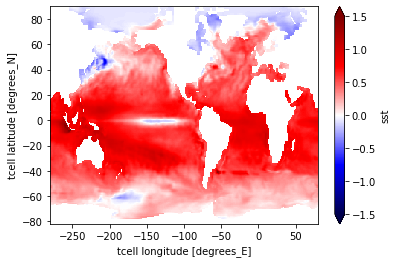

In [108]:
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/anom_sst_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)
ds_sst_control_4x.sst.isel(time=slice(18,26)).mean(dim='time').plot(vmin=-1.5,vmax=1.5, cmap='seismic', extend='both')

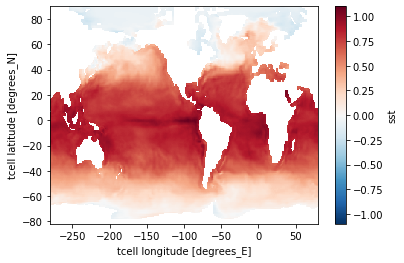

In [109]:
(ds_sst_control_4x.sst.isel(time=slice(21)).mean(dim='time') - ds_sst_pi_4x.sst.isel(time=slice(21)).mean(dim='time')).plot()

In [123]:
from load_data_state_of_system_review_spatial import *
sst_4x_o = np.nanmean( np.array([ np.nanmean(w_sst_4x_o,axis=0), np.nanmean(c_sst_4x_o,axis=0), np.nanmean(n_sst_4x_o,axis=0) ]), axis=0 )
sst_025x_o = np.mean( np.array([ np.nanmean(w_sst_025x_o,axis=0), np.nanmean(c_sst_025x_o,axis=0), np.nanmean(n_sst_025x_o,axis=0) ]), axis=0 )
pr_4x_o = np.nanmean( np.array([ np.nanmean(w_pr_4x_o,axis=0), np.nanmean(c_pr_4x_o,axis=0), np.nanmean(n_pr_4x_o,axis=0) ]), axis=0 )
pr_025x_o = np.mean( np.array([ np.nanmean(w_pr_025x_o,axis=0), np.nanmean(c_pr_025x_o,axis=0), np.nanmean(n_pr_025x_o,axis=0) ]), axis=0 )

In [124]:
from load_data_state_of_system_review_pi_spatial import *
sst_pi_4x_o = np.nanmean( np.array([ np.nanmean(w_sst_4x_o,axis=0), np.nanmean(c_sst_4x_o,axis=0), np.nanmean(n_sst_4x_o,axis=0) ]), axis=0 )
sst_pi_025x_o = np.nanmean( np.array([ np.nanmean(w_sst_025x_o,axis=0), np.nanmean(c_sst_025x_o,axis=0), np.nanmean(n_sst_025x_o,axis=0) ]), axis=0 )
pr_pi_4x_o = np.nanmean( np.array([ np.nanmean(w_pr_4x_o,axis=0), np.nanmean(c_pr_4x_o,axis=0), np.nanmean(n_pr_4x_o,axis=0) ]), axis=0 )
pr_pi_025x_o = np.nanmean( np.array([ np.nanmean(w_pr_025x_o,axis=0), np.nanmean(c_pr_025x_o,axis=0), np.nanmean(n_pr_025x_o,axis=0) ]), axis=0 )

In [125]:
import xarray as xr
dir_ = "dummy_.nc"
ds = xr.open_dataset(dir_)

dir_ = "dummy_pr_.nc"
ds_pr = xr.open_dataset(dir_)

In [128]:
sst_4x_o[sst_4x_o<-20] = np.nan
sst_pi_4x_o[sst_pi_4x_o<-20] = np.nan
sst_025x_o[sst_025x_o<-20] = np.nan
sst_pi_025x_o[sst_pi_025x_o<-20] = np.nan

ds['sst_4x_o'] = (('time', 'yt_ocean', 'xt_ocean'), sst_4x_o)
ds['sst_025x_o'] = (('time', 'yt_ocean', 'xt_ocean'), sst_025x_o)
ds['sst_pi_4x_o'] = (('time', 'yt_ocean', 'xt_ocean'), sst_pi_4x_o)
ds['sst_pi_025x_o'] = (('time', 'yt_ocean', 'xt_ocean'), sst_pi_025x_o)

ds_pr['pr_4x_o'] = (('time', 'lat', 'lon'), pr_4x_o)
ds_pr['pr_025x_o'] = (('time', 'lat', 'lon'), pr_025x_o)
ds_pr['pr_pi_4x_o'] = (('time', 'lat', 'lon'), pr_pi_4x_o)
ds_pr['pr_pi_025x_o'] = (('time', 'lat', 'lon'), pr_pi_025x_o)

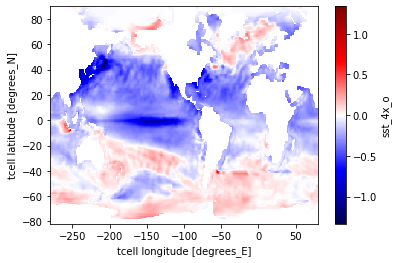

In [129]:
ds.sst_4x_o.isel(time=slice(18,26)).mean(dim='time').plot(cmap='seismic')

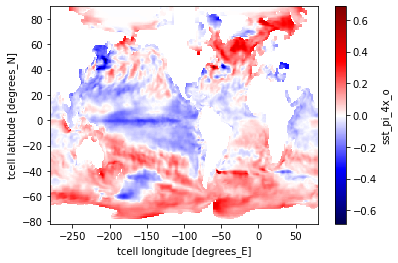

In [130]:
ds.sst_pi_4x_o.isel(time=slice(18,26)).mean(dim='time').plot(cmap='seismic')

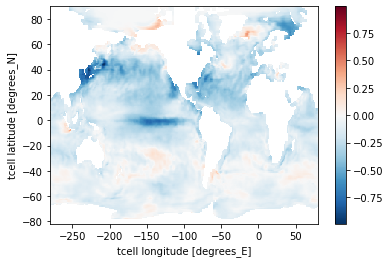

In [131]:
(ds.sst_4x_o.isel(time=slice(18,26)).mean(dim='time') - ds.sst_pi_4x_o.isel(time=slice(18,26)).mean(dim='time')).plot()

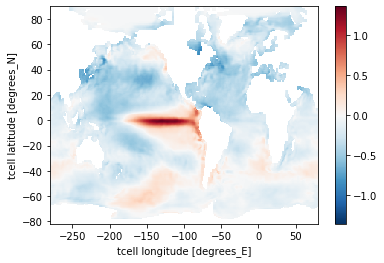

In [132]:
(ds.sst_025x_o.isel(time=slice(18,26)).mean(dim='time') - ds.sst_pi_025x_o.isel(time=slice(18,26)).mean(dim='time')).plot()

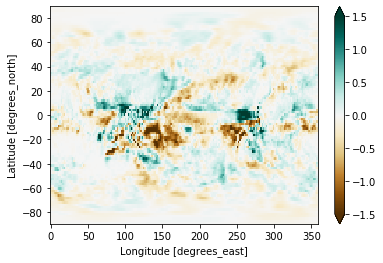

In [146]:
pr_diff_4x = (ds_pr.pr_4x_o.isel(time=slice(18,21)).mean(dim='time') - ds_pr.pr_pi_4x_o.isel(time=slice(18,21)).mean(dim='time'))*86400
pr_diff_4x.plot(cmap='BrBG', vmin=-1.5, vmax=1.5)

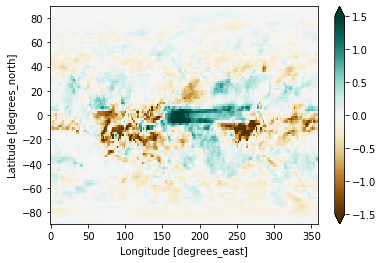

In [145]:
pr_diff_025x = (ds_pr.pr_025x_o.isel(time=slice(18,21)).mean(dim='time') - ds_pr.pr_pi_025x_o.isel(time=slice(18,21)).mean(dim='time'))*86400
pr_diff_025x.plot(cmap='BrBG', vmin=-1.5, vmax=1.5)

In [147]:
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
import xesmf as xe
import numpy as np

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_sst_pi_control_4x.nc"
ds_sst_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/rsdscs_4x.nc"
ds_rsdscs_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/rsuscs_4x.nc"
ds_rsuscs_control_4x = xr.open_dataset(dir_)

sfc_control_4x = ds_rsdscs_control_4x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_control_4x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsuscs_pi_control_4x.nc"
ds_rsuscs_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/rsdscs_pi_control_4x.nc"
ds_rsdscs_pi_4x = xr.open_dataset(dir_)
sfc_pi_4x = ds_rsdscs_pi_4x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_pi_4x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

sfc_clim = ds_rsdscs_clim.rsdscs.isel(time=slice(6,9)).mean(dim='time') - ds_rsuscs_clim.rsuscs.isel(time=slice(6,9)).mean(dim='time')

ds_out = xr.Dataset({'lat': (['lat'], sfc_clim.lat.values),
                     'lon': (['lon'], sfc_clim.lon.values)})
regridder = xe.Regridder(sfc_control_4x, ds_out, 'bilinear')
regridder.clean_weight_file()
sfc_control_4x_ = regridder(sfc_control_4x)
sfc_control_4x_anom = sfc_control_4x_ #- sfc_clim

sfc_control_4x_anom_wrt_pi_4x = sfc_control_4x_anom - sfc_pi_4x

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/tas_4x.nc"
ds_tas_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/tas_pi_control_4x.nc"
ds_tas_pi_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/anom_pr_4x.nc"
ds_pr_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_4x/anom_sst_4x.nc"
ds_sst_control_4x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/4x/anom_pr_pi_control_4x.nc"
ds_pr_pi_4x = xr.open_dataset(dir_)

ds_tas_control_4x_ = regridder(ds_tas_control_4x)
ds_pr_control_4x_ = regridder(ds_pr_control_4x.pr)


tas_control_4x_anom_np = np.zeros((ds_tas_control_4x_.tas.values.shape))
for i in range(tas_control_4x_anom_np.shape[0]):
    tas_control_4x_anom_np[i,:,:] = ds_tas_control_4x_.tas.values[i,:,:] - ds_tas_clim.tas.values[i%12]

ds_tas_control_4x_['tas_anom'] = (('time', 'lat', 'lon'), tas_control_4x_anom_np)
tas_diff_control_4x = ds_tas_control_4x_.tas.isel(time=slice(18,26)).mean(dim='time') - ds_tas_pi_4x.tas.isel(time=slice(18,26)).mean(dim='time')
# sst_diff_control_4x = ds_sst_control_4x.sst.isel(time=slice(18,26)).mean(dim='time') - ds_sst_pi_4x.sst.isel(time=slice(18,26)).mean(dim='time')
sst_diff_control_4x = (ds.sst_4x_o.isel(time=slice(18,26)).mean(dim='time') - ds.sst_pi_4x_o.isel(time=slice(18,26)).mean(dim='time'))
sst_tas_control_4x = sst_diff_control_4x
for i in range(sst_diff_control_4x.shape[0]):
    for j in range(sst_diff_control_4x.shape[1]):
        if np.isnan(sst_diff_control_4x.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff_control_4x.xt_ocean.values[j]>0:
                sst_tas_control_4x[i,j] = tas_diff_control_4x.sel(lat=sst_diff_control_4x.yt_ocean.values[i], lon=sst_diff_control_4x.xt_ocean.values[j], method='nearest')
            else:
                sst_tas_control_4x[i,j] = tas_diff_control_4x.sel(lat=sst_diff_control_4x.yt_ocean.values[i], lon=sst_diff_control_4x.xt_ocean.values[j]+360, method='nearest')



Create weight file: bilinear_94x192_94x192.nc
Remove file bilinear_94x192_94x192.nc
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.


Overwrite existing file: bilinear_94x192_708x1436.nc 
 You can set reuse_weights=True to save computing time.


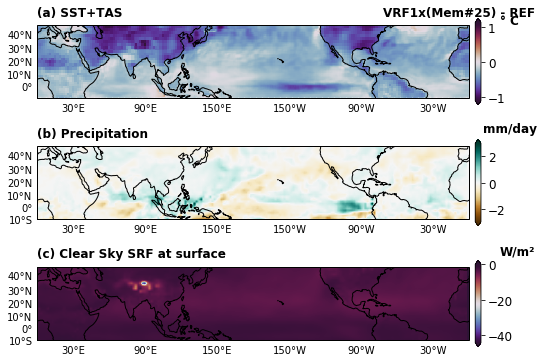

In [149]:
# control_4x - PI
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))

# pr_diff_control_4x = ds_pr_control_4x_.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_4x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
# pr_diff_control_4x = pr_diff_control_4x*86400

pr_diff_control_4x = pr_diff_4x#.isel(time=slice(30-12,33-12)).mean(dim='time')

pr_diff_control_4x_interp = xr.Dataset({'lat': (['lat'], np.arange(-88.5, 88.5, 0.25)),
                     'lon': (['lon'], np.arange(0, 359, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff_control_4x, pr_diff_control_4x_interp, 'bilinear')
pr_diff_control_4x_interp = regridder(pr_diff_control_4x)
sfc_control_4x_anom_wrt_pi_4x_interp = regridder(sfc_control_4x_anom_wrt_pi_4x)
#sst_tas_4x_interp = regridder(sst_tas_4x)

im3 = sst_tas_control_4x.sel(yt_ocean=slice(-10,45)).plot(cmap='twilight_shifted',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

# pr_diff_control_4x = ds_pr_4x_.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_4x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
# pr_diff_4x = pr_diff_4x*86400



im2 = pr_diff_control_4x_interp.sel(lat=slice(-10,45)).plot(cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = sfc_control_4x_anom_wrt_pi_4x_interp.sel(lat=slice(-10,45)).plot(cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585, '(b) Precipitation', size='large', weight='bold')
fig.text(0.1,0.865, '(a) SST+TAS', size='large', weight='bold')
fig.text(0.7,0.865, 'VRF1x(Mem#25) - REF', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

In [150]:
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
import xesmf as xe
import numpy as np

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/anom_sst_pi_control_025x.nc"
ds_sst_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/rsdscs_025x.nc"
ds_rsdscs_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/rsuscs_025x.nc"
ds_rsuscs_control_025x = xr.open_dataset(dir_)

sfc_control_025x = ds_rsdscs_control_025x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_control_025x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsuscs_pi_control_025x.nc"
ds_rsuscs_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/rsdscs_pi_control_025x.nc"
ds_rsdscs_pi_025x = xr.open_dataset(dir_)
sfc_pi_025x = ds_rsdscs_pi_025x.rsdscs.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_rsuscs_pi_025x.rsuscs.isel(time=slice(30-12,33-12)).mean(dim='time')

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsdscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsdscs_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/rsuscs_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_rsuscs_clim = xr.open_dataset(dir_)

sfc_clim = ds_rsdscs_clim.rsdscs.isel(time=slice(6,9)).mean(dim='time') - ds_rsuscs_clim.rsuscs.isel(time=slice(6,9)).mean(dim='time')

ds_out = xr.Dataset({'lat': (['lat'], sfc_clim.lat.values),
                     'lon': (['lon'], sfc_clim.lon.values)})
regridder = xe.Regridder(sfc_control_025x, ds_out, 'bilinear')
regridder.clean_weight_file()
sfc_control_025x_ = regridder(sfc_control_025x)
sfc_control_025x_anom = sfc_control_025x_ #- sfc_clim

sfc_control_025x_anom_wrt_pi_025x = sfc_control_025x_anom - sfc_pi_025x

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/tas_025x.nc"
ds_tas_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/tas_pi_control_025x.nc"
ds_tas_pi_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/rsdscs_rsuscs_tas_pr/tas_Amon_IITM-ESM_piControl_r1i1p1f1_gn_1926_2299_ymonmean.nc"
ds_tas_clim = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/anom_pr_025x.nc"
ds_pr_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/control_0.25x/anom_sst_025x.nc"
ds_sst_control_025x = xr.open_dataset(dir_)

dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/pi_control/0.25x/anom_pr_pi_control_025x.nc"
ds_pr_pi_025x = xr.open_dataset(dir_)

ds_tas_control_025x_ = regridder(ds_tas_control_025x)
ds_pr_control_025x_ = regridder(ds_pr_control_025x.pr)


tas_control_025x_anom_np = np.zeros((ds_tas_control_025x_.tas.values.shape))
for i in range(tas_control_025x_anom_np.shape[0]):
    tas_control_025x_anom_np[i,:,:] = ds_tas_control_025x_.tas.values[i,:,:] - ds_tas_clim.tas.values[i%12]

ds_tas_control_025x_['tas_anom'] = (('time', 'lat', 'lon'), tas_control_025x_anom_np)
tas_diff_control_025x = ds_tas_control_025x_.tas.isel(time=slice(18,26)).mean(dim='time') - ds_tas_pi_025x.tas.isel(time=slice(18,26)).mean(dim='time')
# sst_diff_control_4x = ds_sst_control_4x.sst.isel(time=slice(18,26)).mean(dim='time') - ds_sst_pi_4x.sst.isel(time=slice(18,26)).mean(dim='time')
sst_diff_control_025x = (ds.sst_025x_o.isel(time=slice(18,26)).mean(dim='time') - ds.sst_pi_025x_o.isel(time=slice(18,26)).mean(dim='time'))
sst_tas_control_025x = sst_diff_control_025x
for i in range(sst_diff_control_025x.shape[0]):
    for j in range(sst_diff_control_025x.shape[1]):
        if np.isnan(sst_diff_control_025x.values[i,j]):
            #print(sst_diff.xt_ocean.values[j], sst_diff.yt_ocean.values[i])
            if sst_diff_control_025x.xt_ocean.values[j]>0:
                sst_tas_control_025x[i,j] = tas_diff_control_025x.sel(lat=sst_diff_control_025x.yt_ocean.values[i], lon=sst_diff_control_025x.xt_ocean.values[j], method='nearest')
            else:
                sst_tas_control_025x[i,j] = tas_diff_control_025x.sel(lat=sst_diff_control_025x.yt_ocean.values[i], lon=sst_diff_control_025x.xt_ocean.values[j]+360, method='nearest')



Create weight file: bilinear_94x192_94x192.nc
Remove file bilinear_94x192_94x192.nc
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.


Overwrite existing file: bilinear_94x192_708x1436.nc 
 You can set reuse_weights=True to save computing time.


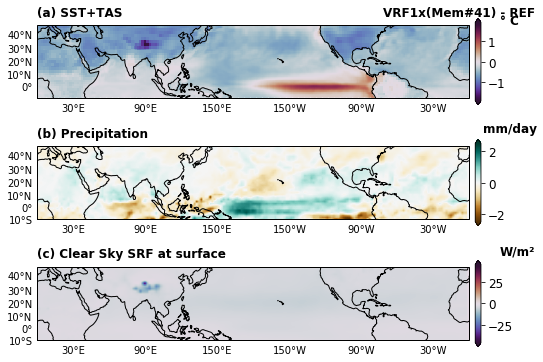

In [151]:
# control_4x - PI
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.05,0.75,0.3],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.33,0.75,0.3],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.61,0.75,0.3],projection=ccrs.Mercator(180))

# pr_diff_control_025x = ds_pr_control_025x_.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_025x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
# pr_diff_control_025x = pr_diff_control_025x*86400
pr_diff_control_025x = pr_diff_025x

pr_diff_control_025x_interp = xr.Dataset({'lat': (['lat'], np.arange(-88.5, 88.5, 0.25)),
                     'lon': (['lon'], np.arange(0, 359, 0.25)),
                    }
                   )
regridder = xe.Regridder(pr_diff_control_025x, pr_diff_control_025x_interp, 'bilinear')
pr_diff_control_025x_interp = regridder(pr_diff_control_025x)
sfc_control_025x_anom_wrt_pi_025x_interp = regridder(sfc_control_025x_anom_wrt_pi_025x)
#sst_tas_4x_interp = regridder(sst_tas_4x)

im3 = sst_tas_control_025x.sel(yt_ocean=slice(-10,45)).plot(cmap='twilight_shifted',ax=ax3, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())

# pr_diff_control_4x = ds_pr_4x_.pr.isel(time=slice(30-12,33-12)).mean(dim='time') - ds_pr_pi_4x.pr.isel(time=slice(30-12,33-12)).mean(dim='time')
# pr_diff_4x = pr_diff_4x*86400



im2 = pr_diff_control_025x_interp.sel(lat=slice(-10,45)).plot(cmap='BrBG',ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())

im1 = sfc_control_025x_anom_wrt_pi_025x_interp.sel(lat=slice(-10,45)).plot(cmap='twilight_shifted',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())
for ax in [ax1,ax2, ax3]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax1 = fig.add_axes([0.86, 0.1, 0.01, 0.2])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='W/m\N{SUPERSCRIPT TWO}', size='large', weight='bold', y=1.18, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.86, 0.38, 0.01, 0.2])
cb2 = fig.colorbar(im2, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.2, rotation=0)
cb2.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.86, 0.66, 0.01, 0.2])
cb3 = fig.colorbar(im3, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb3.ax.tick_params(labelsize='large')

fig.text(0.1,0.307, '(c) Clear Sky SRF at surface', size='large', weight='bold')
fig.text(0.1,0.585, '(b) Precipitation', size='large', weight='bold')
fig.text(0.1,0.865, '(a) SST+TAS', size='large', weight='bold')
fig.text(0.7,0.865, 'VRF1x(Mem#41) - REF', size='large', weight='bold')
for ax in [ax1,ax2,ax3]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

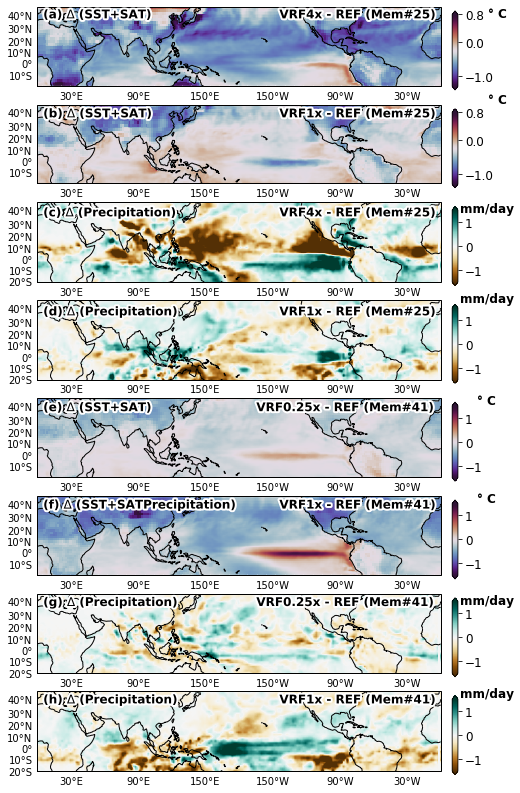

In [179]:
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
import matplotlib.patheffects as pe


fig = plt.figure(figsize=(8,11))
ax1 = fig.add_axes([0.1,0.02,0.7,0.11],projection=ccrs.Mercator(180))
ax2 = fig.add_axes([0.1,0.02+0.12+0.0035,0.7,0.11],projection=ccrs.Mercator(180))
ax3 = fig.add_axes([0.1,0.02+2*0.12+2*0.0035,0.7,0.11],projection=ccrs.Mercator(180))
ax4 = fig.add_axes([0.1,0.02+3*0.12+3*0.0035,0.7,0.11],projection=ccrs.Mercator(180))
ax5 = fig.add_axes([0.1,0.02+4*0.12+4*0.0035,0.7,0.11],projection=ccrs.Mercator(180))
ax6 = fig.add_axes([0.1,0.02+5*0.12+5*0.0035,0.7,0.11],projection=ccrs.Mercator(180))
ax7 = fig.add_axes([0.1,0.02+6*0.12+6*0.0035,0.7,0.11],projection=ccrs.Mercator(180))
ax8 = fig.add_axes([0.1,0.02+7*0.12+7*0.0035,0.7,0.11],projection=ccrs.Mercator(180))

im8 = sst_tas_4x.sel(yt_ocean=slice(-20,45)).plot(vmin=-1.3, vmax=0.8, cmap='twilight_shifted',ax=ax8, extend='both',add_colorbar=False, transform=ccrs.PlateCarree())
im7 = pr_diff_4x_interp.sel(lat=slice(-20,45)).plot(vmin=-1.5, vmax=1.5,cmap='BrBG',ax=ax6, add_colorbar=False, transform=ccrs.PlateCarree())
im6 = sst_tas_control_4x.sel(yt_ocean=slice(-20,45)).plot(vmin=-1.3,vmax=0.8,cmap='twilight_shifted',extend='both', ax=ax7, add_colorbar=False, transform=ccrs.PlateCarree())
im5 = pr_diff_control_4x_interp.sel(lat=slice(-20,45)).plot(vmin=-1.5, vmax=1.5, cmap='BrBG',ax=ax5, add_colorbar=False, transform=ccrs.PlateCarree())
im4 = sst_tas_025x.sel(yt_ocean=slice(-20,45)).plot(vmin=-1.5,vmax=1.5,cmap='twilight_shifted',ax=ax4, add_colorbar=False, transform=ccrs.PlateCarree())
im3 = pr_diff_025x_interp.sel(lat=slice(-20,45)).plot(vmin=-1.5,vmax=1.5,cmap='BrBG',extend='both', ax=ax2, add_colorbar=False, transform=ccrs.PlateCarree())
im2 = sst_tas_control_025x.sel(yt_ocean=slice(-20,45)).plot(vmin=-1.5,vmax=1.5,cmap='twilight_shifted',ax=ax3, add_colorbar=False, transform=ccrs.PlateCarree())
im1 = pr_diff_control_025x_interp.sel(lat=slice(-20,45)).plot(vmin=-1.5,vmax=1.5,cmap='BrBG',extend='both', ax=ax1, add_colorbar=False, transform=ccrs.PlateCarree())

for ax in [ax1,ax2, ax3,ax4,ax5,ax6,ax7,ax8]:
    ax.coastlines()
#ax3.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

cax6 = fig.add_axes([0.82, 0.02+5*0.12+5*0.0035, 0.01, 0.1])
cb6 = fig.colorbar(im7, extend='both', cax=cax6)


cb6.set_label(label='mm/day', size='large', weight='bold', y=1.05, rotation=0)
cb6.ax.tick_params(labelsize='large')

cax7 = fig.add_axes([0.82, 0.02+6*0.12+6*0.0035, 0.01, 0.1])
cb7 = fig.colorbar(im6, extend='both', cax=cax7)
cb7.set_ticks([-1.0,0.0,0.8])

cb7.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.2, rotation=0)
cb7.ax.tick_params(labelsize='large')

cax8 = fig.add_axes([0.82, 0.02+7*0.12+7*0.0035, 0.01, 0.1])
cb8 = fig.colorbar(im8, extend='both', cax=cax8)
cb8.set_ticks([-1.0,0.0,0.8])

cb8.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.05, rotation=0)
cb8.ax.tick_params(labelsize='large')

cax3 = fig.add_axes([0.82, 0.02+2*0.12+2*0.0035, 0.01, 0.1])
cb3 = fig.colorbar(im2, extend='both', cax=cax3)

cb3.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.1, rotation=0)
cb3.ax.tick_params(labelsize='large')

cax4 = fig.add_axes([0.82, 0.02+3*0.12+3*0.0035, 0.01, 0.1])
cb4 = fig.colorbar(im4, extend='both', cax=cax4)

cb4.set_label(label='\N{DEGREE SIGN} C', size='large', weight='bold', y=1.1, rotation=0)
cb4.ax.tick_params(labelsize='large')

cax5 = fig.add_axes([0.82, 0.02+4*0.12+4*0.0035, 0.01, 0.1])
cb5 = fig.colorbar(im5, extend='both', cax=cax5)

cb5.set_label(label='mm/day', size='large', weight='bold', y=1.15, rotation=0)
cb5.ax.tick_params(labelsize='large')

cax1 = fig.add_axes([0.82, 0.02, 0.01, 0.1])
cb1 = fig.colorbar(im1, extend='both', cax=cax1)

cb1.set_label(label='mm/day', size='large', weight='bold', y=1.1, rotation=0)
cb1.ax.tick_params(labelsize='large')

cax2 = fig.add_axes([0.82, 0.02+0.12+0.0035, 0.01, 0.1])
cb2 = fig.colorbar(im3, extend='both', cax=cax2)

cb2.set_label(label='mm/day', size='large', weight='bold', y=1.05, rotation=0)
cb2.ax.tick_params(labelsize='large')

fig.text(0.11,0.865+0.12-0.01-3*0.125, '(d) $\Delta$ (Precipitation)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.11,0.865+0.12-0.01-2*0.125, '(c) $\Delta$ (Precipitation)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.11,0.865+0.12-0.01-0.125, '(b) $\Delta$ (SST+SAT)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.11,0.865+0.12-0.01, '(a) $\Delta$ (SST+SAT)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

fig.text(0.52,0.865+0.12-0.01, 'VRF4x - REF (Mem#25)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.52,0.865+0.12-0.01-0.125, 'VRF1x - REF (Mem#25)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.52,0.865+0.12-0.01-2*0.125, 'VRF4x - REF (Mem#25)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.52,0.865+0.12-0.01-3*0.125, 'VRF1x - REF (Mem#25)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])


fig.text(0.11,0.865+0.12-0.01-4*0.125+0.004, '(e) $\Delta$ (SST+SAT)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.11,0.865+0.12-0.01-5*0.125+0.006, '(f) $\Delta$ (SST+SATPrecipitation)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.11,0.865+0.12-0.01-6*0.125+0.008, '(g) $\Delta$ (Precipitation)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.11,0.865+0.12-0.01-7*0.125+0.01, '(h) $\Delta$ (Precipitation)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

fig.text(0.48,0.865+0.12-0.01-4*0.125+0.004, 'VRF0.25x - REF (Mem#41)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.52,0.865+0.12-0.01-5*0.125+0.006, 'VRF1x - REF (Mem#41)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.48,0.865+0.12-0.01-6*0.125+0.008, 'VRF0.25x - REF (Mem#41)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])
fig.text(0.52,0.865+0.12-0.01-7*0.125+0.01, 'VRF1x - REF (Mem#41)', size='large', weight='bold', path_effects=[pe.withStroke(linewidth=4, foreground="white")])

# fig.text(0.7,1.0, 'test', size='large', weight='bold')
# fig.text(0.7,0.0, 'test', size='large', weight='bold')
for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]:
    #ax.set_xticks([30,  90, 150, -30, -90, -150], crs=ccrs.PlateCarree())
    #ax.set_yticks([-10, 0, 10, 20, 30, 40], crs=ccrs.PlateCarree())
    gl = ax.gridlines()
    gl.ylines = False
    gl.xlines = False   
    gl.xlocator = mticker.FixedLocator([30,  90, 150, -30, -90, -150 ])
    gl.xlabels_bottom = True
    gl.ylabels_left = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.ylines = True
    #gl.xlines = True    
pl.savefig('figs8_review.png', format='png', dpi=1000)

In [164]:
dir_ = "/iitm2/cccr-res/msingh/pmip_data_scripts/agu_volcano/figures/fig1/output/ensemble_data/1x/d20_temp_ocean_1x_mon_minus_pi.nc"
ds_d20 = xr.open_dataset(dir_)


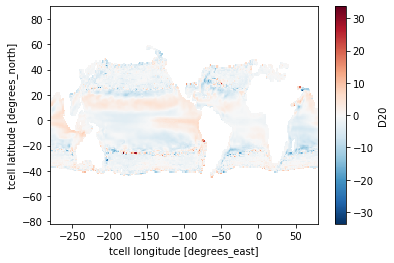

In [170]:
ds_d20.D20.isel(TIME=slice(18,26)).mean(dim='TIME').plot()